In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

sns.set(style="whitegrid")

import os
import sys
from pathlib import Path
from zipfile import ZipFile

PROJ_ROOT = Path(os.getcwd()).parent.parent
sys.path.append(str(PROJ_ROOT))  # add project root file to the python paths

In [4]:
data_path = PROJ_ROOT / "data"
raw_data_path = data_path / "raw"

# Trade Data

In [27]:
csv_files = list(raw_data_path.glob("bitstamp_trx*.zip"))

In [28]:
csv_files[:5]

[PosixPath('/home/miroslav/Documents/projects/mlfcs/data/raw/bitstamp_trx_10_09_2018.zip'),
 PosixPath('/home/miroslav/Documents/projects/mlfcs/data/raw/bitstamp_trx_16_07_2018.zip'),
 PosixPath('/home/miroslav/Documents/projects/mlfcs/data/raw/bitstamp_trx_21_06_2018.zip'),
 PosixPath('/home/miroslav/Documents/projects/mlfcs/data/raw/bitstamp_trx_31_08_2018.zip'),
 PosixPath('/home/miroslav/Documents/projects/mlfcs/data/raw/bitstamp_trx_16_08_2018.zip')]

In [29]:
dataframes = []

for csv_file in tqdm(csv_files, desc="Processing CSV files"):
    # load and format
    trx_sample = pd.read_csv(csv_file)

    # fix column names by removing spaces and quotes
    trx_sample.columns = [s.replace(" ", "").replace("'", "") for s in trx_sample.columns]

    # 'datetime' columns to datetime type
    # trx_sample["datetime"] = pd.to_datetime(trx_sample["datetime"])

    dataframes.append(trx_sample)

df = pd.concat(dataframes, ignore_index=True)

Processing CSV files: 100%|██████████| 122/122 [00:06<00:00, 19.51it/s]


In [30]:
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime")
df.sort_index()

timestamp    price         cost        id  \
datetime                                                                   
2018-05-31 21:00:13+00:00  1527800413000  7538.34    75.383400  67405327   
2018-05-31 21:00:18+00:00  1527800418000  7533.92    35.761333  67405331   
2018-05-31 21:00:18+00:00  1527800418000  7535.44  2995.337400  67405330   
2018-05-31 21:00:18+00:00  1527800418000  7536.00     7.536000  67405329   
2018-05-31 21:00:18+00:00  1527800418000  7537.49   753.749000  67405328   
...                                  ...      ...          ...       ...   
2018-09-30 21:59:37+00:00  1538344777000  6555.78   280.549950  75177318   
2018-09-30 21:59:37+00:00  1538344777000  6555.77  1216.049379  75177317   
2018-09-30 21:59:37+00:00  1538344777000  6555.76  1497.396225  75177316   
2018-09-30 21:59:37+00:00  1538344777000  6555.75  1349.606357  75177315   
2018-09-30 21:59:37+00:00  1538344777000  6555.74  1106.925030  75177314   

                                            fee            fee1  order  \
datetime                                                                 
2018-05-31 21:00:13+00:00   {'currency': u'USD'   'cost': None}   None   
2018-05-31 21:00:18+00:00   {'currency': u'USD'   'cost': None}   None   
2018-05-31 21:00:18+00:00   {'currency': u'USD'   'cost': None}   None   
2018-05-31 21:00:18+00:00   {'currency': u'USD'   'cost': None}   None   
2018-05-31 21:00:18+00:00   {'currency': u'USD'   'cost': None}   None   
...                                         ...             ...    ...   
2018-09-30 21:59:37+00:00   {'currency': u'USD'   'cost': None}   None   
2018-09-30 21:59:37+00:00   {'currency': u'USD'   'cost': None}   None   
2018-09-30 21:59:37+00:00   {'currency': u'USD'   'cost': None}   None   
2018-09-30 21:59:37+00:00   {'currency': u'USD'   'cost': None}   None   
2018-09-30 21:59:37+00:00   {'currency': u'USD'   'cost': None}   None   

                             symbol    amount   type   side  
datetime                                                     
2018-05-31 21:00:13+00:00   BTC/USD  0.010000   None   sell  
2018-05-31 21:00:18+00:00   BTC/USD  0.004747   None   sell  
2018-05-31 21:00:18+00:00   BTC/USD  0.397500   None   sell  
2018-05-31 21:00:18+00:00   BTC/USD  0.001000   None   sell  
2018-05-31 21:00:18+00:00   BTC/USD  0.100000   None   sell  
...                             ...       ...    ...    ...  
2018-09-30 21:59:37+00:00   BTC/USD  0.042794   None    buy  
2018-09-30 21:59:37+00:00   BTC/USD  0.185493   None    buy  
2018-09-30 21:59:37+00:00   BTC/USD  0.228409   None    buy  
2018-09-30 21:59:37+00:00   BTC/USD  0.205866   None    buy  
2018-09-30 21:59:37+00:00   BTC/USD  0.168848   None    buy  

[2795142 rows x 11 columns]

In [31]:
returns = df["price"].sort_index().pct_change()
returns = returns.dropna()
returns

datetime
2018-05-31 21:00:18+00:00   -0.000586
2018-05-31 21:00:18+00:00    0.000202
2018-05-31 21:00:18+00:00    0.000074
2018-05-31 21:00:18+00:00    0.000198
2018-05-31 21:00:19+00:00   -0.000474
                               ...   
2018-09-30 21:59:37+00:00    0.000008
2018-09-30 21:59:37+00:00   -0.000002
2018-09-30 21:59:37+00:00   -0.000002
2018-09-30 21:59:37+00:00   -0.000002
2018-09-30 21:59:37+00:00   -0.000002
Name: price, Length: 2795141, dtype: float64

In [32]:
vol = (returns**2).resample("h").sum().rename("vol")
ret = returns.add(1).resample("h").prod().add(-1).rename("ret")
hourly = pd.merge(vol, ret, left_index=True, right_index=True, how="outer")
hourly

vol       ret
datetime                                     
2018-05-31 21:00:00+00:00  0.000122  0.000975
2018-05-31 22:00:00+00:00  0.000271 -0.012561
2018-05-31 23:00:00+00:00  0.000110  0.005552
2018-06-01 00:00:00+00:00  0.000095  0.001921
2018-06-01 01:00:00+00:00  0.000095 -0.001922
...                             ...       ...
2018-09-30 17:00:00+00:00  0.000032 -0.000451
2018-09-30 18:00:00+00:00  0.000014  0.000298
2018-09-30 19:00:00+00:00  0.000024 -0.002138
2018-09-30 20:00:00+00:00  0.000094 -0.003682
2018-09-30 21:00:00+00:00  0.000032  0.000604

[2929 rows x 2 columns]

In [33]:
price2 = df["price"].sort_index()

In [34]:
# mean price per timestamp
mean_price2 = price2.groupby(price2.index).mean()

In [35]:
mean_price2

datetime
2018-05-31 21:00:13+00:00    7538.340000
2018-05-31 21:00:18+00:00    7535.712500
2018-05-31 21:00:19+00:00    7533.893333
2018-05-31 21:00:20+00:00    7533.880000
2018-05-31 21:00:21+00:00    7538.870000
                                ...     
2018-09-30 21:58:40+00:00    6555.000000
2018-09-30 21:59:15+00:00    6555.730000
2018-09-30 21:59:27+00:00    6555.730000
2018-09-30 21:59:35+00:00    6555.730000
2018-09-30 21:59:37+00:00    6555.760000
Name: price, Length: 1532340, dtype: float64

In [36]:
returns2 = mean_price2.sort_index().pct_change()
returns2 = returns2.dropna()
returns2

datetime
2018-05-31 21:00:18+00:00   -3.485515e-04
2018-05-31 21:00:19+00:00   -2.414061e-04
2018-05-31 21:00:20+00:00   -1.769780e-06
2018-05-31 21:00:21+00:00    6.623413e-04
2018-05-31 21:00:22+00:00   -8.091398e-05
                                 ...     
2018-09-30 21:58:40+00:00   -7.627759e-07
2018-09-30 21:59:15+00:00    1.113654e-04
2018-09-30 21:59:27+00:00    0.000000e+00
2018-09-30 21:59:35+00:00    0.000000e+00
2018-09-30 21:59:37+00:00    4.576149e-06
Name: price, Length: 1532339, dtype: float64

In [37]:
vol2 = (returns2**2).resample("h").sum().rename("vol")

(17728.708333333332, 17732.875)

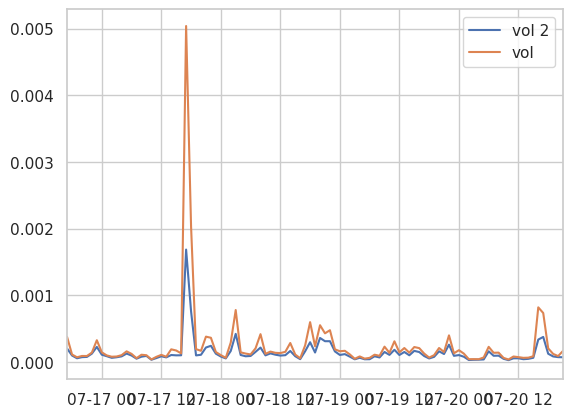

In [48]:
plt.plot(vol2, label="vol 2")
plt.plot(vol, label="vol")
plt.legend()

plt.xlim([vol.index[1100], vol.index[1200]])

In [51]:
rel_diff = (vol - vol2) / vol

(array([ 61., 388., 656., 721., 532., 295., 150.,  69.,  25.,  19.]),
 array([-0.00841823,  0.06234179,  0.13310182,  0.20386185,  0.27462187,
         0.3453819 ,  0.41614193,  0.48690195,  0.55766198,  0.62842201,
         0.69918203]),
 <BarContainer object of 10 artists>)

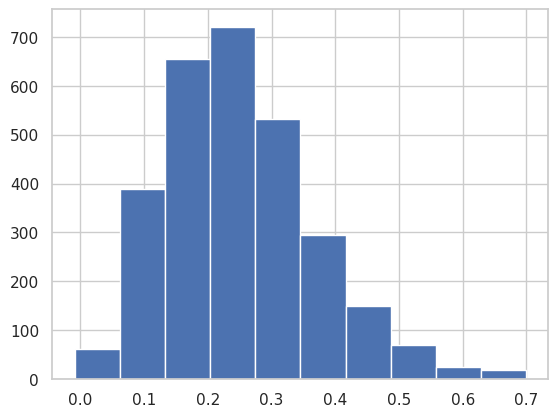

In [53]:
plt.hist(rel_diff.values, label="(vol - vol2) / vol")


In [54]:
corr = vol.corr(vol2)

In [55]:
corr

0.9355395987236336

# Loop through files and compute OB features   

The logic of calculations in this notebook are the same as the ones in the `1.0-mz-eda.ipynb` notebook. The only difference is that this notebook loops through all the files in the `data/` directory and computes the OB features for each file. The results are saved in a new directory called `data/output`.

In [23]:
csv_files = list(raw_data_path.glob("bitstamp_ob*.zip"))
csv_files[:5]

[PosixPath('/home/miroslav/Documents/projects/mlfcs/data/raw/bitstamp_ob_25_06_2018.zip'),
 PosixPath('/home/miroslav/Documents/projects/mlfcs/data/raw/bitstamp_ob_22_06_2018.zip'),
 PosixPath('/home/miroslav/Documents/projects/mlfcs/data/raw/bitstamp_ob_18_06_2018.zip'),
 PosixPath('/home/miroslav/Documents/projects/mlfcs/data/raw/bitstamp_ob_05_09_2018.zip'),
 PosixPath('/home/miroslav/Documents/projects/mlfcs/data/raw/bitstamp_ob_05_06_2018.zip')]

In [24]:
dataframes = []

for csv_file in tqdm(csv_files, desc="Processing CSV files"):
    # load and format
    ob_sample = (
        pl.read_csv(
            ZipFile(raw_data_path / csv_file.name).read(csv_file.name[:-4] + ".csv")
        )
        .with_columns((pl.col("type") == "b").alias("is_bid"))
        .drop("type")
        .rename({"amount ": "amount"})
    )

    # calculate volume, depth, spread, volume_diff, and depth_diff
    time_agg = (
        ob_sample.group_by(["time"])
        .agg(
            pl.when(pl.col("is_bid"))
            .then(pl.col("amount"))
            .otherwise(None)
            .sum()
            .alias("bid_volume"),
            pl.when(~pl.col("is_bid"))
            .then(pl.col("amount"))
            .otherwise(None)
            .sum()
            .alias("ask_volume"),
            pl.when(pl.col("is_bid"))
            .then(pl.col("price"))
            .otherwise(None)
            .max()
            .alias("max_bid"),
            pl.when(~pl.col("is_bid"))
            .then(pl.col("price"))
            .otherwise(None)
            .min()
            .alias("min_ask"),
            pl.when(pl.col("is_bid") & (pl.col("price") > 1000.0))  ### FILTER !!!
            .then(pl.col("price"))
            .otherwise(None)
            .count()
            .alias("bid_depth"),
            pl.when(~pl.col("is_bid"))
            .then(pl.col("price"))
            .otherwise(None)
            .count()
            .alias("ask_depth"),
        )
        .cast({"bid_depth": pl.Int32, "ask_depth": pl.Int32})
        .sort("time")
    ).with_columns(
        (pl.col("ask_depth") - pl.col("bid_depth")).alias("depth_diff"),
        (pl.col("min_ask") - pl.col("max_bid")).alias("spread"),
        (pl.col("bid_volume") - pl.col("ask_volume")).alias("volume_diff"),
    )

    # aggregate data from the original dataframe over the 10th "percentiles"
    time_quantile_agg = ob_sample.group_by(["time"]).agg(
        pl.when(pl.col("is_bid"))
        .then(pl.col("price"))
        .otherwise(None)
        .quantile(0.9)
        .alias("bid_delta"),
        pl.when(~pl.col("is_bid"))
        .then(pl.col("price"))
        .otherwise(None)
        .quantile(0.1)
        .alias("ask_delta"),
    )

    time_agg_weighted = (
        pl.concat([ob_sample, time_quantile_agg], how="align_right")
        .group_by(["time"])
        .agg(
            # filter only bid prices over the 10th percentile of bid prices
            pl.when(pl.col("is_bid") & (pl.col("price") >= pl.col("bid_delta")))
            .then(pl.col("amount"))
            .otherwise(0.0)
            .sum()
            .alias("bid_slope"),
            # filter only ask prices under the 90th percentile of ask prices
            pl.when(~pl.col("is_bid") & (pl.col("price") <= pl.col("ask_delta")))
            .then(pl.col("amount"))
            .otherwise(0.0)
            .sum()
            .alias("ask_slope"),
            pl.when(pl.col("is_bid") & (pl.col("price") >= pl.col("bid_delta")))
            .then(pl.col("price"))
            .otherwise(None)
            .min()
            .alias("weighted_bid"),
            pl.when(~pl.col("is_bid") & (pl.col("price") <= pl.col("ask_delta")))
            .then(pl.col("price"))
            .otherwise(None)
            .max()
            .alias("weighted_ask"),
        )
        .with_columns(
            (pl.col("weighted_ask") - pl.col("weighted_bid")).alias("weighted_spread"),
        )
    )

    dataframes.append(
        pl.concat([time_agg, time_agg_weighted], how="align").sort("time")
    )

Processing CSV files: 100%|██████████| 109/109 [18:03<00:00,  9.94s/it]


In [25]:
features = (
    pl.concat(dataframes, how="vertical")
    .with_columns(pl.from_epoch("time"))
    .sort("time")
)

In [26]:
features

shape: (311_906, 15)
┌────────────┬───────────┬───────────┬─────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ time       ┆ bid_volum ┆ ask_volum ┆ max_bid ┆ … ┆ ask_slope ┆ weighted_ ┆ weighted_ ┆ weighted_ │
│ ---        ┆ e         ┆ e         ┆ ---     ┆   ┆ ---       ┆ bid       ┆ ask       ┆ spread    │
│ datetime[μ ┆ ---       ┆ ---       ┆ f64     ┆   ┆ f64       ┆ ---       ┆ ---       ┆ ---       │
│ s]         ┆ f64       ┆ f64       ┆         ┆   ┆           ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪═══════════╪═══════════╪═════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2018-06-04 ┆ 586356.11 ┆ 2695.8049 ┆ 7537.0  ┆ … ┆ 868.78988 ┆ 7100.29   ┆ 8210.0    ┆ 1109.71   │
│ 22:00:02   ┆ 3693      ┆ 73        ┆         ┆   ┆ 3         ┆           ┆           ┆           │
│ 2018-06-04 ┆ 586351.26 ┆ 2696.5614 ┆ 7537.0  ┆ … ┆ 869.59734 ┆ 7100.29   ┆ 8204.47   ┆ 1104.18   │
│ 22:00:34   ┆ 9401      ┆ 78        ┆         ┆   ┆ 9         ┆           ┆           ┆           │
│ 2018-06-04 ┆ 586350.93 ┆ 2699.1654 ┆ 7537.0  ┆ … ┆ 872.15128 ┆ 7100.29   ┆ 8203.44   ┆ 1103.15   │
│ 22:01:01   ┆ 8081      ┆ 17        ┆         ┆   ┆ 8         ┆           ┆           ┆           │
│ 2018-06-04 ┆ 586307.35 ┆ 2656.9345 ┆ 7537.01 ┆ … ┆ 829.91941 ┆ 7099.0    ┆ 8210.0    ┆ 1111.0    │
│ 22:01:33   ┆ 5517      ┆ 08        ┆         ┆   ┆ 7         ┆           ┆           ┆           │
│ 2018-06-04 ┆ 586317.59 ┆ 2657.9462 ┆ 7537.0  ┆ … ┆ 830.98208 ┆ 7100.0    ┆ 8204.47   ┆ 1104.47   │
│ 22:02:02   ┆ 6946      ┆ 12        ┆         ┆   ┆ 3         ┆           ┆           ┆           │
│ …          ┆ …         ┆ …         ┆ …       ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 2018-09-30 ┆ 502228.30 ┆ 2954.9134 ┆ 6554.21 ┆ … ┆ 1205.4098 ┆ 6219.69   ┆ 7117.0    ┆ 897.31    │
│ 21:57:34   ┆ 5974      ┆ 08        ┆         ┆   ┆ 76        ┆           ┆           ┆           │
│ 2018-09-30 ┆ 502208.48 ┆ 2926.0697 ┆ 6554.19 ┆ … ┆ 1176.8267 ┆ 6215.45   ┆ 7124.47   ┆ 909.02    │
│ 21:58:01   ┆ 3731      ┆ 52        ┆         ┆   ┆ 78        ┆           ┆           ┆           │
│ 2018-09-30 ┆ 502203.14 ┆ 2927.8990 ┆ 6555.0  ┆ … ┆ 1178.6560 ┆ 6215.5    ┆ 7124.47   ┆ 908.97    │
│ 21:58:34   ┆ 5173      ┆ 54        ┆         ┆   ┆ 8         ┆           ┆           ┆           │
│ 2018-09-30 ┆ 502203.05 ┆ 2959.5600 ┆ 6555.0  ┆ … ┆ 1209.6712 ┆ 6215.5    ┆ 7107.0    ┆ 891.5     │
│ 21:59:01   ┆ 3143      ┆ 45        ┆         ┆   ┆ 39        ┆           ┆           ┆           │
│ 2018-09-30 ┆ 502228.02 ┆ 2968.0370 ┆ 6555.0  ┆ … ┆ 1217.9474 ┆ 6217.1    ┆ 7103.37   ┆ 886.27    │
│ 21:59:33   ┆ 8143      ┆ 38        ┆         ┆   ┆ 32        ┆           ┆           ┆           │
└────────────┴───────────┴───────────┴─────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [ ]:
# save the features to a parquet file
features.write_parquet(data_path / "output" / "ob_features.parquet")

In [4]:
# lead features
features = pl.read_parquet(data_path / "output" / "ob_features.parquet")

# Inspect the aggregated OB features and compare with Vi's preprocessing

## Plot before any filtering

In [52]:
# plot features one by one
def plot_feature(df, feature, problematic_timestamps=None):
    plt.figure(figsize=(12, 3))
    plt.scatter(df["time"], df[feature], label=feature, alpha=1, s=0.3)
    plt.title(f"{feature} over time")
    plt.xlabel("Time")
    plt.ylabel(feature)
    plt.legend()

    if problematic_timestamps is not None:
        for timestamp in problematic_timestamps:
            plt.axvline(
                x=timestamp, color="r", linestyle="--", label="Problematic Timestamp"
            )
    plt.show()

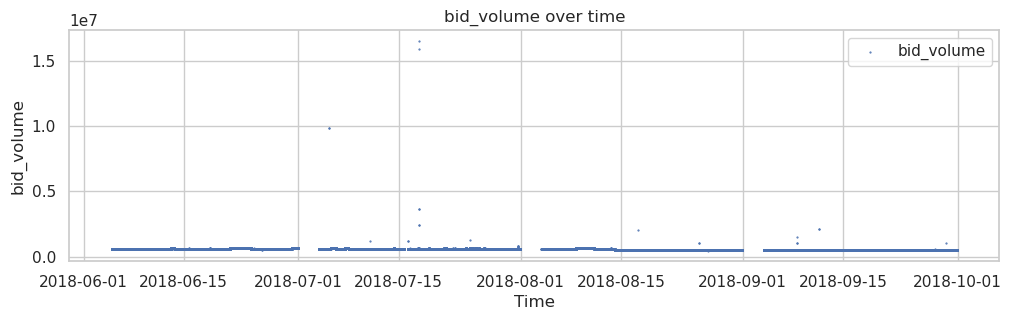

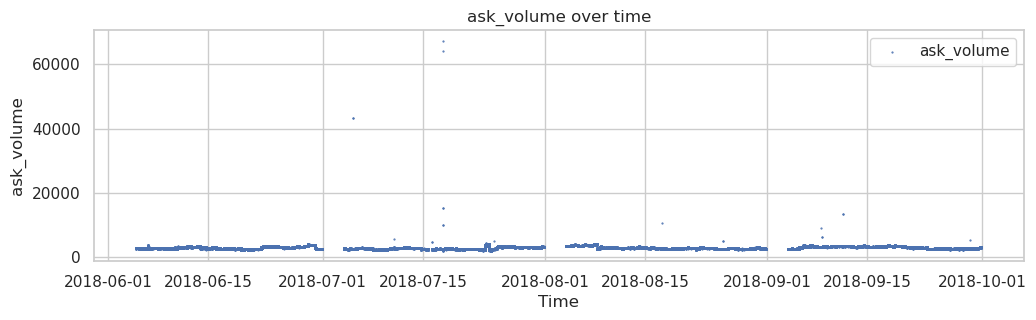

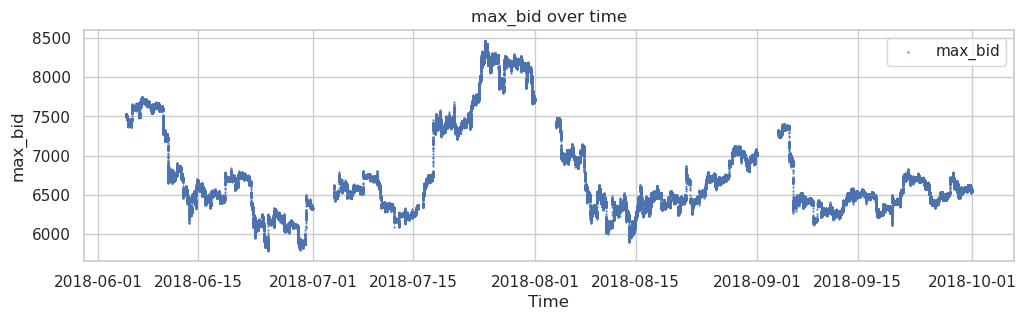

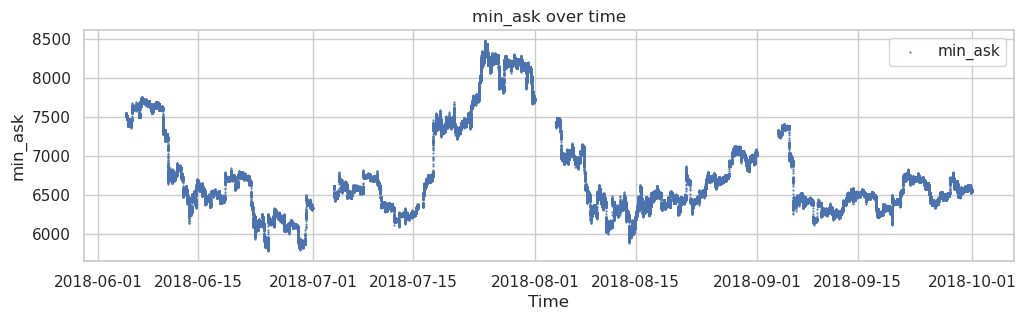

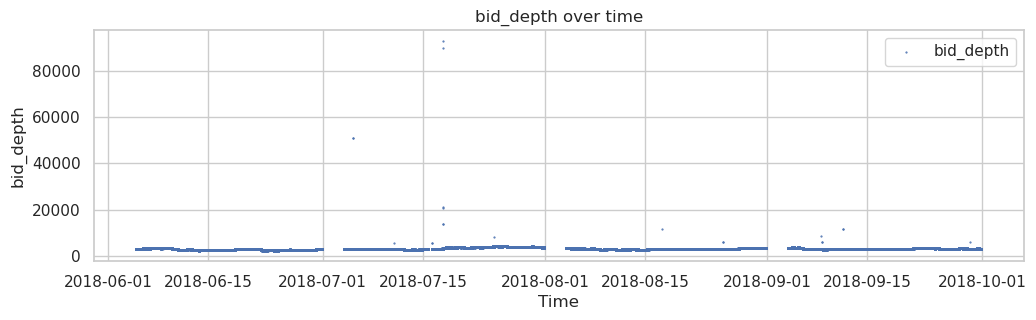

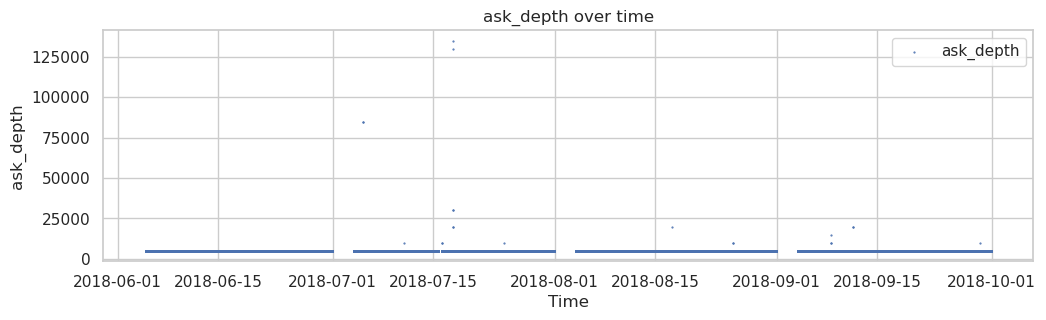

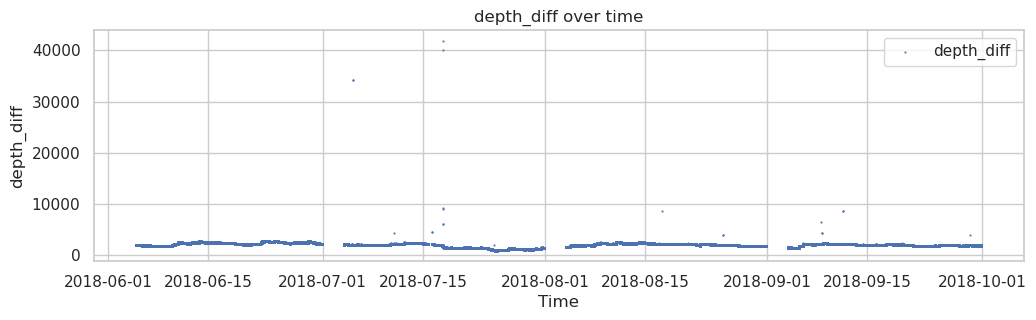

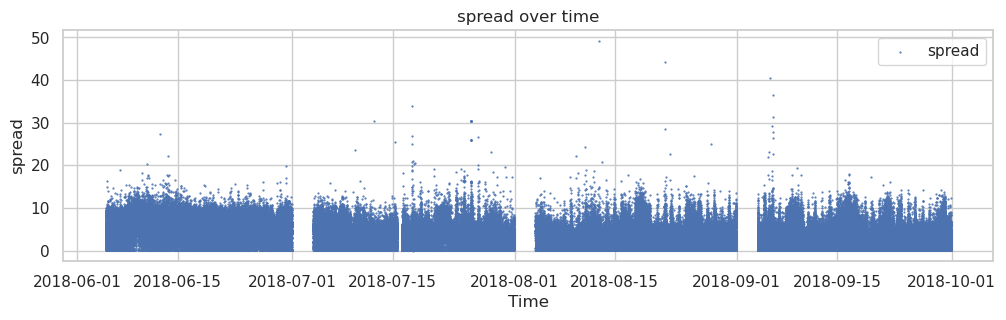

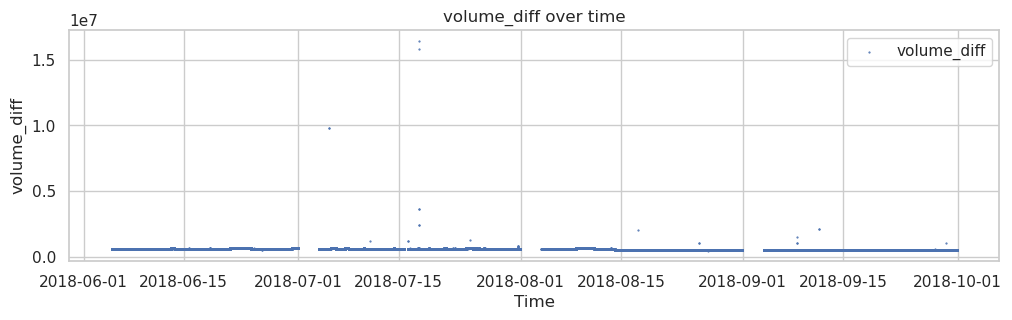

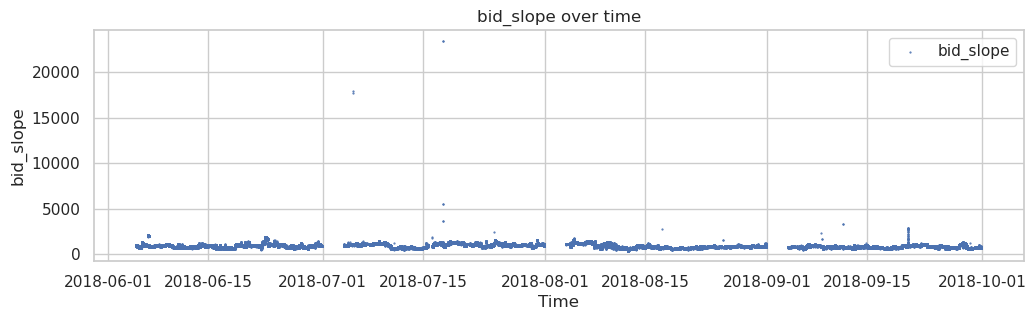

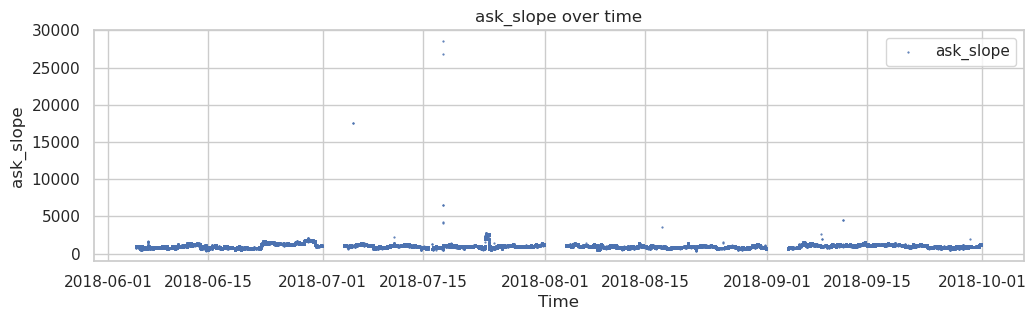

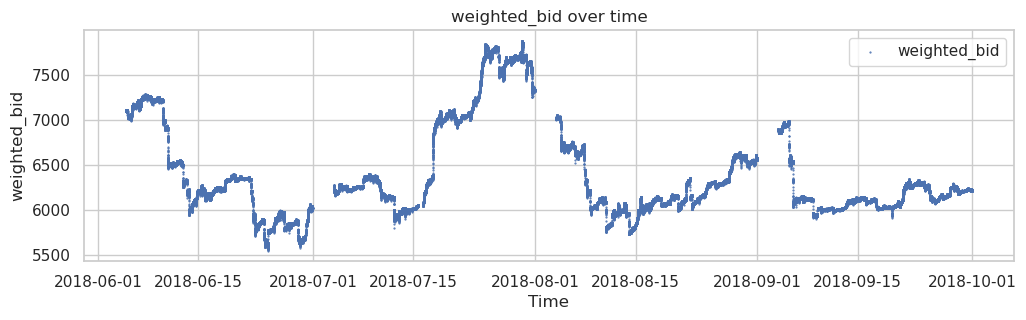

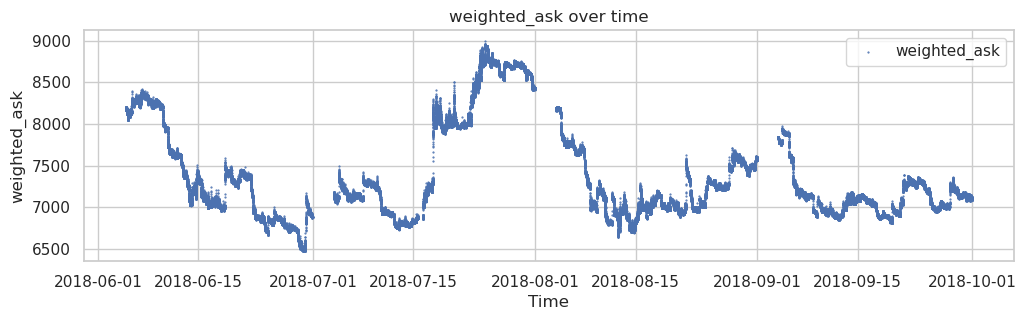

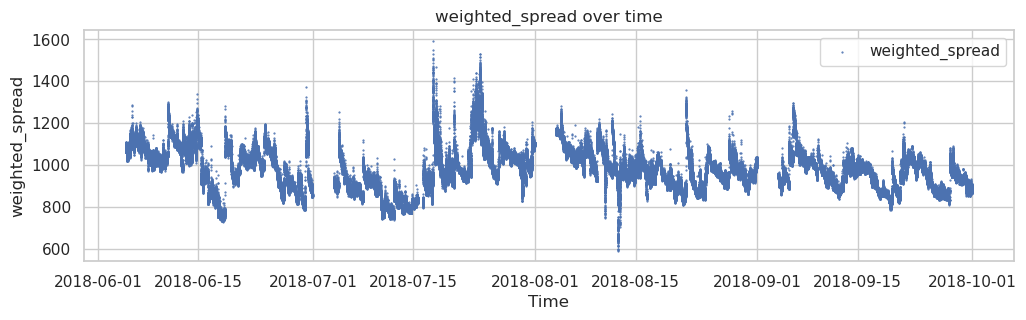

In [7]:
for feature in features.columns:
    if feature not in ["time", "bid_delta", "ask_delta"]:
        plot_feature(features, feature)

Observations:
- There are missing data for the first four days in each month, giving 3 windows of missing data.
- There are outliers in `bid_slope`, `ask_slope`, `bid_volume`, `ask_volume`, `volume_diff`, `bid_depth` and `ask_depth`, `depth_diff` features. 

## Check if Vi's features have outliers 

Let's check if the same outliers are present in Viacheslav's features (although this may not the up to date version of his features).

In [5]:
vis_features = (
    pl.read_csv(data_path / "btc" / "features.csv")
    .with_columns(pl.col("time").str.to_datetime("%Y-%m-%d %H:%M:%S"))
    .sort("time")
)
vis_features

shape: (311_906, 11)
┌────────────┬────────┬───────────┬───────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ time       ┆ spread ┆ ask_depth ┆ bid_depth ┆ … ┆ volume_dif ┆ weighted_ ┆ ask_slope ┆ bid_slope │
│ ---        ┆ ---    ┆ ---       ┆ ---       ┆   ┆ f          ┆ spread    ┆ ---       ┆ ---       │
│ datetime[μ ┆ f64    ┆ i64       ┆ i64       ┆   ┆ ---        ┆ ---       ┆ f64       ┆ f64       │
│ s]         ┆        ┆           ┆           ┆   ┆ f64        ┆ f64       ┆           ┆           │
╞════════════╪════════╪═══════════╪═══════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2018-06-04 ┆ 6.19   ┆ 4000      ┆ 2808      ┆ … ┆ -10443.521 ┆ 1051.5787 ┆ 7581.61   ┆ 6964.01   │
│ 22:00:02   ┆        ┆           ┆           ┆   ┆ 223        ┆ 1         ┆           ┆           │
│ 2018-06-04 ┆ 6.19   ┆ 4000      ┆ 2808      ┆ … ┆ -10438.358 ┆ 1045.9153 ┆ 7581.61   ┆ 6964.01   │
│ 22:00:34   ┆        ┆           ┆           ┆   ┆ 364        ┆ 53        ┆           ┆           │
│ 2018-06-04 ┆ 4.97   ┆ 4000      ┆ 2808      ┆ … ┆ -10435.299 ┆ 1047.0826 ┆ 7581.03   ┆ 6964.01   │
│ 22:01:01   ┆        ┆           ┆           ┆   ┆ 071        ┆ 41        ┆           ┆           │
│ 2018-06-04 ┆ 4.96   ┆ 4000      ┆ 2806      ┆ … ┆ -10433.633 ┆ 1045.6313 ┆ 7587.31   ┆ 6929.32   │
│ 22:01:33   ┆        ┆           ┆           ┆   ┆ 512        ┆ 41        ┆           ┆           │
│ 2018-06-04 ┆ 4.9    ┆ 4000      ┆ 2807      ┆ … ┆ -10443.301 ┆ 1041.5024 ┆ 7587.07   ┆ 6945.0    │
│ 22:02:02   ┆        ┆           ┆           ┆   ┆ 176        ┆ 02        ┆           ┆           │
│ …          ┆ …      ┆ …         ┆ …         ┆ … ┆ …          ┆ …         ┆ …         ┆ …         │
│ 2018-09-30 ┆ 1.58   ┆ 4000      ┆ 2836      ┆ … ┆ -9303.5280 ┆ 962.44740 ┆ 6618.0    ┆ 6060.0    │
│ 21:57:34   ┆        ┆           ┆           ┆   ┆ 86         ┆ 7         ┆           ┆           │
│ 2018-09-30 ┆ 1.59   ┆ 4000      ┆ 2833      ┆ … ┆ -9312.7358 ┆ 954.26198 ┆ 6618.0    ┆ 6060.0    │
│ 21:58:01   ┆        ┆           ┆           ┆   ┆ 84         ┆ 5         ┆           ┆           │
│ 2018-09-30 ┆ 0.76   ┆ 4000      ┆ 2834      ┆ … ┆ -9305.5680 ┆ 947.09412 ┆ 6618.0    ┆ 6060.0    │
│ 21:58:34   ┆        ┆           ┆           ┆   ┆ 24         ┆ 4         ┆           ┆           │
│ 2018-09-30 ┆ 0.75   ┆ 4000      ┆ 2834      ┆ … ┆ -9276.7053 ┆ 940.77693 ┆ 6618.0    ┆ 6060.0    │
│ 21:59:01   ┆        ┆           ┆           ┆   ┆ 39         ┆ 7         ┆           ┆           │
│ 2018-09-30 ┆ 0.73   ┆ 4000      ┆ 2836      ┆ … ┆ -9293.2761 ┆ 965.74774 ┆ 6618.0    ┆ 6060.0    │
│ 21:59:33   ┆        ┆           ┆           ┆   ┆ 46         ┆ 4         ┆           ┆           │
└────────────┴────────┴───────────┴───────────┴───┴────────────┴───────────┴───────────┴───────────┘

In [6]:
for feature in vis_features.columns:
    if feature not in ["time"]:
        plot_feature(vis_features, feature)

NameError: name 'plot_feature' is not defined

Seems like Viecheslav's features also have outliers adn the same missing data. `features.csv` is probably the old file. Look forward in this notebook, `data_df.csv` does not have these outliers.

## Filter outliers

From the above plots, it seems that the outliers are all related to the same few timestamps. We will sort the data by bid_depth or ask_depth, as these two features seem to be mostly constant over time, and the we will remove the rows with the few highest values by manually setting the threshold.

In [119]:
problematic_timestamps = []

In [120]:
problematic_timestamps.extend(
    features.filter(pl.col("bid_depth") > 5000).select("time").to_series().to_list()
)
features.sort("bid_depth", descending=True).filter(pl.col("bid_depth") > 5000).shape

(21, 15)

In [121]:
problematic_timestamps.extend(
    features.filter(pl.col("ask_depth") > 5000).select("time").to_series().to_list()
)
features.sort("ask_depth", descending=True).filter(pl.col("ask_depth") > 5000).shape

(21, 15)

In [122]:
problematic_timestamps.extend(
    features.filter(pl.col("bid_volume") > 900_000).select("time").to_series().to_list()
)
features.sort("bid_volume", descending=True).filter(
    pl.col("bid_volume") > 900_000
).shape

(21, 15)

In [123]:
problematic_timestamps.extend(
    features.filter(pl.col("ask_volume") > 8000).select("time").to_series().to_list()
)
features.sort("ask_volume", descending=True).filter(pl.col("ask_volume") > 8000).shape

(12, 15)

In [124]:
problematic_timestamps.extend(
    features.filter(pl.col("bid_slope") > 4000).select("time").to_series().to_list()
)
features.sort("bid_slope", descending=True).filter(pl.col("bid_slope") > 4000).shape

(6, 15)

In [125]:
problematic_timestamps.extend(
    features.filter(pl.col("ask_slope") > 4000).select("time").to_series().to_list()
)
features.sort("ask_slope", descending=True).filter(pl.col("ask_slope") > 4000).shape

(10, 15)

In [126]:
# union of the problematic timestamps
problematic_timestamps = list(set(problematic_timestamps))

In [127]:
len(problematic_timestamps)

21

In [128]:
# filer out the problematic timestamps
features = features.filter(~pl.col("time").is_in(problematic_timestamps))

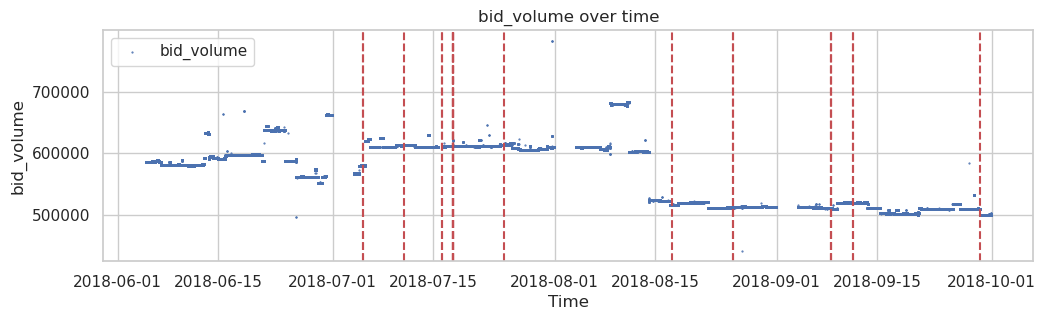

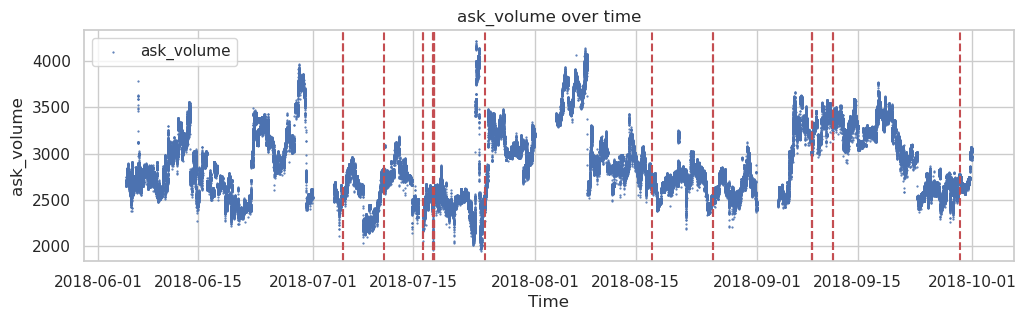

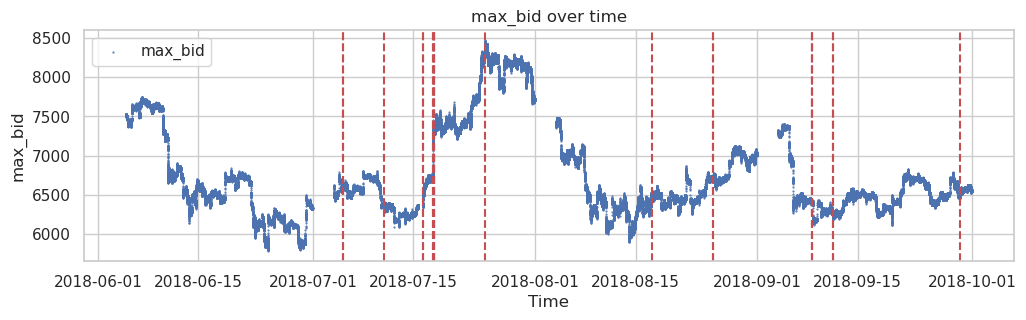

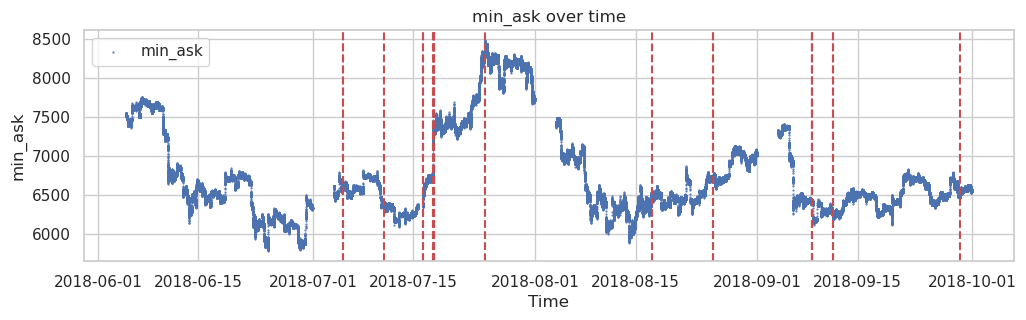

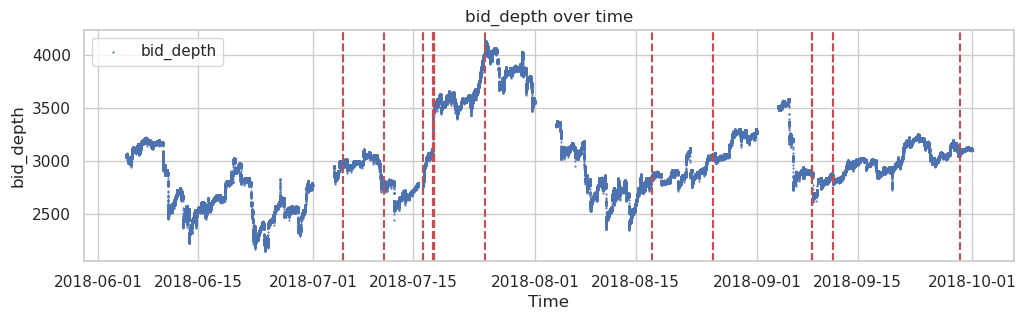

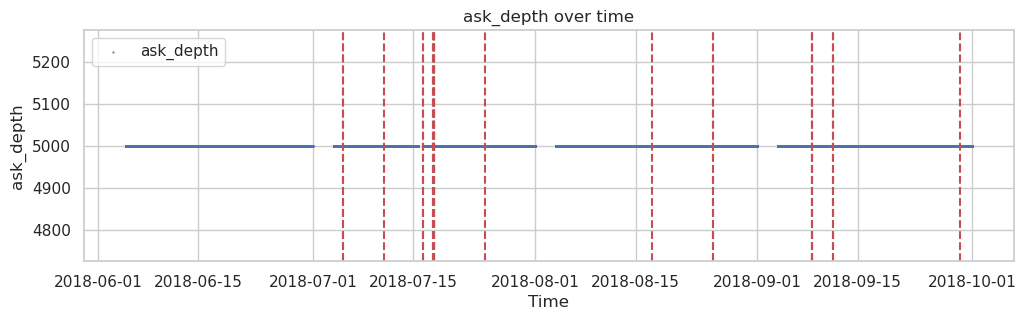

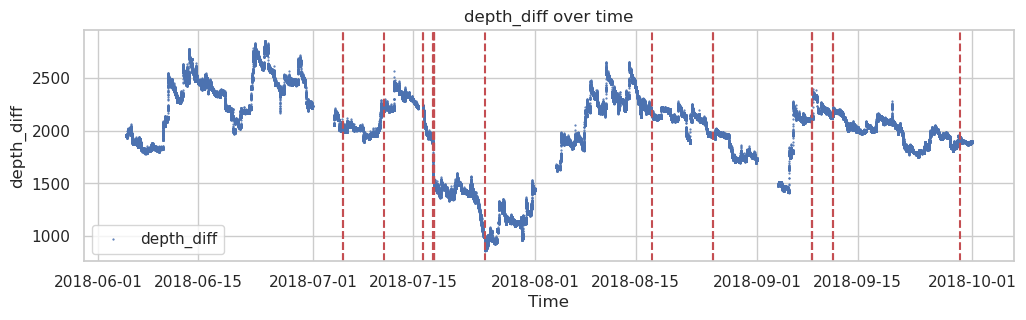

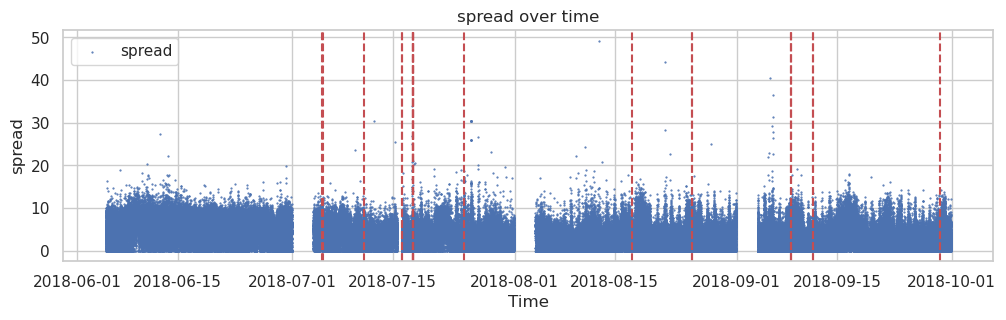

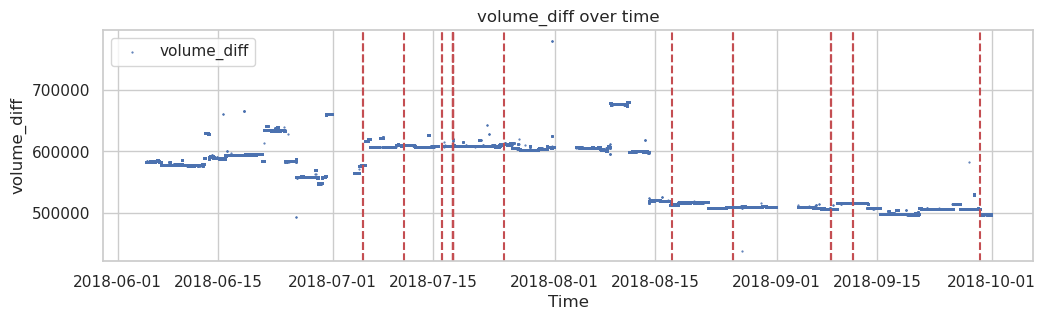

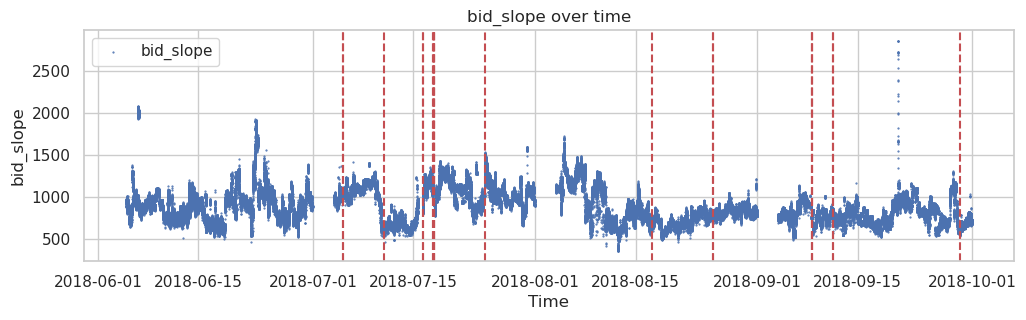

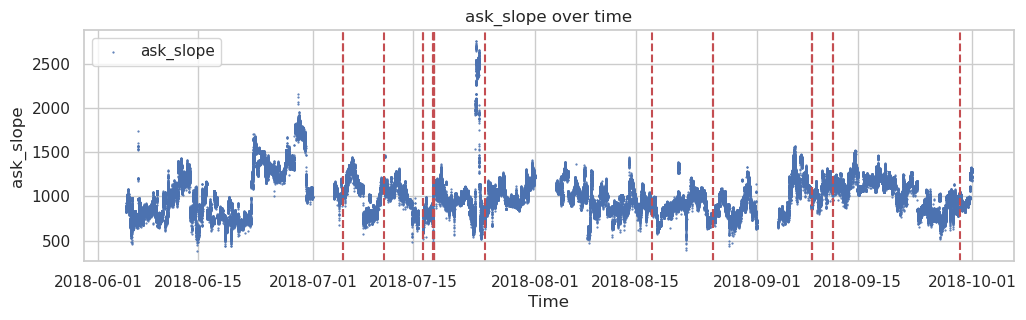

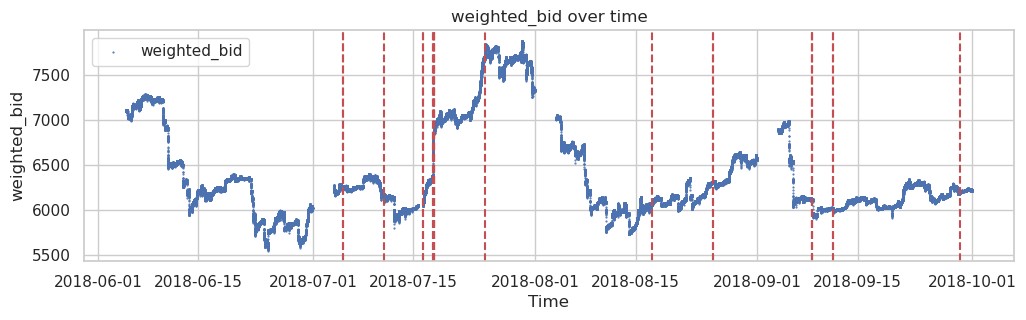

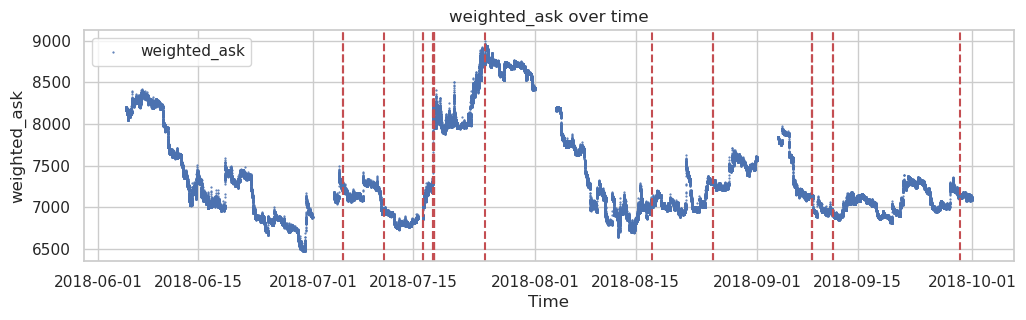

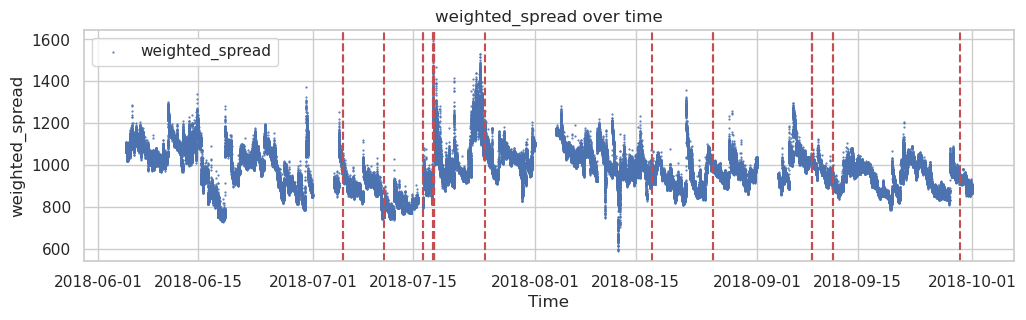

In [129]:
# plot the features again
for feature in features.columns:
    if feature not in ["time", "bid_delta", "ask_delta"]:
        plot_feature(features, feature, problematic_timestamps)

## Compare with Vi's data

Let's check if the same problem appears in the dataset preprocessed by Viecheslav's code.

In [13]:
vis_data = (
    pl.read_csv(data_path / "btc" / "data_df.csv")
    .with_columns(pl.col("datetime").str.to_datetime("%Y-%m-%d %H:%M:%S"))
    .sort("datetime")
)
vis_data

shape: (2_579, 1_215)
┌───────────┬──────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ datetime  ┆ vol      ┆ ret       ┆ ret_t-1   ┆ … ┆ volume_di ┆ weighted_ ┆ ask_slope ┆ bid_slope │
│ ---       ┆ ---      ┆ ---       ┆ ---       ┆   ┆ ff_t-120  ┆ spread_t- ┆ _t-120    ┆ _t-120    │
│ datetime[ ┆ f64      ┆ f64       ┆ f64       ┆   ┆ ---       ┆ 120       ┆ ---       ┆ ---       │
│ μs]       ┆          ┆           ┆           ┆   ┆ f64       ┆ ---       ┆ f64       ┆ f64       │
│           ┆          ┆           ┆           ┆   ┆           ┆ f64       ┆           ┆           │
╞═══════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2018-06-0 ┆ 0.000143 ┆ -0.002229 ┆ -0.000807 ┆ … ┆ -10440.51 ┆ 1036.7256 ┆ 7548.68   ┆ 6997.83   │
│ 4         ┆          ┆           ┆           ┆   ┆ 621       ┆ 48        ┆           ┆           │
│ 23:00:00  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2018-06-0 ┆ 0.000115 ┆ 0.001552  ┆ -0.000217 ┆ … ┆ -10336.34 ┆ 1031.8000 ┆ 7539.55   ┆ 6937.0    │
│ 5         ┆          ┆           ┆           ┆   ┆ 9463      ┆ 62        ┆           ┆           │
│ 00:00:00  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2018-06-0 ┆ 0.00009  ┆ -0.001719 ┆ 0.001004  ┆ … ┆ -10441.48 ┆ 1055.5384 ┆ 7531.36   ┆ 6981.42   │
│ 5         ┆          ┆           ┆           ┆   ┆ 4297      ┆ 87        ┆           ┆           │
│ 01:00:00  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2018-06-0 ┆ 0.000502 ┆ -0.010899 ┆ 0.000669  ┆ … ┆ -10375.84 ┆ 1043.1412 ┆ 7520.68   ┆ 6964.01   │
│ 5         ┆          ┆           ┆           ┆   ┆ 6459      ┆ 15        ┆           ┆           │
│ 02:00:00  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2018-06-0 ┆ 0.000146 ┆ 0.000408  ┆ 0.000473  ┆ … ┆ -10304.46 ┆ 1032.4915 ┆ 7486.98   ┆ 6860.46   │
│ 5         ┆          ┆           ┆           ┆   ┆ 9895      ┆ 35        ┆           ┆           │
│ 03:00:00  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ …         ┆ …        ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 2018-09-3 ┆ 0.000025 ┆ -0.000451 ┆ -0.00086  ┆ … ┆ -9282.363 ┆ 1051.1443 ┆ 6629.0    ┆ 6060.0    │
│ 0         ┆          ┆           ┆           ┆   ┆ 863       ┆ 53        ┆           ┆           │
│ 17:00:00  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2018-09-3 ┆ 0.000014 ┆ 0.000298  ┆ 0.000607  ┆ … ┆ -9284.887 ┆ 969.48667 ┆ 6631.0    ┆ 6060.0    │
│ 0         ┆          ┆           ┆           ┆   ┆ 715       ┆ 1         ┆           ┆           │
│ 18:00:00  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2018-09-3 ┆ 0.000024 ┆ -0.002138 ┆ -0.000023 ┆ … ┆ -9339.134 ┆ 1066.5140 ┆ 6628.0    ┆ 6060.0    │
│ 0         ┆          ┆           ┆           ┆   ┆ 347       ┆ 37        ┆           ┆           │
│ 19:00:00  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2018-09-3 ┆ 0.000089 ┆ -0.003682 ┆ -0.000012 ┆ … ┆ -9375.888 ┆ 1066.8463 ┆ 6618.0    ┆ 6060.0    │
│ 0         ┆          ┆           ┆           ┆   ┆ 938       ┆ 26        ┆           ┆           │
│ 20:00:00  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2018-09-3 ┆ 0.000034 ┆ 0.000611  ┆ -0.003663 ┆ … ┆ -9205.280 ┆ 1010.3458 ┆ 6590.0    ┆ 6060.0    │
│ 0         ┆          ┆           ┆           ┆   ┆ 807       ┆ 98        ┆           ┆           │
│ 21:00:00  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
└───────────┴──────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [131]:
# select columns containing 't-1' suffix in the name
keep_cols = [col for col in vis_data.columns if col.endswith("t-1")]
keep_cols.extend(["datetime", "vol"])
keep_cols

['ret_t-1',
 'spread_t-1',
 'ask_depth_t-1',
 'bid_depth_t-1',
 'depth_diff_t-1',
 'ask_volume_t-1',
 'bid_volume_t-1',
 'volume_diff_t-1',
 'weighted_spread_t-1',
 'ask_slope_t-1',
 'bid_slope_t-1',
 'datetime',
 'vol']

In [132]:
# keep only the selected columns and shift the time column by 1
vis_data = vis_data.select(keep_cols)
vis_data

shape: (2_579, 13)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ ret_t-1   ┆ spread_t- ┆ ask_depth ┆ bid_depth ┆ … ┆ ask_slope ┆ bid_slope ┆ datetime  ┆ vol      │
│ ---       ┆ 1         ┆ _t-1      ┆ _t-1      ┆   ┆ _t-1      ┆ _t-1      ┆ ---       ┆ ---      │
│ f64       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ datetime[ ┆ f64      │
│           ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ μs]       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ -0.000807 ┆ 6.19      ┆ 4000.0    ┆ 2808.0    ┆ … ┆ 7581.61   ┆ 6964.01   ┆ 2018-06-0 ┆ 0.000143 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 4         ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 23:00:00  ┆          │
│ -0.000217 ┆ 4.98      ┆ 4000.0    ┆ 2809.0    ┆ … ┆ 7548.68   ┆ 6997.83   ┆ 2018-06-0 ┆ 0.000115 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 5         ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 00:00:00  ┆          │
│ 0.001004  ┆ 6.52      ┆ 4000.0    ┆ 2804.0    ┆ … ┆ 7543.39   ┆ 6942.12   ┆ 2018-06-0 ┆ 0.00009  │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 5         ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 01:00:00  ┆          │
│ 0.000669  ┆ 8.22      ┆ 4000.0    ┆ 2818.0    ┆ … ┆ 7531.36   ┆ 6981.42   ┆ 2018-06-0 ┆ 0.000502 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 5         ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 02:00:00  ┆          │
│ 0.000473  ┆ 4.81      ┆ 4000.0    ┆ 2812.0    ┆ … ┆ 7520.68   ┆ 6964.01   ┆ 2018-06-0 ┆ 0.000146 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 5         ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 03:00:00  ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ -0.00086  ┆ 2.51      ┆ 4000.0    ┆ 2837.0    ┆ … ┆ 6618.0    ┆ 6060.0    ┆ 2018-09-3 ┆ 0.000025 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 0         ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 17:00:00  ┆          │
│ 0.000607  ┆ 0.08      ┆ 4000.0    ┆ 2841.0    ┆ … ┆ 6629.0    ┆ 6060.0    ┆ 2018-09-3 ┆ 0.000014 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 0         ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 18:00:00  ┆          │
│ -0.000023 ┆ 3.11      ┆ 4000.0    ┆ 2844.0    ┆ … ┆ 6631.0    ┆ 6060.0    ┆ 2018-09-3 ┆ 0.000024 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 0         ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 19:00:00  ┆          │
│ -0.000012 ┆ 3.89      ┆ 4000.0    ┆ 2841.0    ┆ … ┆ 6628.0    ┆ 6060.0    ┆ 2018-09-3 ┆ 0.000089 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 0         ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 20:00:00  ┆          │
│ -0.003663 ┆ 0.99      ┆ 4000.0    ┆ 2844.0    ┆ … ┆ 6618.0    ┆ 6060.0    ┆ 2018-09-3 ┆ 0.000034 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 0         ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ 21:00:00  ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

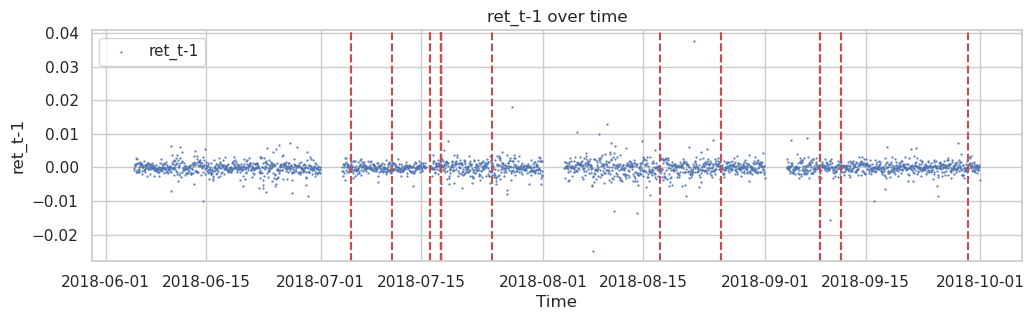

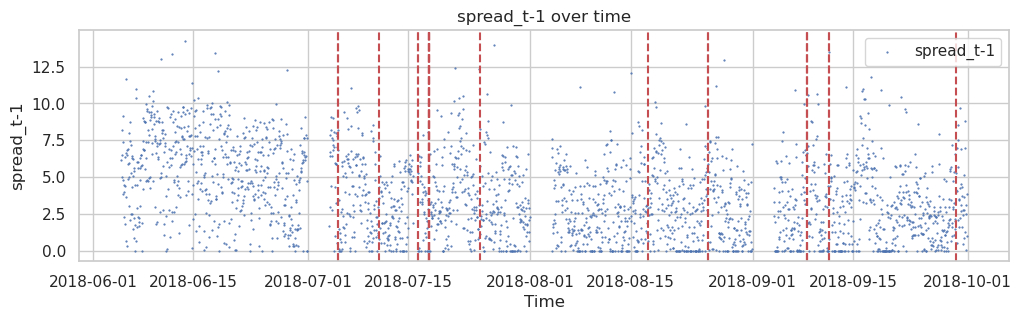

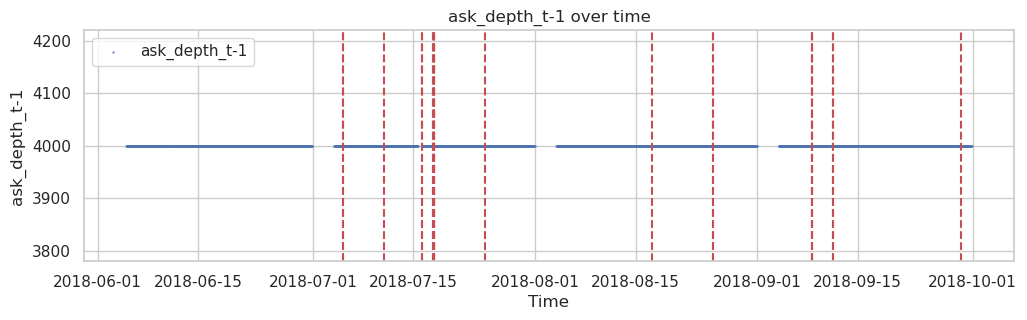

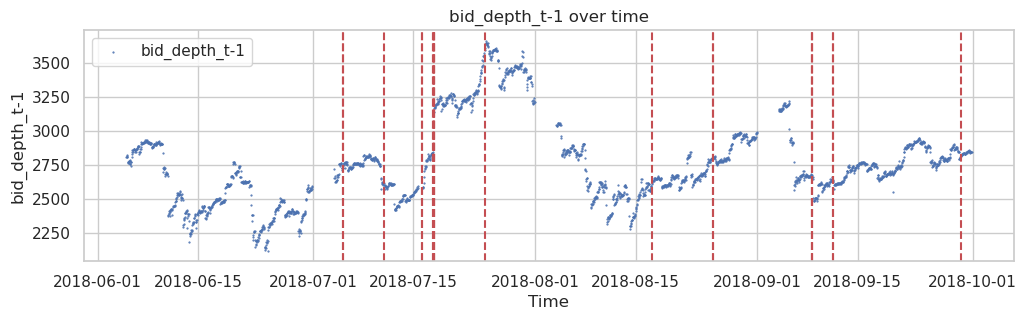

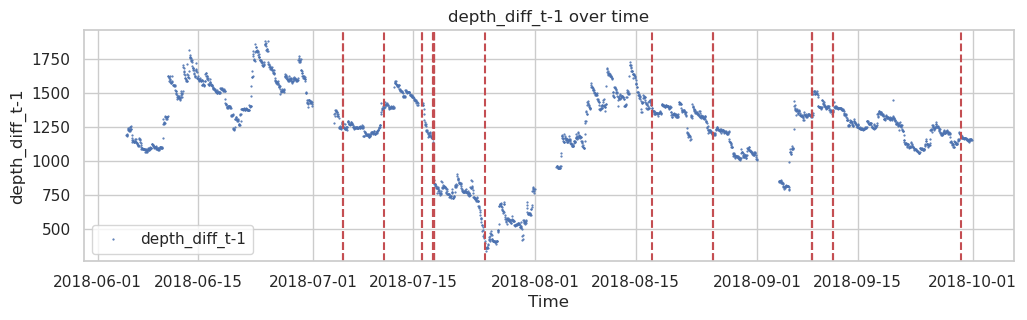

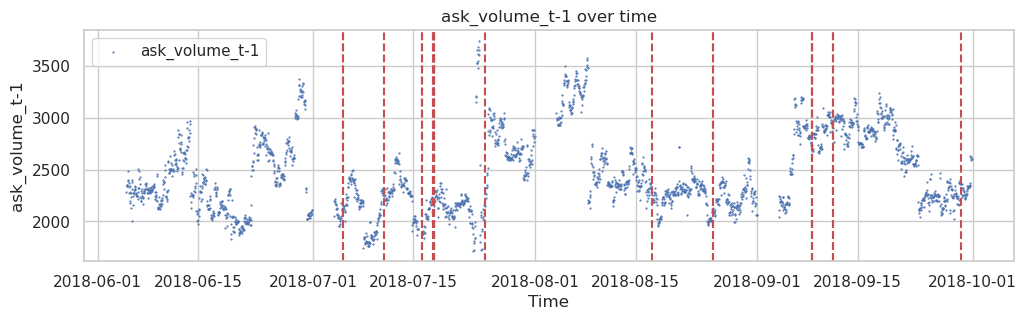

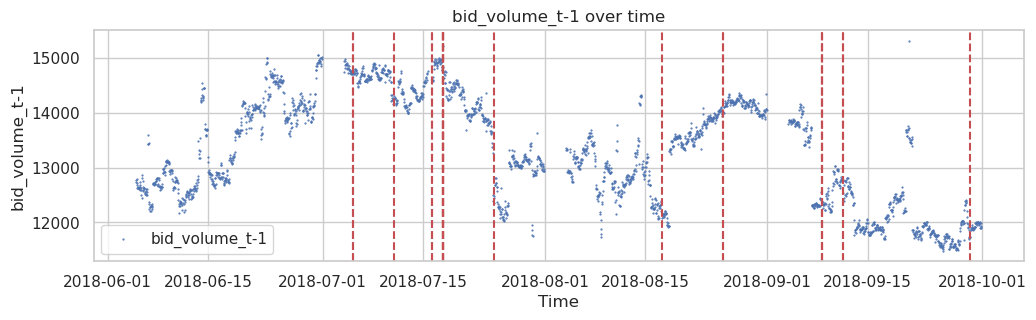

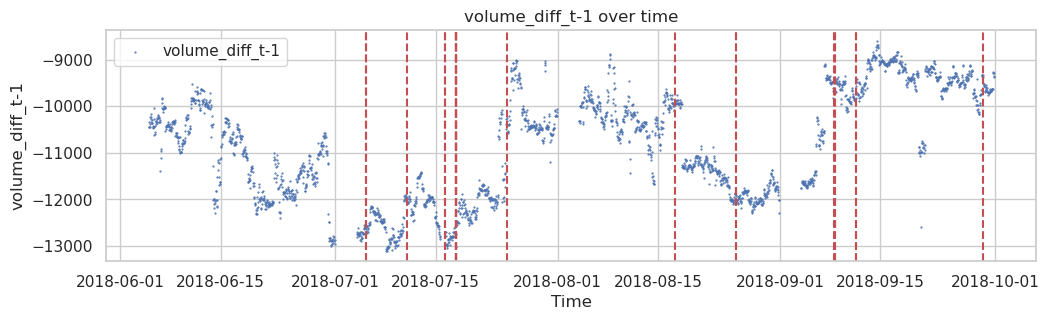

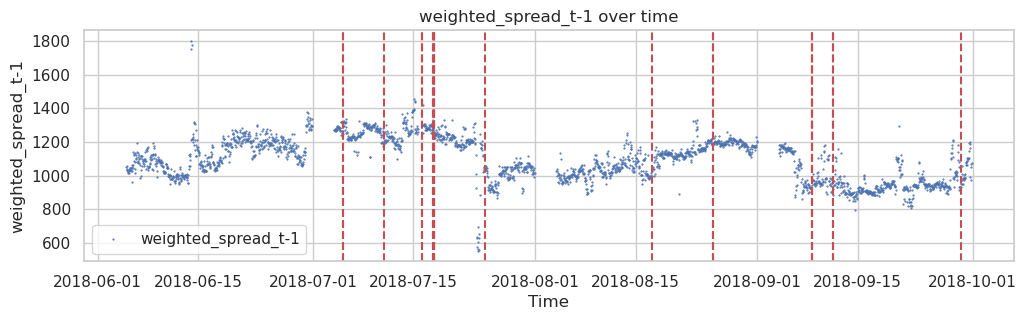

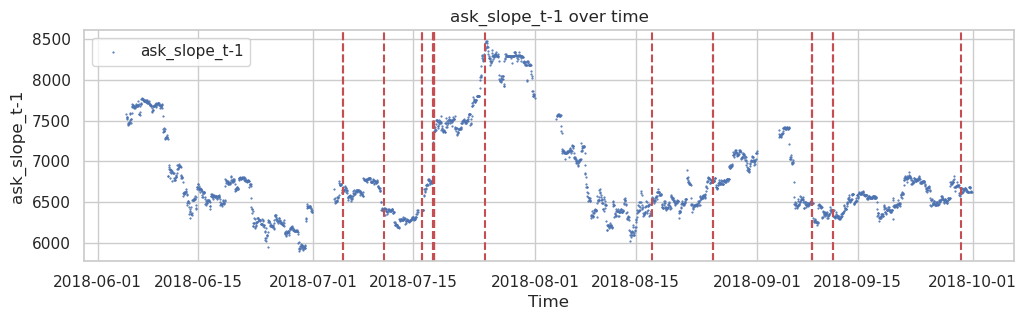

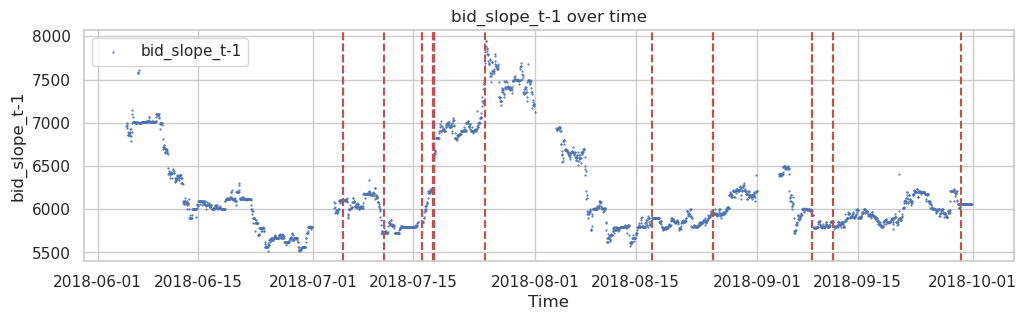

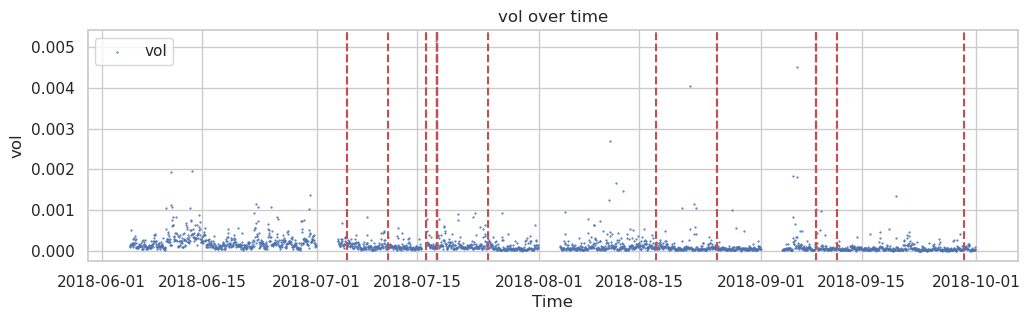

In [133]:
# plot vis_data


def plot_vis_data(df, feature, problematic_timestamps=None):
    plt.figure(figsize=(12, 3))
    plt.scatter(df["datetime"], df[feature], label=feature, alpha=1, s=0.3)
    plt.title(f"{feature} over time")
    plt.xlabel("Time")
    plt.ylabel(feature)
    plt.legend()
    if problematic_timestamps is not None:
        for timestamp in problematic_timestamps:
            plt.axvline(
                x=timestamp, color="r", linestyle="--", label="Problematic Timestamp"
            )
    plt.show()


for feature in vis_data.columns:
    if feature != "datetime":
        plot_vis_data(vis_data, feature, problematic_timestamps)

In [ ]:
# plot vis_features and features together
def plot_vis_features_and_features(df1, df2, feature, problematic_timestamps=None):
    plt.figure(figsize=(12, 3))
    plt.scatter(
        df1["datetime"], df1[feature + "_t-1"], label=feature + " (Vi)", alpha=1, s=0.3
    )
    plt.scatter(df2["time"], df2[feature], label=feature + " (Miro)", alpha=0.1, s=0.3)
    plt.title(f"{feature}")
    plt.xlabel("Time")
    plt.ylabel(feature)
    plt.legend()
    if problematic_timestamps is not None:
        for timestamp in problematic_timestamps:
            plt.axvline(
                x=timestamp, color="r", linestyle="--", label="Problematic Timestamp"
            )
    plt.show()

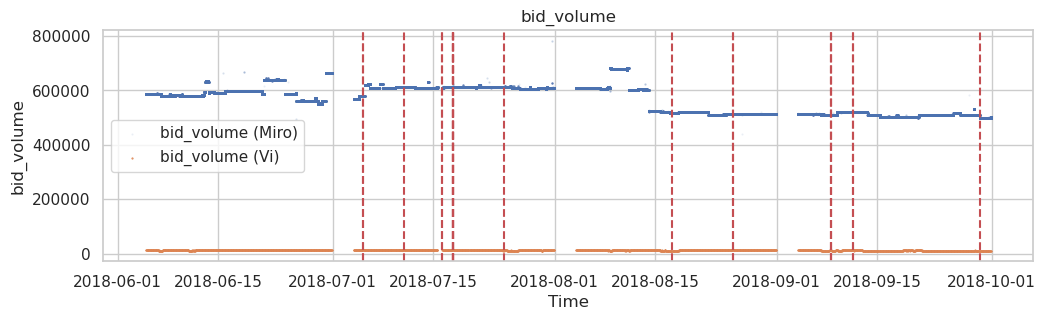

/home/miroslav/miniforge3/envs/mlfi/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


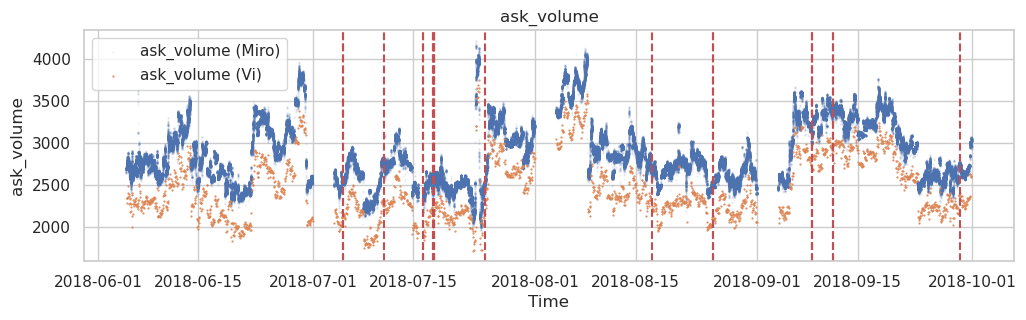

Error plotting max_bid: "max_bid_t-1" not found
Error plotting min_ask: "min_ask_t-1" not found


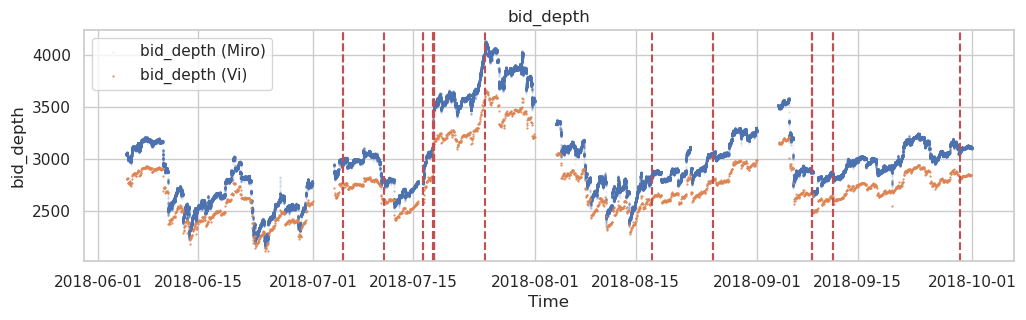

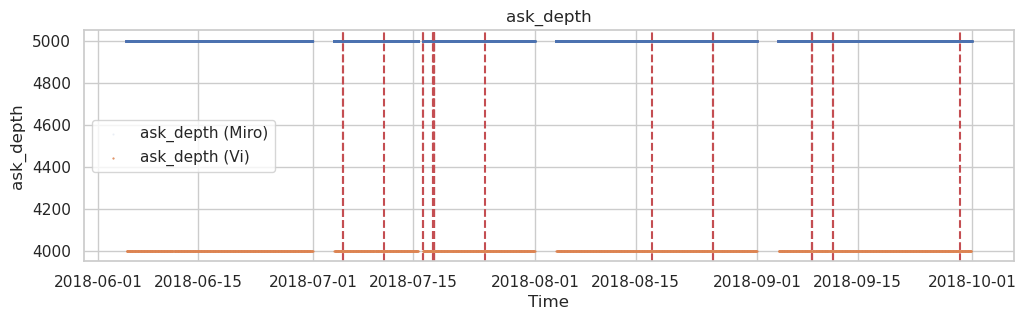

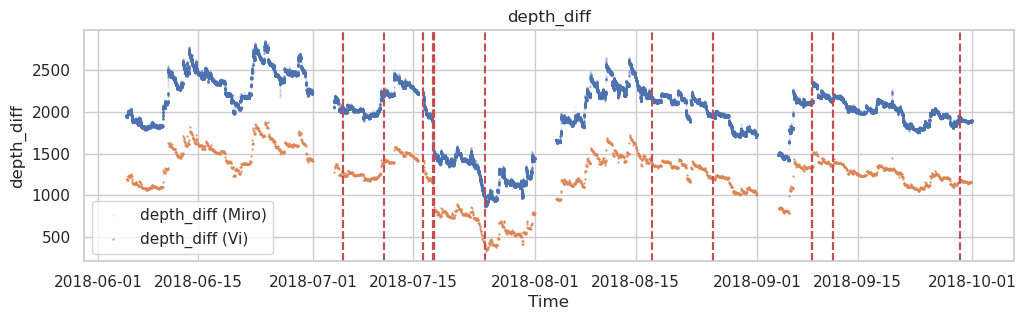

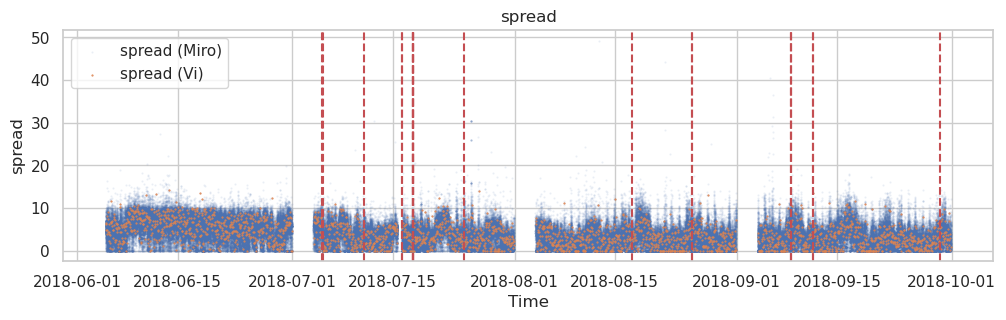

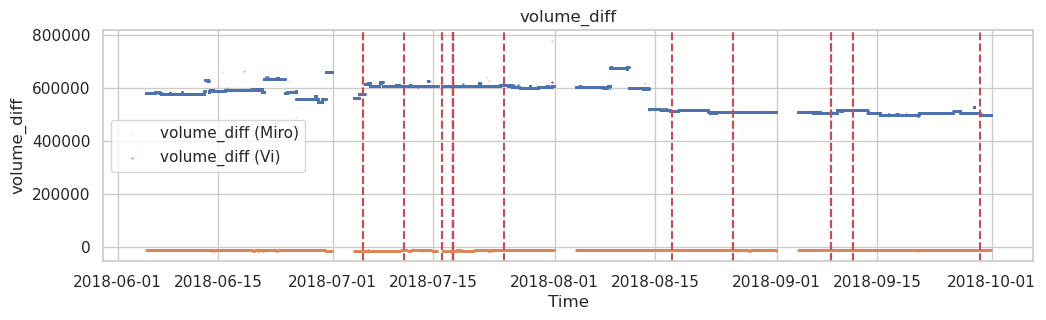

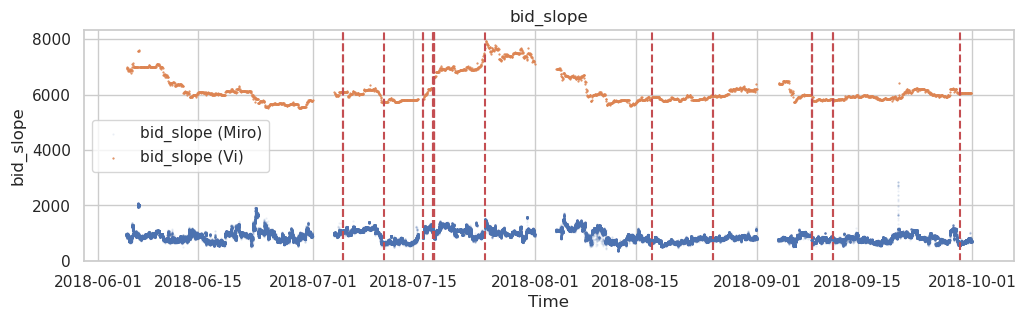

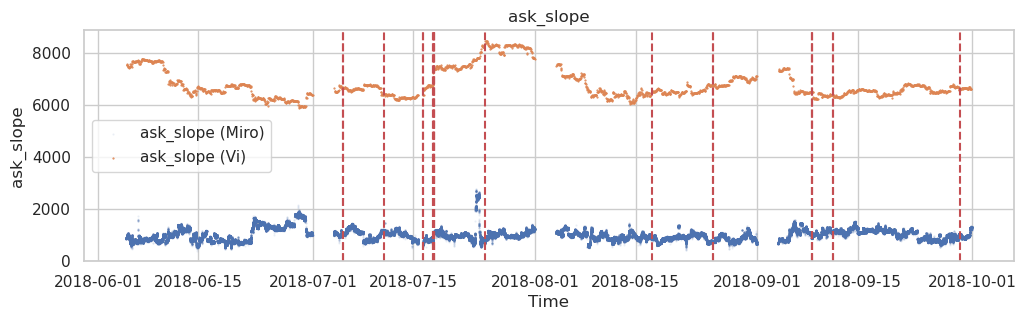

Error plotting weighted_bid: "weighted_bid_t-1" not found
Error plotting weighted_ask: "weighted_ask_t-1" not found


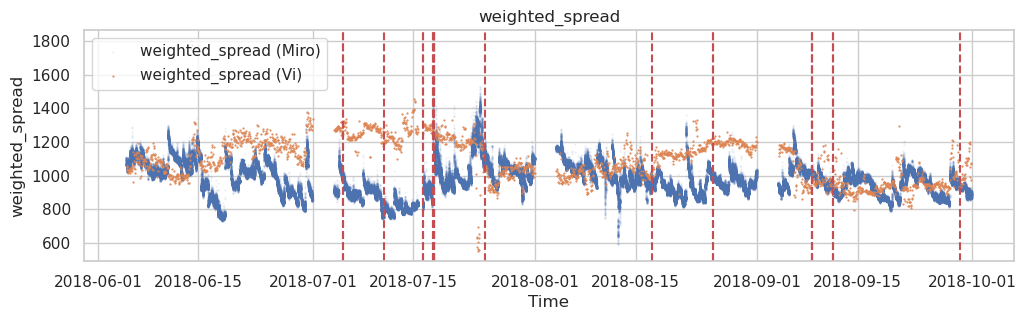

In [150]:
for feature in features.columns:
    if feature not in ["time"]:
        try:
            plot_vis_features_and_features(
                vis_data, features, feature, problematic_timestamps
            )
        except Exception as e:
            print(f"Error plotting {feature}: {e}")
            plt.close()

## Conclusions
- The outliers are not present in `data_df.csv` preprocessed by Viecheslav's code.
- Some features, like `weighted_spread`, `ask_slope`, `bid_slope` differ significantly in the methods of calculation (Miroslav's vs Viecheslav's). **TODO: check why is this the case.**

# PCA

In [8]:
feature_names = [
    "bid_volume",
    "ask_volume",
    "bid_depth",
    "ask_depth",
    "depth_diff",
    "spread",
    "volume_diff",
    "bid_slope",
    "ask_slope",
    # "weighted_bid",
    # "weighted_ask",
    "weighted_spread",
]

In [44]:
first_test_time = datetime.strptime("2018-07-01 00:00:00", "%Y-%m-%d %H:%M:%S")

In [45]:
# select features with prefix in feature_names

ob_features = vis_data.select(
    ["datetime"]
    + [f"{feature}_t-{i}" for feature in feature_names for i in range(1, 120)]
).filter(pl.col("datetime") < first_test_time)
ob_features

shape: (621, 1_191)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ datetime  ┆ bid_volum ┆ bid_volum ┆ bid_volum ┆ … ┆ weighted_ ┆ weighted_ ┆ weighted_ ┆ weighted │
│ ---       ┆ e_t-1     ┆ e_t-2     ┆ e_t-3     ┆   ┆ spread_t- ┆ spread_t- ┆ spread_t- ┆ _spread_ │
│ datetime[ ┆ ---       ┆ ---       ┆ ---       ┆   ┆ 116       ┆ 117       ┆ 118       ┆ t-119    │
│ μs]       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2018-06-0 ┆ 12731.737 ┆ 12726.892 ┆ 12726.561 ┆ … ┆ 1038.2377 ┆ 1039.3473 ┆ 1040.0699 ┆ 1038.694 │
│ 4         ┆ 072       ┆ 78        ┆ 46        ┆   ┆ 74        ┆ 93        ┆ 2         ┆ 529      │
│ 23:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2018-06-0 ┆ 12783.096 ┆ 12779.534 ┆ 12778.562 ┆ … ┆ 1032.5334 ┆ 1042.6447 ┆ 1038.3170 ┆ 1042.515 │
│ 5         ┆ 196       ┆ 09        ┆ 943       ┆   ┆ 87        ┆ 88        ┆ 67        ┆ 684      │
│ 00:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2018-06-0 ┆ 12693.048 ┆ 12638.617 ┆ 12602.707 ┆ … ┆ 1038.8865 ┆ 1051.1130 ┆ 1043.1278 ┆ 1034.674 │
│ 5         ┆ 433       ┆ 613       ┆ 947       ┆   ┆ 6         ┆ 45        ┆ 34        ┆ 162      │
│ 01:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2018-06-0 ┆ 12789.693 ┆ 12790.602 ┆ 12789.973 ┆ … ┆ 1036.6410 ┆ 1032.6605 ┆ 1030.0460 ┆ 1042.466 │
│ 5         ┆ 43        ┆ 604       ┆ 813       ┆   ┆ 62        ┆ 3         ┆ 79        ┆ 522      │
│ 02:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2018-06-0 ┆ 12729.654 ┆ 12746.461 ┆ 12729.449 ┆ … ┆ 1026.2935 ┆ 1023.5248 ┆ 1027.5639 ┆ 1028.125 │
│ 5         ┆ 832       ┆ 117       ┆ 356       ┆   ┆ 61        ┆ 88        ┆ 35        ┆ 259      │
│ 03:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 2018-06-3 ┆ 14855.759 ┆ 14854.847 ┆ 14857.467 ┆ … ┆ 1304.5978 ┆ 1272.9992 ┆ 1276.7667 ┆ 1278.738 │
│ 0         ┆ 626       ┆ 893       ┆ 6         ┆   ┆ 93        ┆ 5         ┆ 56        ┆ 241      │
│ 17:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2018-06-3 ┆ 14898.515 ┆ 14898.515 ┆ 14907.030 ┆ … ┆ 1292.6562 ┆ 1288.9478 ┆ 1284.4117 ┆ 1291.403 │
│ 0         ┆ 296       ┆ 296       ┆ 135       ┆   ┆ 11        ┆ 04        ┆ 03        ┆ 359      │
│ 19:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2018-06-3 ┆ 15005.503 ┆ 14999.677 ┆ 14995.838 ┆ … ┆ 1289.6153 ┆ 1281.8576 ┆ 1280.9301 ┆ 1290.051 │
│ 0         ┆ 782       ┆ 305       ┆ 279       ┆   ┆ 44        ┆ 29        ┆ 89        ┆ 969      │
│ 20:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2018-06-3 ┆ 14986.859 ┆ 14981.517 ┆ 14981.769 ┆ … ┆ 1323.3841 ┆ 1318.6853 ┆ 1329.5283 ┆ 1327.270 │
│ 0         ┆ 656       ┆ 793       ┆ 691       ┆   ┆ 78        ┆ 18        ┆ 38        ┆ 494      │
│ 21:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2018-06-3 ┆ 15033.926 ┆ 15026.891 ┆ 15025.559 ┆ … ┆ 1310.2521 ┆ 1315.8672 ┆ 1313.1253 ┆ 1313.028 │
│ 0         ┆ 74        ┆ 355       ┆ 43        ┆   ┆ 45        ┆ 87        ┆ 7         ┆ 717      │
│ 22:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [ ]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
ob_features_scaled = scaler.fit_transform(ob_features.drop("datetime"))
# Perform PCA
pca = PCA(n_components=5)
ob_features_pca = pca.fit_transform(ob_features_scaled)
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=ob_features_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
pca_df["datetime"] = ob_features["datetime"].to_numpy()
pca_df["datetime"] = pd.to_datetime(pca_df["datetime"])
pca_df = pca_df.sort_values("datetime")

In [47]:
pca_df.set_index("datetime", inplace=True)

<Axes: xlabel='datetime'>

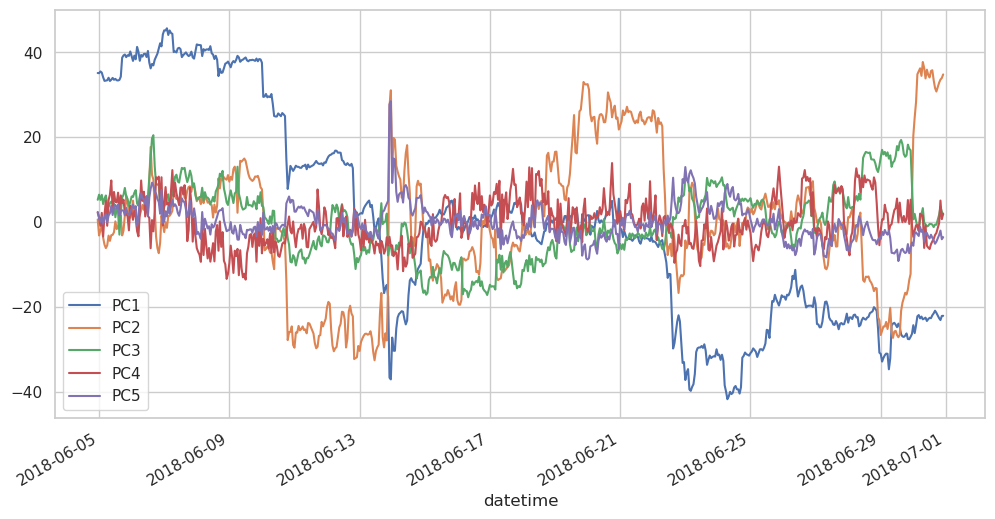

In [48]:
pca_df.plot(figsize=(12, 6))

In [43]:
# explained variance

explained_variance = pca.explained_variance_ratio_.cumsum()
explained_variance

array([0.54683901, 0.78796911, 0.84772339, 0.8745155 , 0.89118161])

# Feature preprocessing for models without automatic feature 

Here we document the preprocessing steps used inside each of the simple multivariate models, such as ARIMX, GARCHX, HARX, etc, which are models linear in OB features. Unlike neural networks, these models do not have automatic feature preprocessing. 


In [ ]:
# make lagged volatility variables, 4 of them

for i in range(1, 5):
    full_data[f"vol_lag{i}"] = full_data["vol"].shift(i)


In [ ]:
columns_list = [
    "spread", 
    # "ask_depth", 
    "bid_depth", 
    # "depth_diff", 
    "ask_volume", 
    "bid_volume", 
    "volume_diff", 
    "weighted_spread", 
    "ask_slope", 
    "bid_slope"
]

In [ ]:
for col in columns_list:
    full_data[f'mean_{col}'] = full_data.loc[:, full_data.columns.str.startswith(col)].mean(axis=1)

    full_data[f'trend_{col}'] = full_data.loc[:, full_data.columns.str.startswith(col)].apply(
        lambda x: np.polyfit(range(len(x)), x, 1)[0], axis=1
    )

In [ ]:
full_data = full_data.dropna().loc[:, 
                          ['vol'] +
                          [f'vol_lag{i}' for i in range(1,5)] +
                          [f'mean_{col}' for col in columns_list] + 
                          [f'trend_{col}' for col in columns_list]
                          ]

In [ ]:
full_data

vol  vol_lag1  vol_lag2  vol_lag3  vol_lag4  \
datetime                                                                
2018-06-05 03:00:00  0.000146  0.000502  0.000090  0.000115  0.000143   
2018-06-05 04:00:00  0.000177  0.000146  0.000502  0.000090  0.000115   
2018-06-05 05:00:00  0.000175  0.000177  0.000146  0.000502  0.000090   
2018-06-05 06:00:00  0.000147  0.000175  0.000177  0.000146  0.000502   
2018-06-05 07:00:00  0.000201  0.000147  0.000175  0.000177  0.000146   
...                       ...       ...       ...       ...       ...   
2018-09-30 17:00:00  0.000025  0.000025  0.000032  0.000016  0.000010   
2018-09-30 18:00:00  0.000014  0.000025  0.000025  0.000032  0.000016   
2018-09-30 19:00:00  0.000024  0.000014  0.000025  0.000025  0.000032   
2018-09-30 20:00:00  0.000089  0.000024  0.000014  0.000025  0.000025   
2018-09-30 21:00:00  0.000034  0.000089  0.000024  0.000014  0.000025   

                     mean_spread  mean_bid_depth  mean_ask_volume  \
datetime                                                            
2018-06-05 03:00:00     6.203417     2785.916667      2372.844947   
2018-06-05 04:00:00     4.801000     2772.733333      2395.809942   
2018-06-05 05:00:00     4.060500     2772.891667      2404.858040   
2018-06-05 06:00:00     5.597250     2771.450000      2383.447700   
2018-06-05 07:00:00     4.107000     2781.841667      2292.421042   
...                          ...             ...              ...   
2018-09-30 17:00:00     2.713750     2839.141667      2626.154969   
2018-09-30 18:00:00     3.495083     2842.358333      2610.819406   
2018-09-30 19:00:00     2.176917     2844.933333      2596.672610   
2018-09-30 20:00:00     2.509667     2843.958333      2602.835693   
2018-09-30 21:00:00     3.018167     2838.291667      2659.465413   

                     mean_bid_volume  mean_volume_diff  ...  mean_ask_slope  \
datetime                                                ...                   
2018-06-05 03:00:00     12694.560994     -10321.716046  ...     7490.462750   
2018-06-05 04:00:00     12664.993633     -10269.183692  ...     7463.342333   
2018-06-05 05:00:00     12638.495022     -10233.636982  ...     7462.075167   
2018-06-05 06:00:00     12633.956231     -10250.508530  ...     7463.747000   
2018-06-05 07:00:00     12601.889541     -10309.468499  ...     7488.274500   
...                              ...               ...  ...             ...   
2018-09-30 17:00:00     11914.479492      -9288.324522  ...     6625.718250   
2018-09-30 18:00:00     11898.818917      -9287.999511  ...     6628.185000   
2018-09-30 19:00:00     11935.271964      -9338.599354  ...     6632.975000   
2018-09-30 20:00:00     11947.150624      -9344.314931  ...     6625.279000   
2018-09-30 21:00:00     11895.432887      -9235.967474  ...     6590.481583   

                     mean_bid_slope  trend_spread  trend_bid_depth  \
datetime                                                             
2018-06-05 03:00:00     6921.164667      0.016212        -0.399507   
2018-06-05 04:00:00     6894.615667     -0.009749         0.039676   
2018-06-05 05:00:00     6876.743750      0.040072        -0.068362   
2018-06-05 06:00:00     6869.339083     -0.006928         0.116661   
2018-06-05 07:00:00     6855.488167     -0.006796         0.036075   
...                             ...           ...              ...   
2018-09-30 17:00:00     6060.000000     -0.011085        -0.008067   
2018-09-30 18:00:00     6060.000000      0.022473         0.013609   
2018-09-30 19:00:00     6060.000000      0.005222        -0.011549   
2018-09-30 20:00:00     6060.000000      0.005474         0.062473   
2018-09-30 21:00:00     6060.000000     -0.010923        -0.008928   

                     trend_ask_volume  trend_bid_volume  trend_volume_diff  \
datetime                                                                     
2018-06-05 03:00:00          0.375979         -0.893486           1.269465   
2018-

In [ ]:
LAST_TRAINING_DATE = datetime.strptime("2018-07-01 00:00:00", "%Y-%m-%d %H:%M:%S")
init_training_vola = full_data.loc[:LAST_TRAINING_DATE]

In [ ]:
init_training_vola.describe()

vol    vol_lag1    vol_lag2    vol_lag3    vol_lag4  \
count  617.000000  617.000000  617.000000  617.000000  617.000000   
mean     0.000240    0.000241    0.000241    0.000241    0.000241   
std      0.000211    0.000212    0.000212    0.000212    0.000212   
min      0.000023    0.000023    0.000023    0.000023    0.000023   
25%      0.000116    0.000116    0.000116    0.000115    0.000116   
50%      0.000183    0.000183    0.000183    0.000183    0.000183   
75%      0.000282    0.000282    0.000282    0.000282    0.000282   
max      0.001959    0.001959    0.001959    0.001959    0.001959   

       mean_spread  mean_bid_depth  mean_ask_volume  mean_bid_volume  \
count   617.000000      617.000000       617.000000       617.000000   
mean      5.457221     2529.055389      2407.593699     13486.106116   
std       1.441923      213.914512       320.700411       785.404204   
min       1.546917     2113.608333      1866.562313     12242.951835   
25%       4.564750     2383.583333      2165.357830     12750.510878   
50%       5.593083     2476.308333      2342.686001     13633.951600   
75%       6.511250     2679.958333      2628.609873     14117.857183   
max       9.037417     2929.025000      3329.605814     15078.300956   

       mean_volume_diff  ...  mean_ask_slope  mean_bid_slope  trend_spread  \
count        617.000000  ...      617.000000      617.000000    617.000000   
mean      -11078.512417  ...     6722.026624     6168.382190      0.000576   
std          796.915660  ...      539.445480      489.205258      0.018054   
min       -13018.862201  ...     5909.131417     5516.883250     -0.056716   
25%       -11763.618916  ...     6281.889417     5766.342083     -0.009945   
50%       -11001.611942  ...     6593.065500     6065.914917     -0.000419   
75%       -10406.279502  ...     6891.616583     6403.819250      0.012891   
max        -9619.359726  ...     7766.646583     7589.856750      0.055908   

       trend_bid_depth  trend_ask_volume  trend_bid_volume  trend_volume_diff  \
count       617.000000        617.000000        617.000000         617.000000   
mean         -0.001741          0.005706          0.029855          -0.024149   
std           0.257508          0.869533          1.383475           1.664424   
min          -2.835252         -9.299989        -13.549967         -13.634726   
25%          -0.031679         -0.222956         -0.349094          -0.432342   
50%           0.017394          0.029966         -0.015392           0.080180   
75%           0.069810          0.255973          0.341319           0.518243   
max           1.414230          4.232568         11.543016          11.750891   

       trend_weighted_spread  trend_ask_slope  trend_bid_slope  
count             617.000000       617.000000     6.170000e+02  
mean                0.005676        -0.016356    -1.583465e-02  
std                 0.465231         0.439226     4.922877e-01  
min                -4.138309        -4.104911    -7.451342e+00  
25%                -0.140342        -0.130454    -6.326189e-02  
50%                -0.000413        -0.009010    -3.858893e-14  
75%                 0.153677         0.096834     5.998573e-02  
max                 5.310703         3.901274     6.742483e+00  

[8 rows x 21 columns]

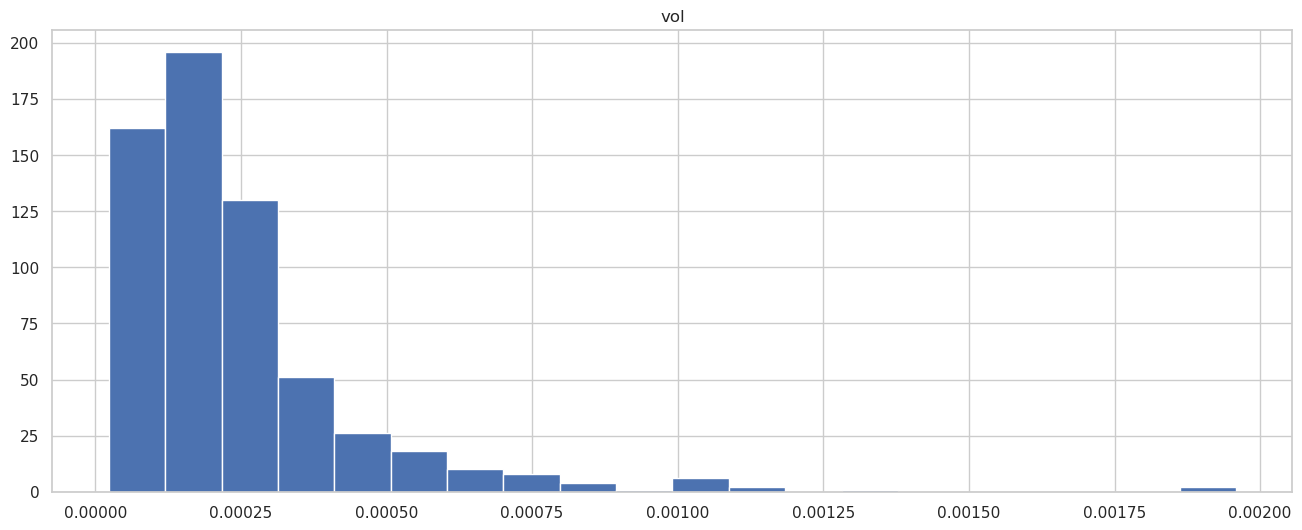

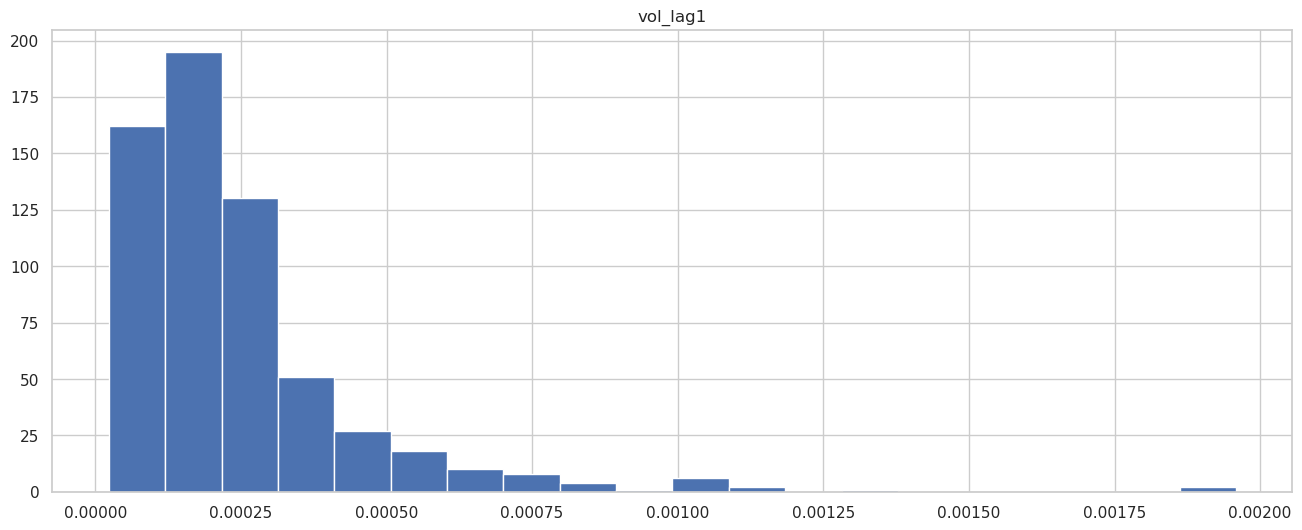

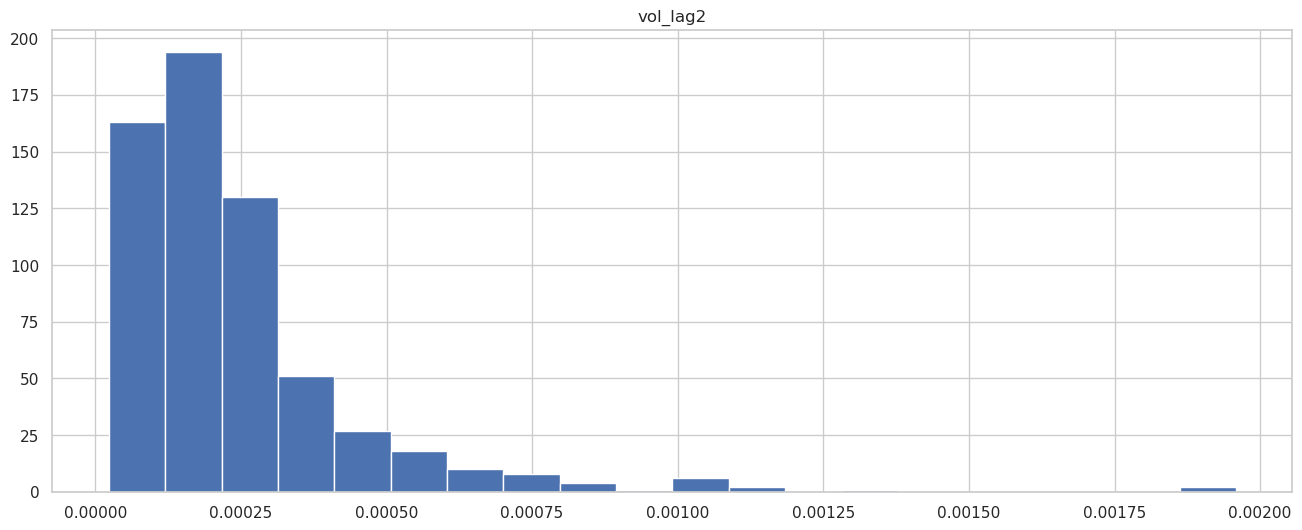

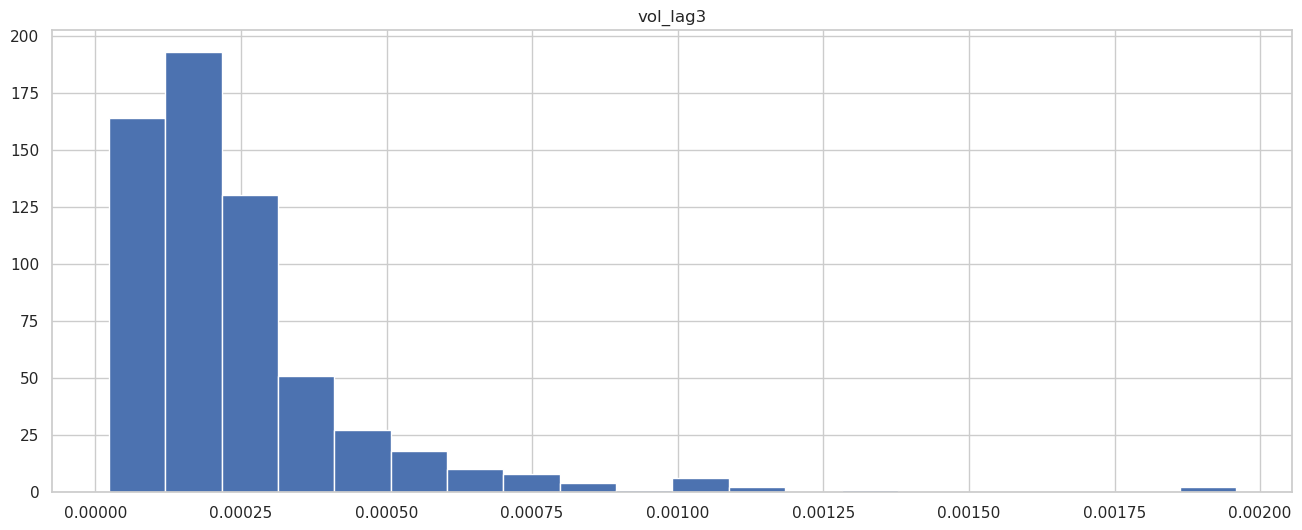

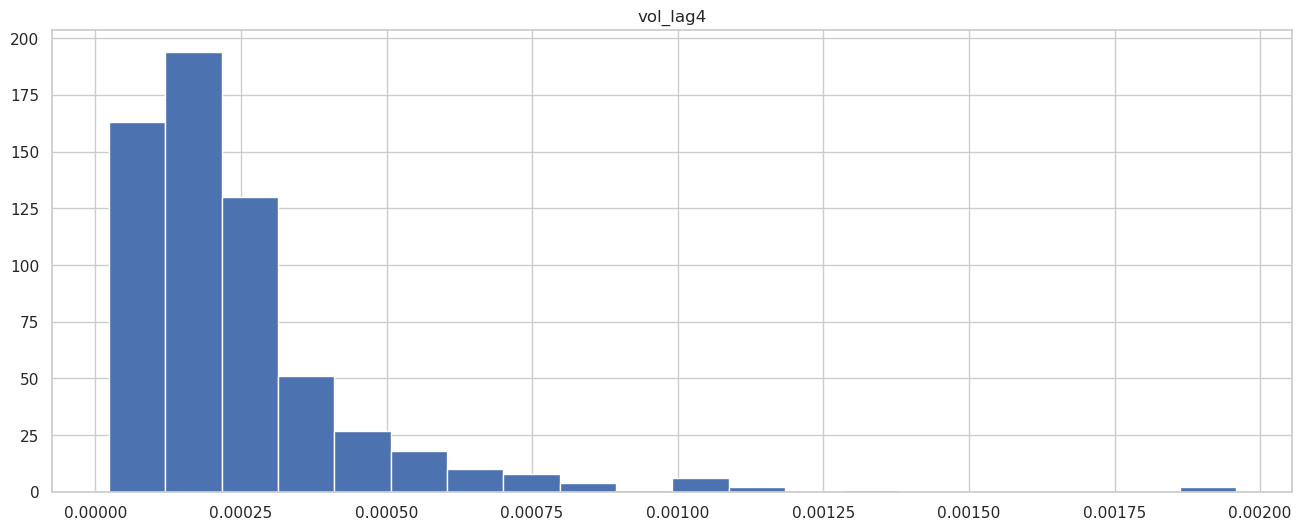

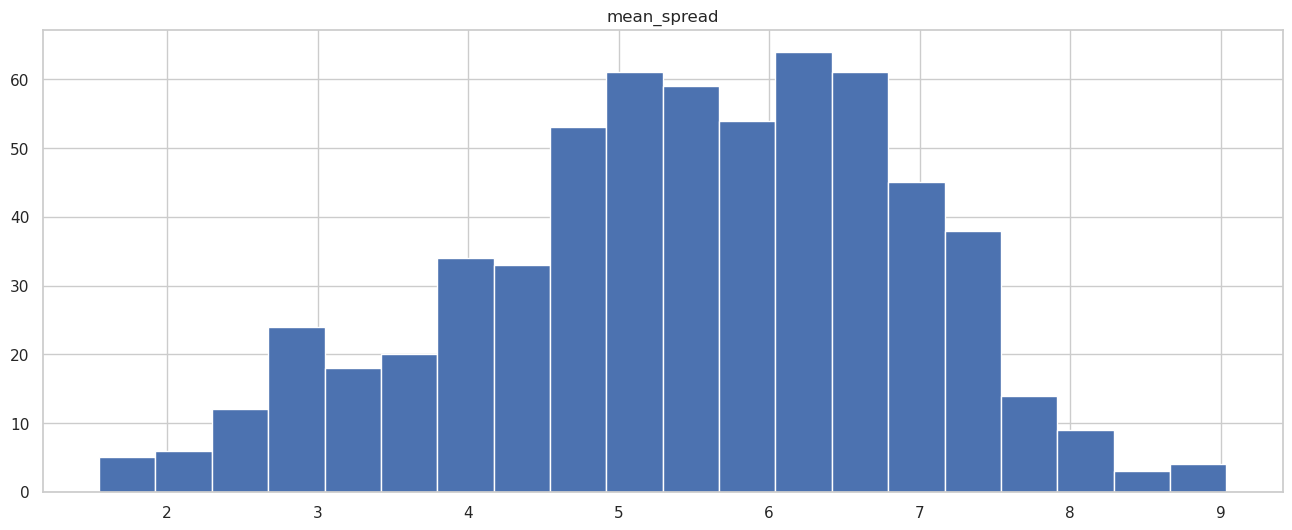

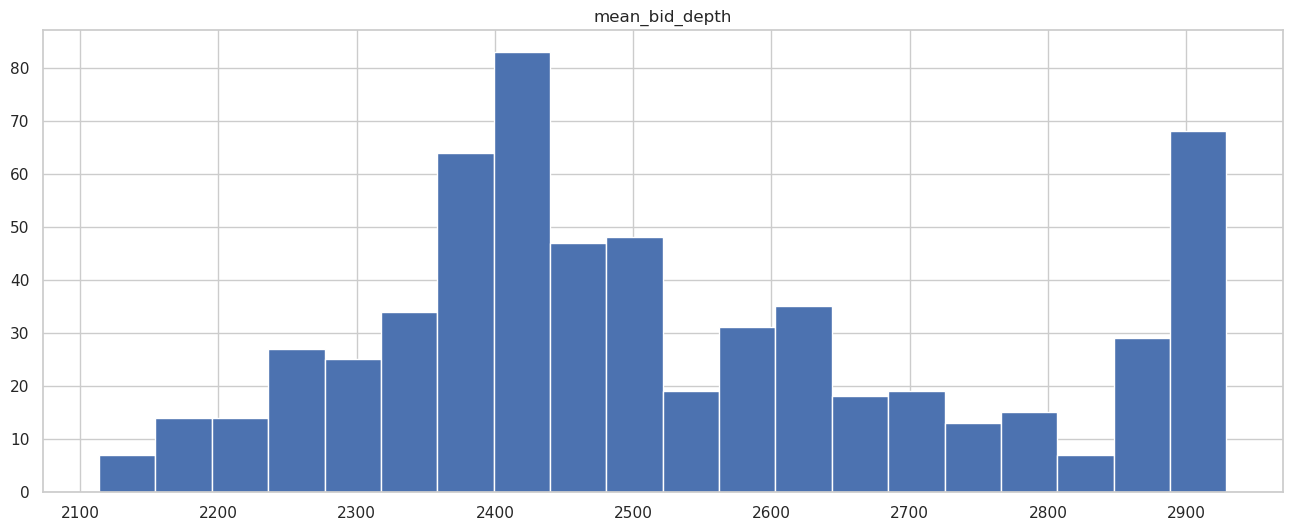

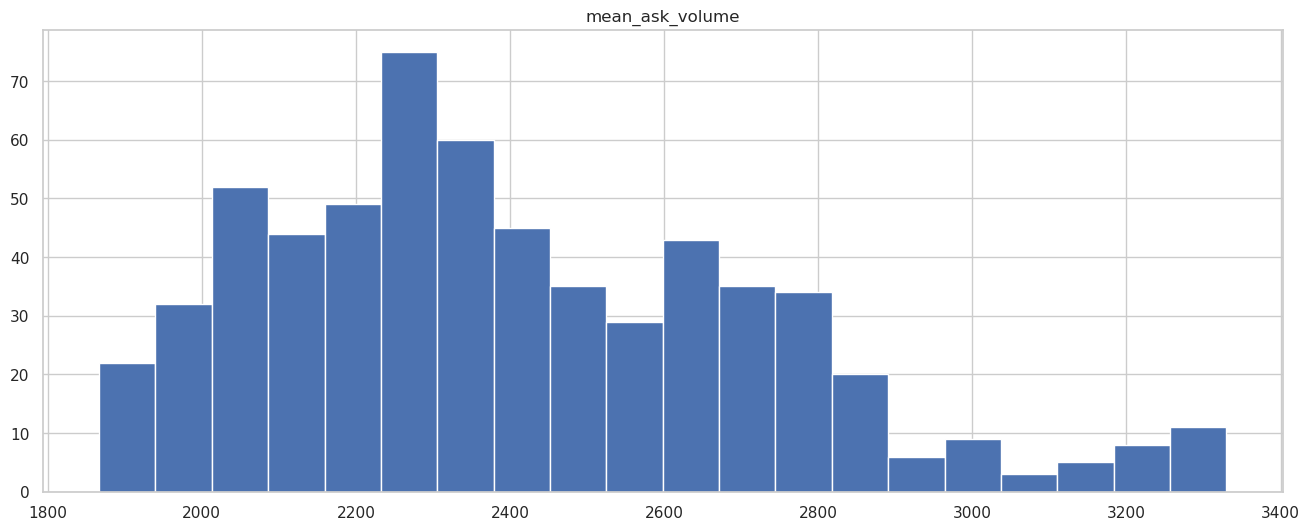

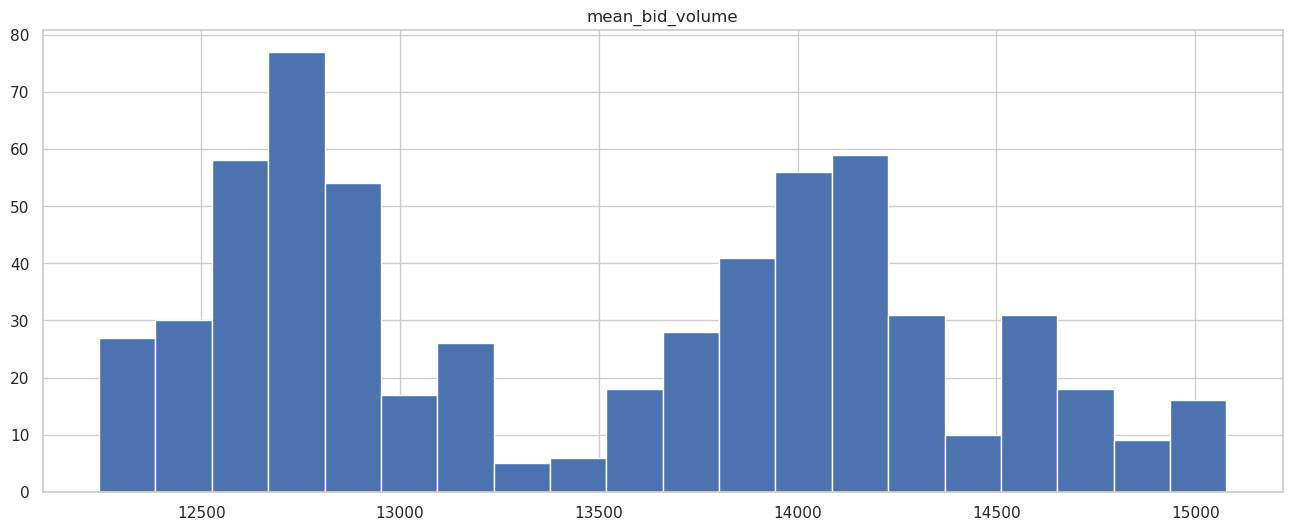

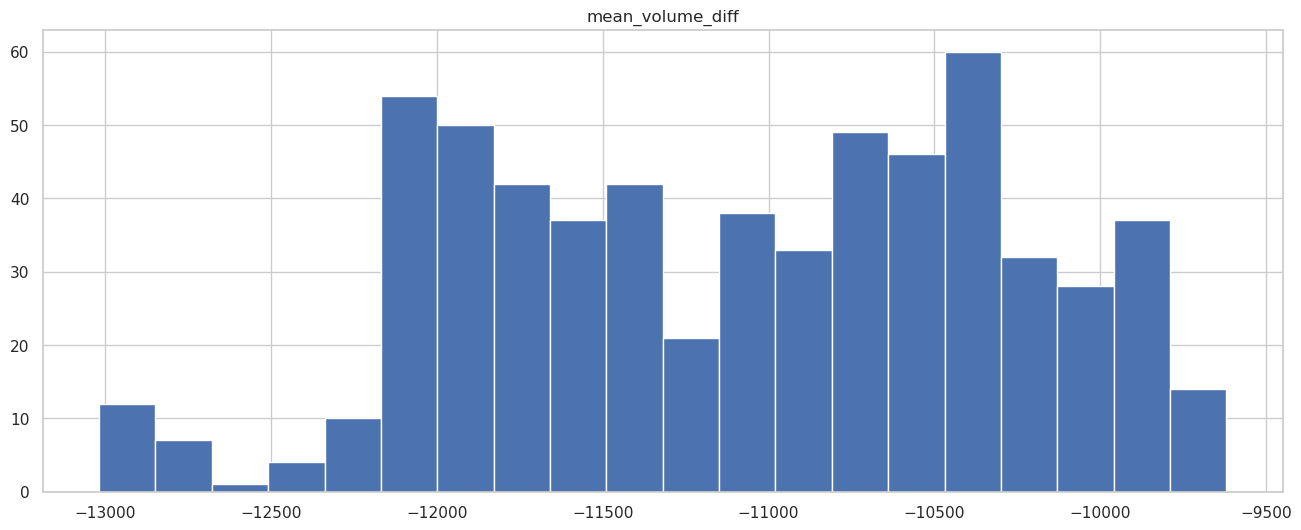

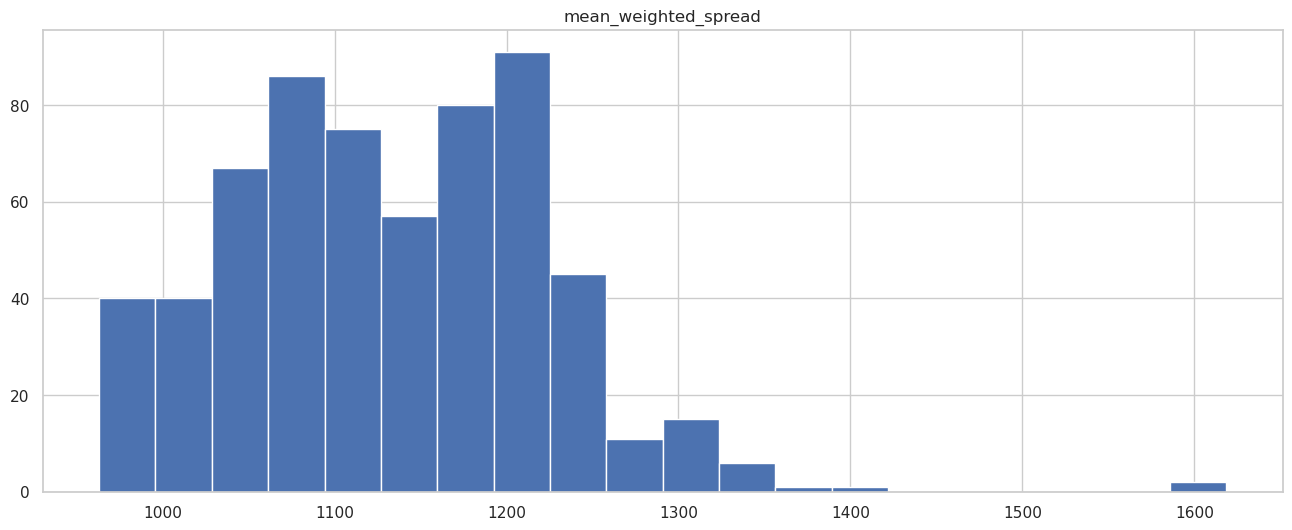

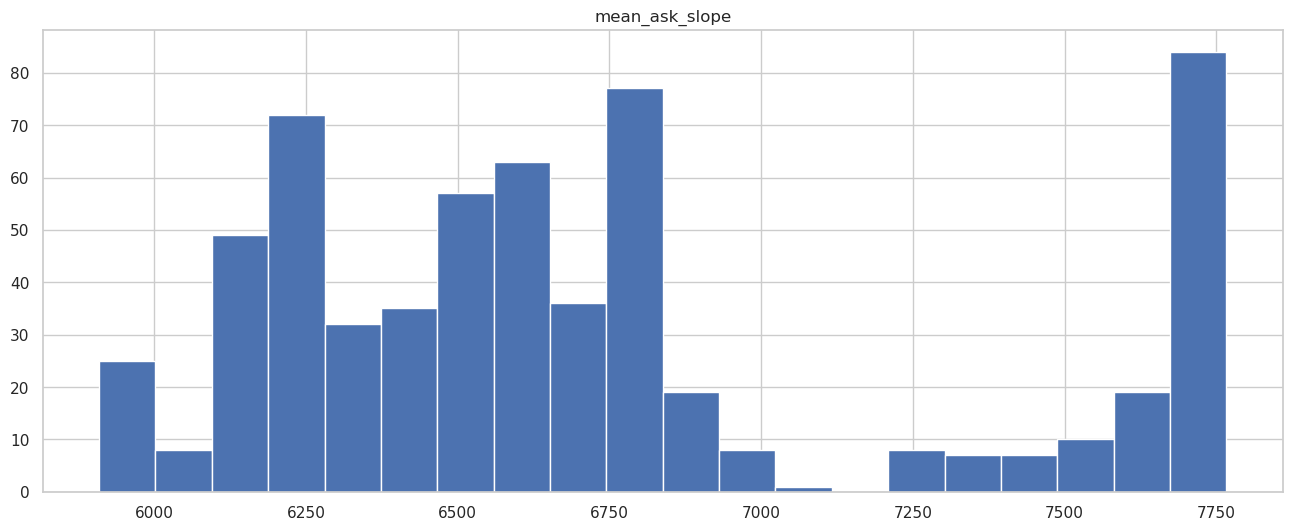

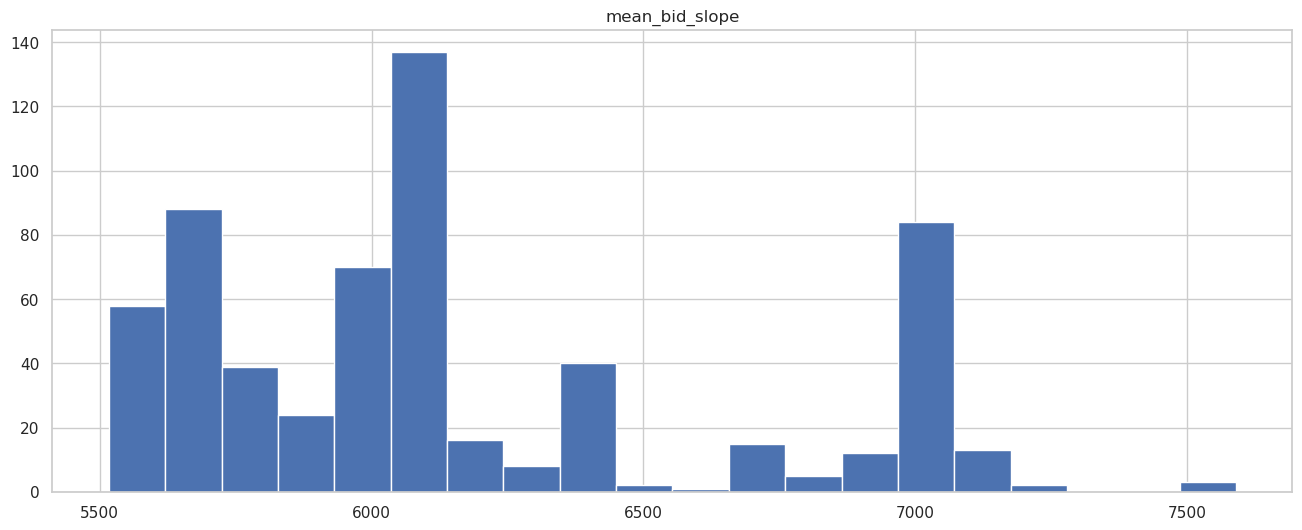

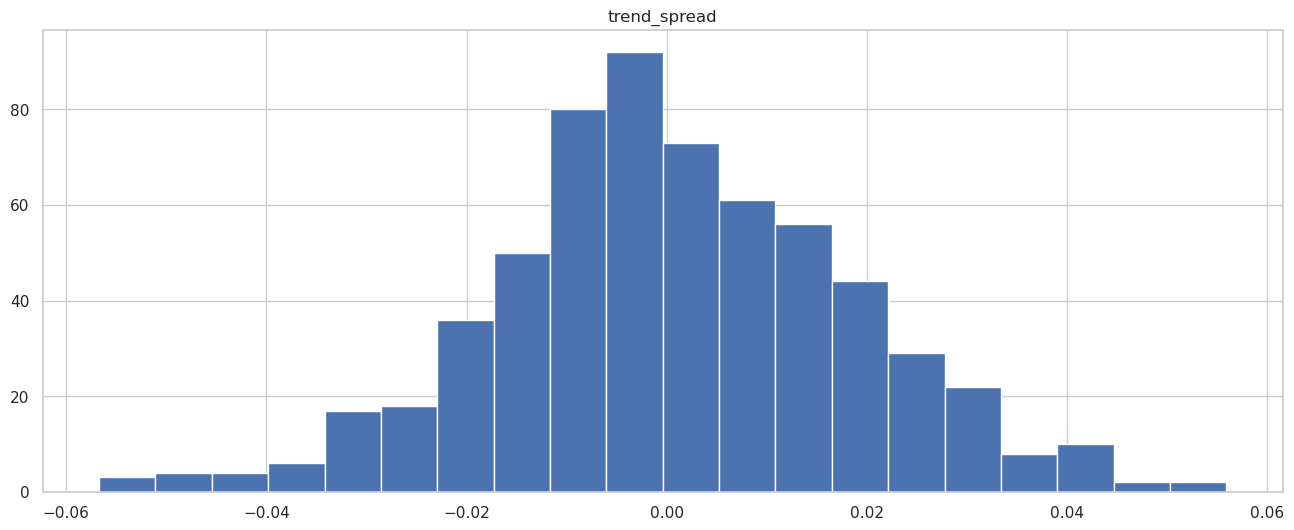

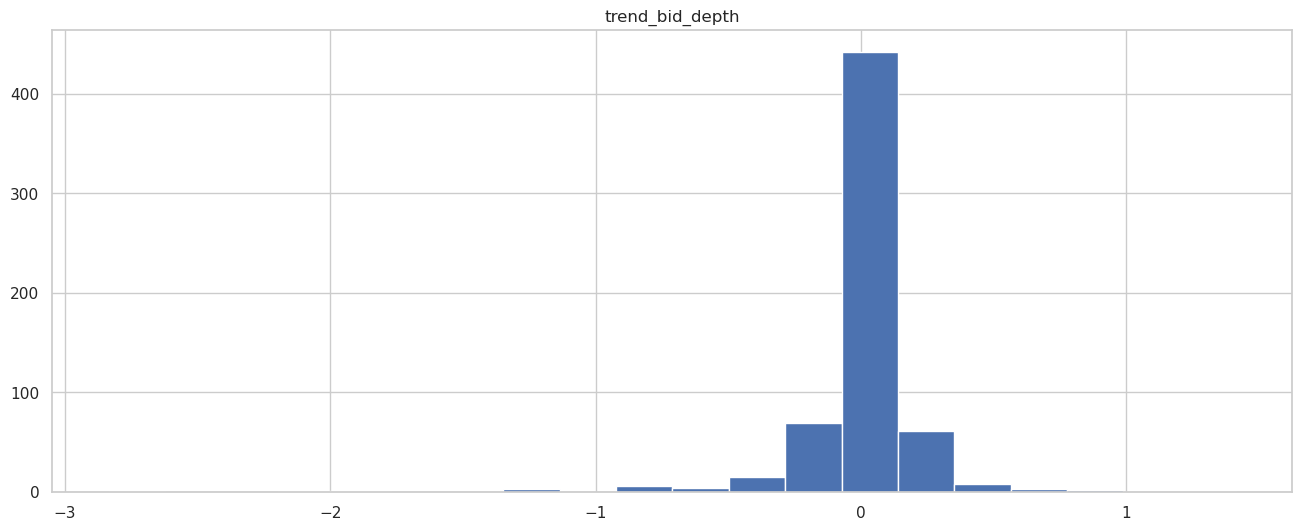

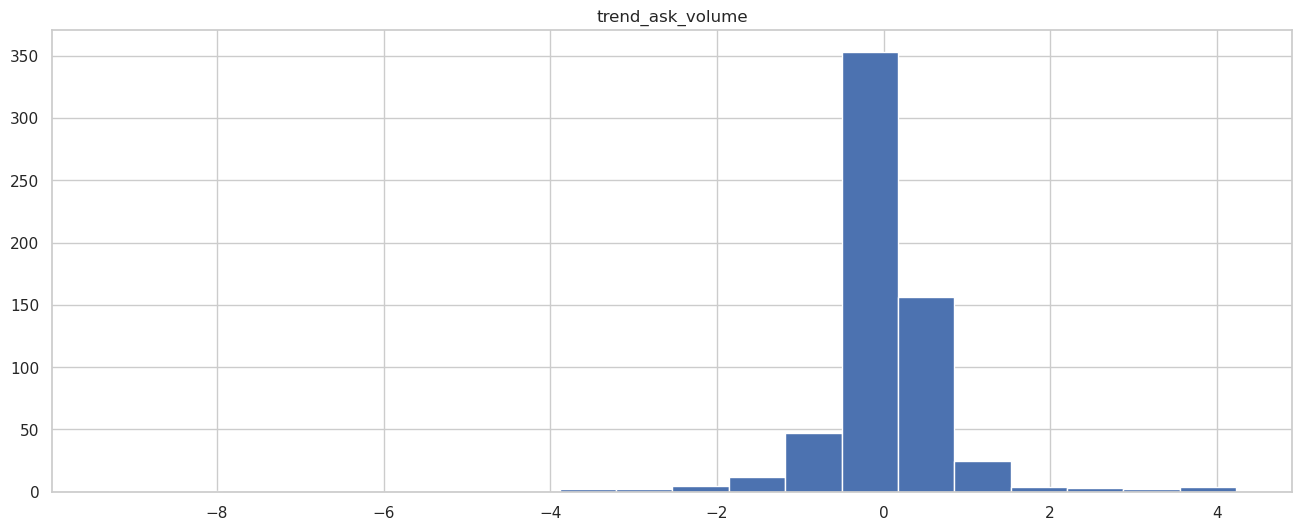

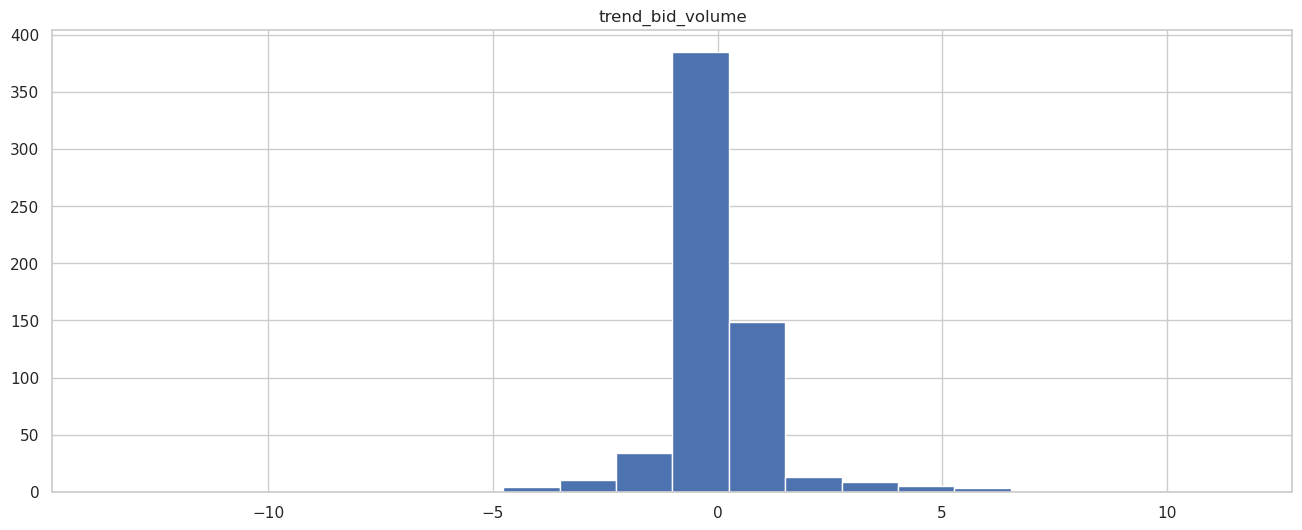

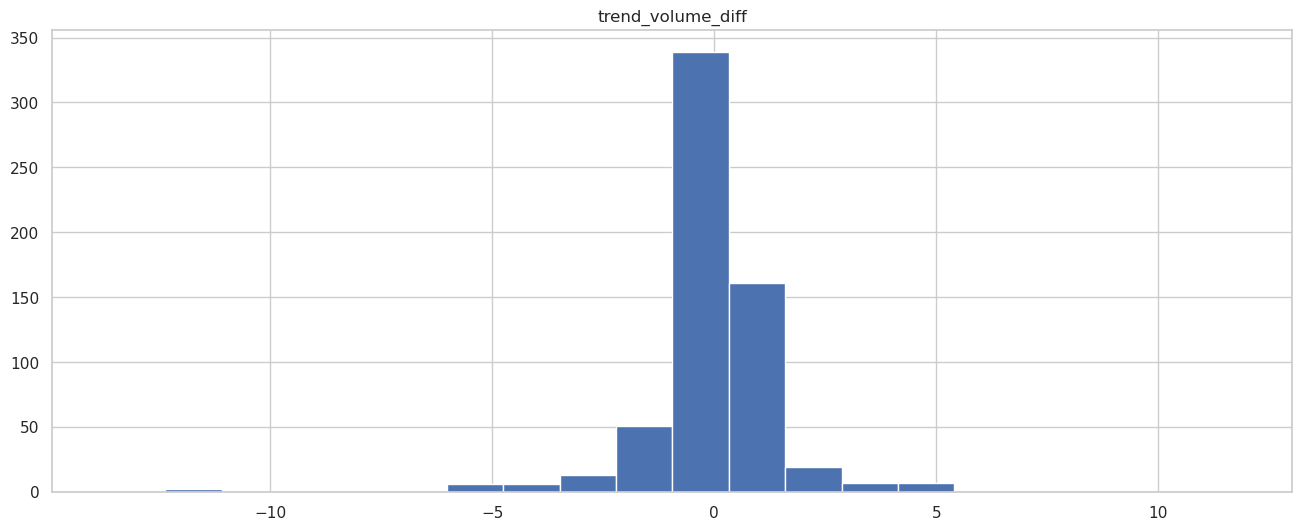

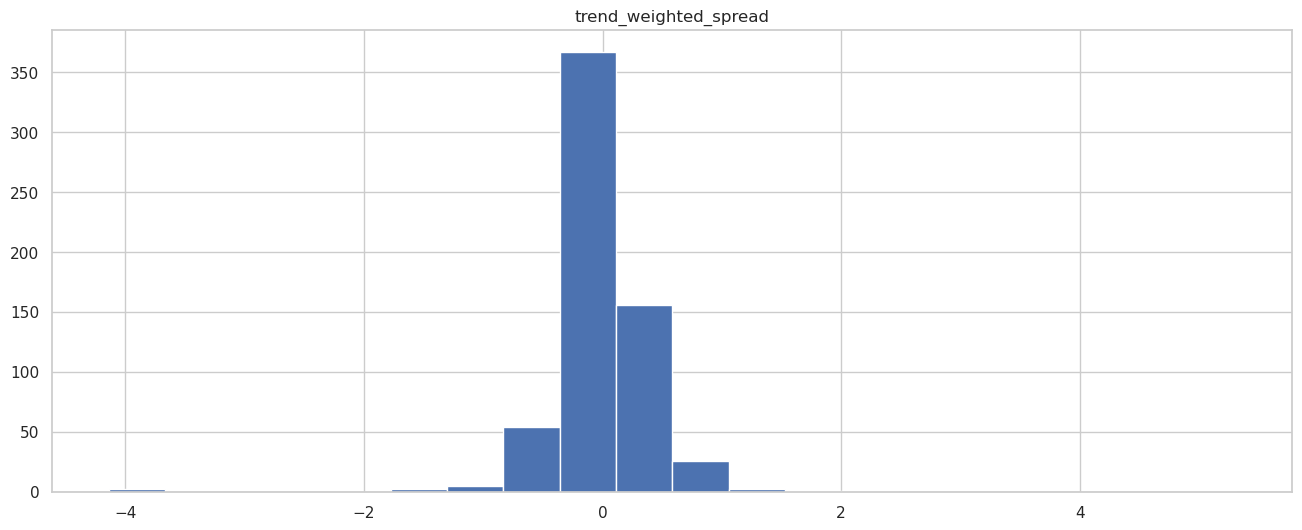

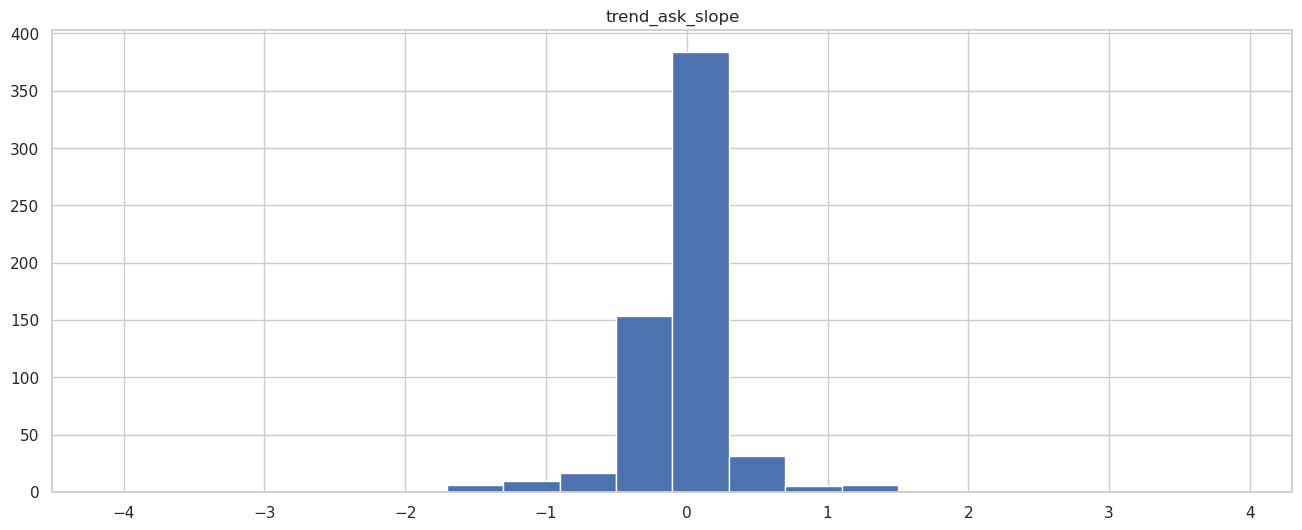

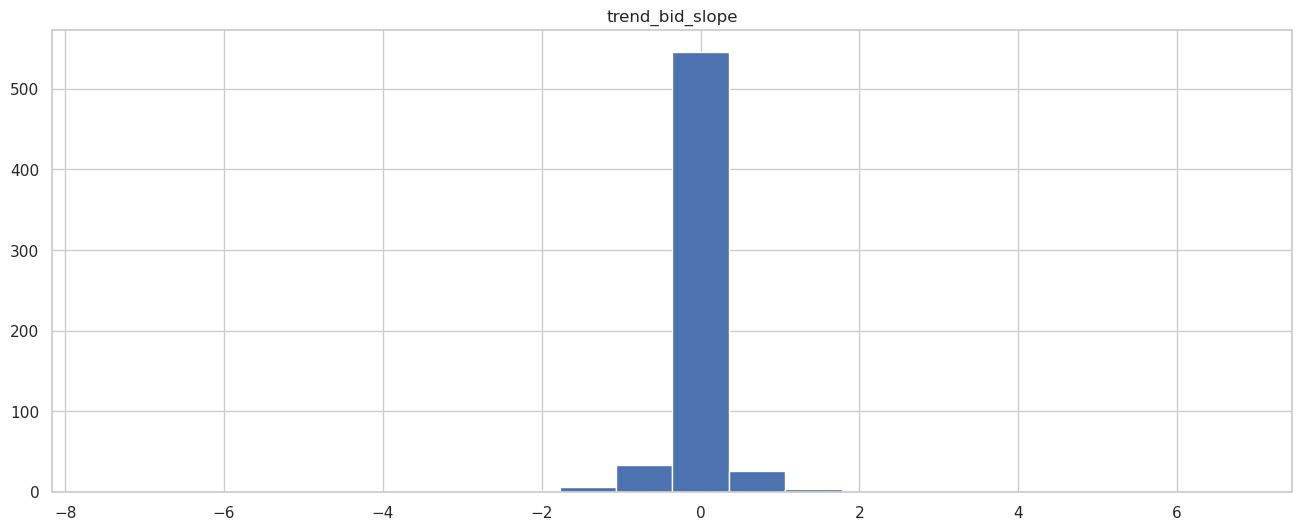

In [ ]:
for col in init_training_vola.columns:
    plt.hist(init_training_vola[col], bins=20)
    plt.title(col)
    plt.show()

We should:
1. Winsorize trend variables
2. transform volatility into log volatility
3. Standardize all variables

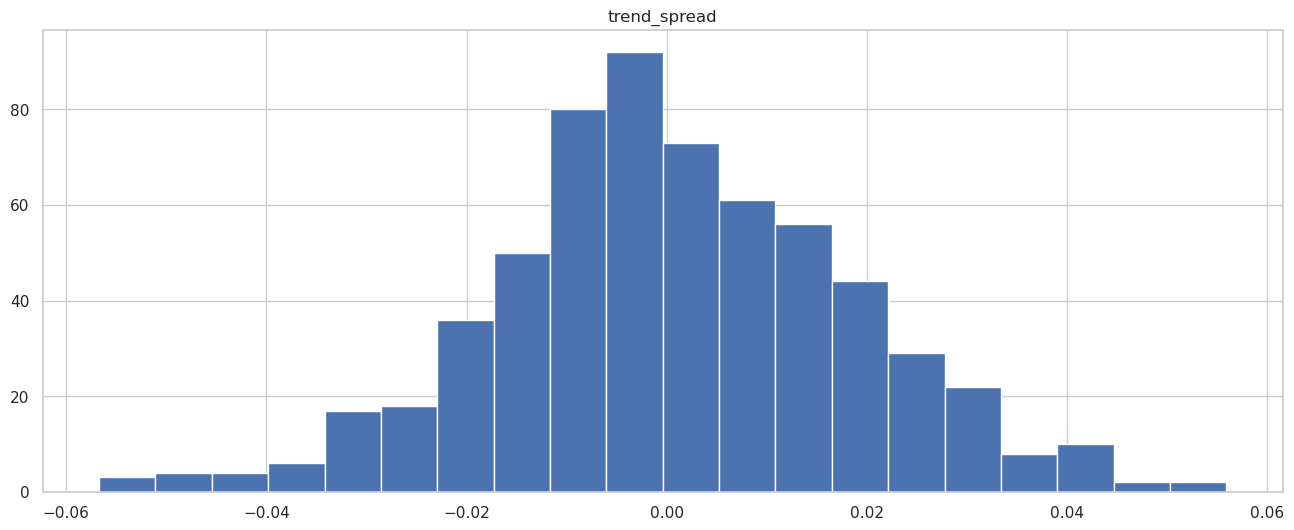

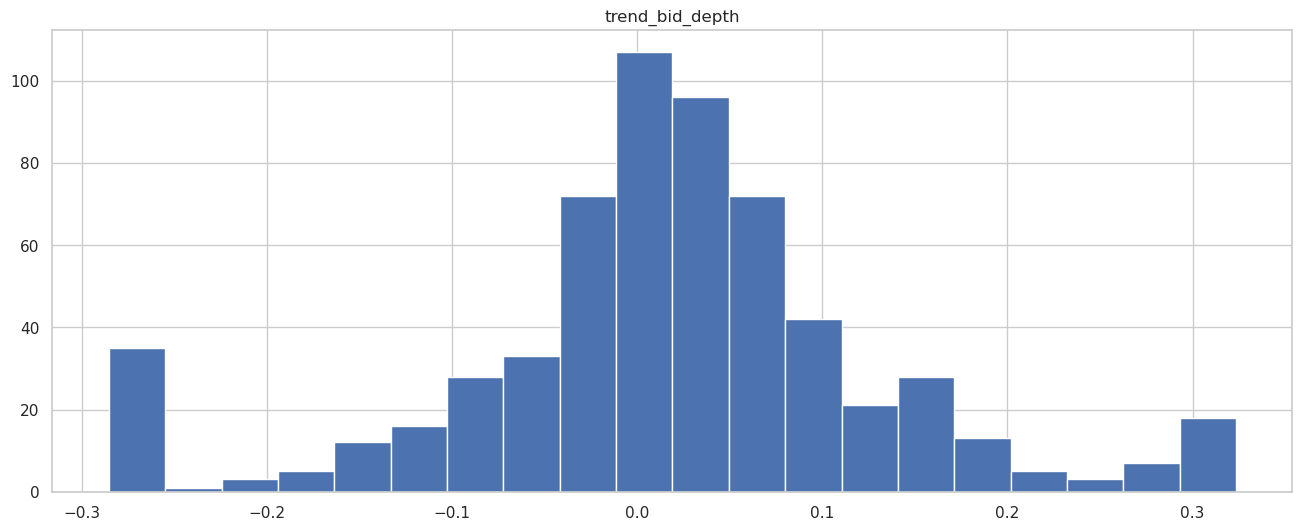

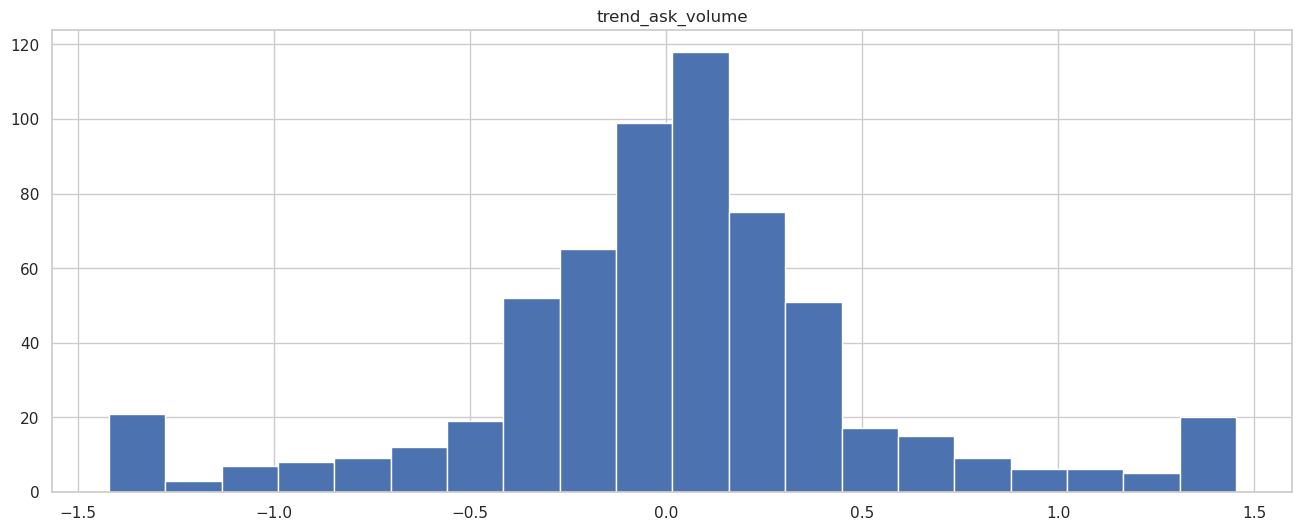

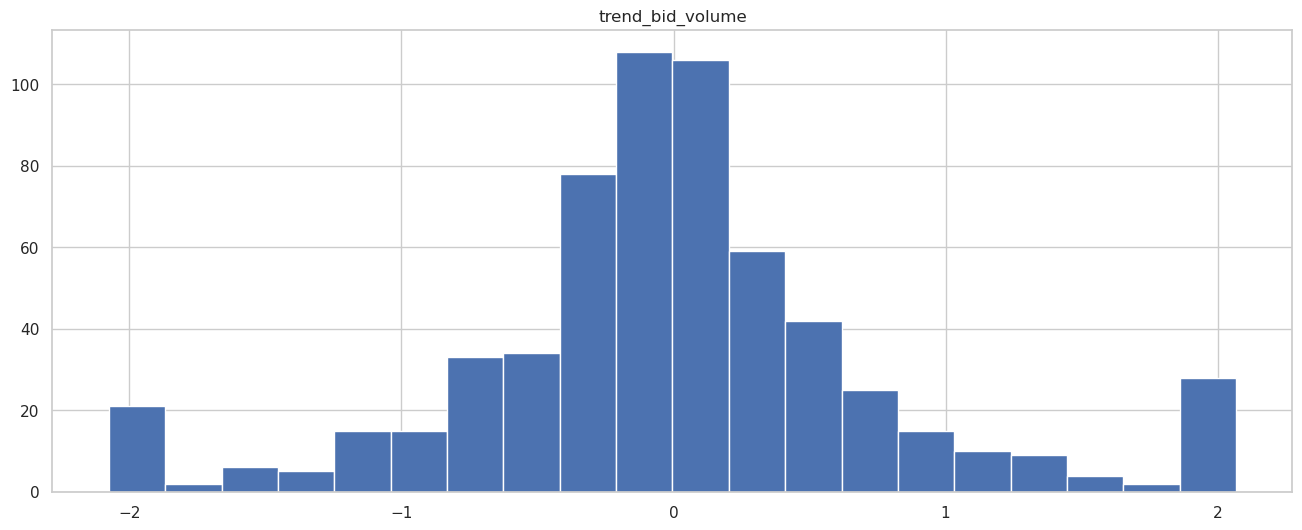

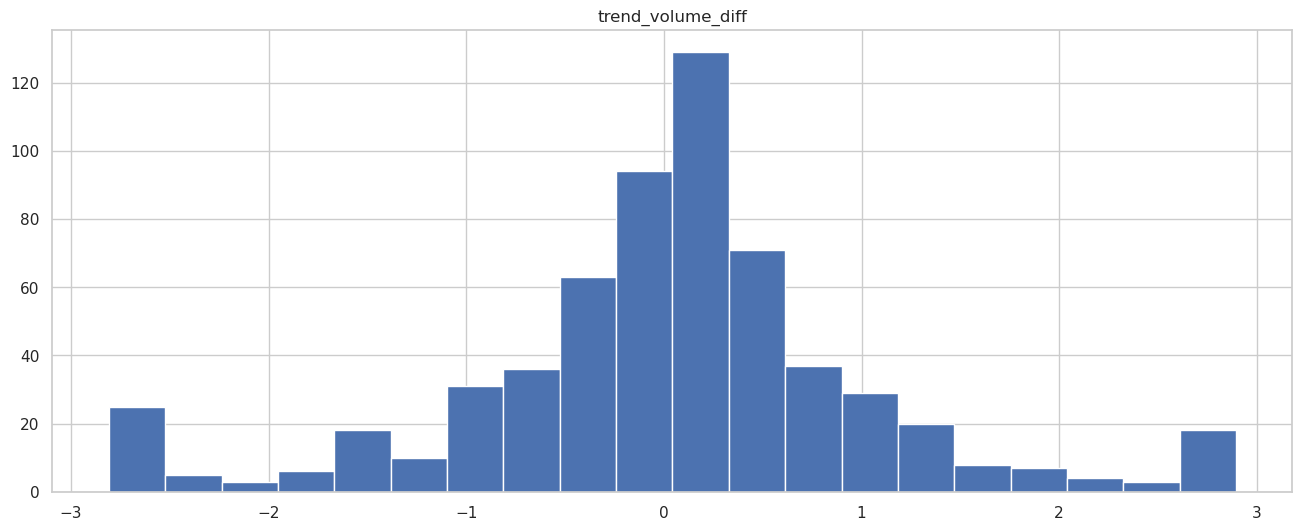

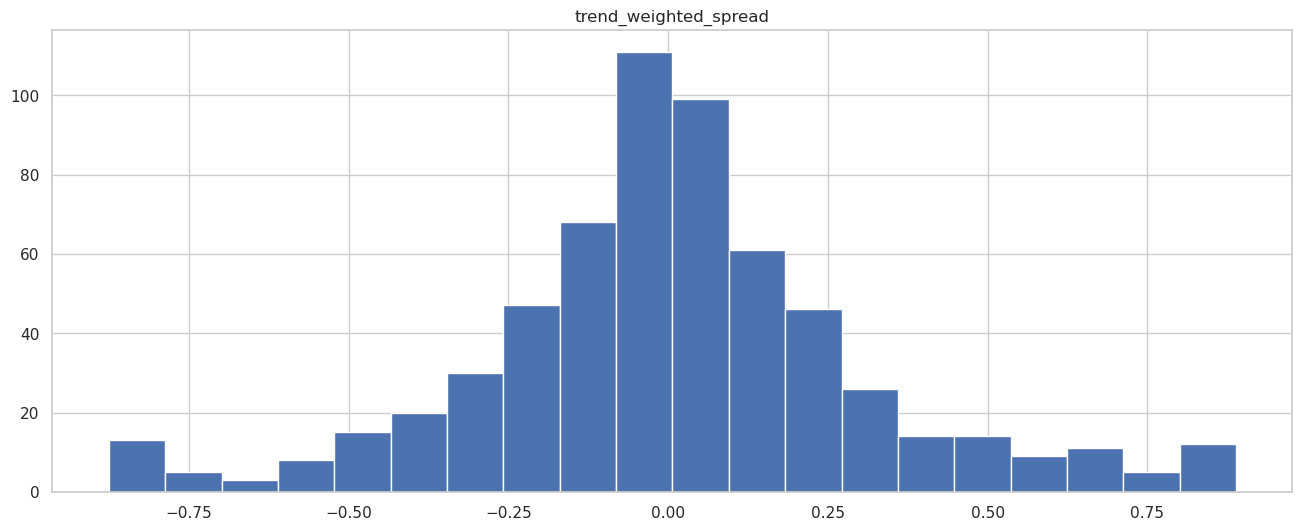

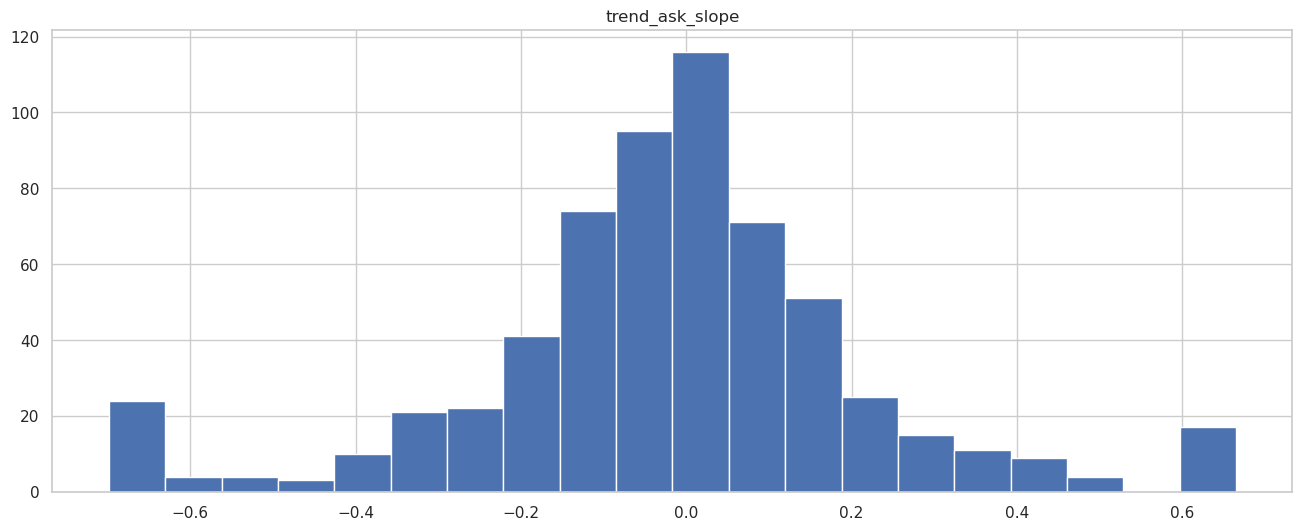

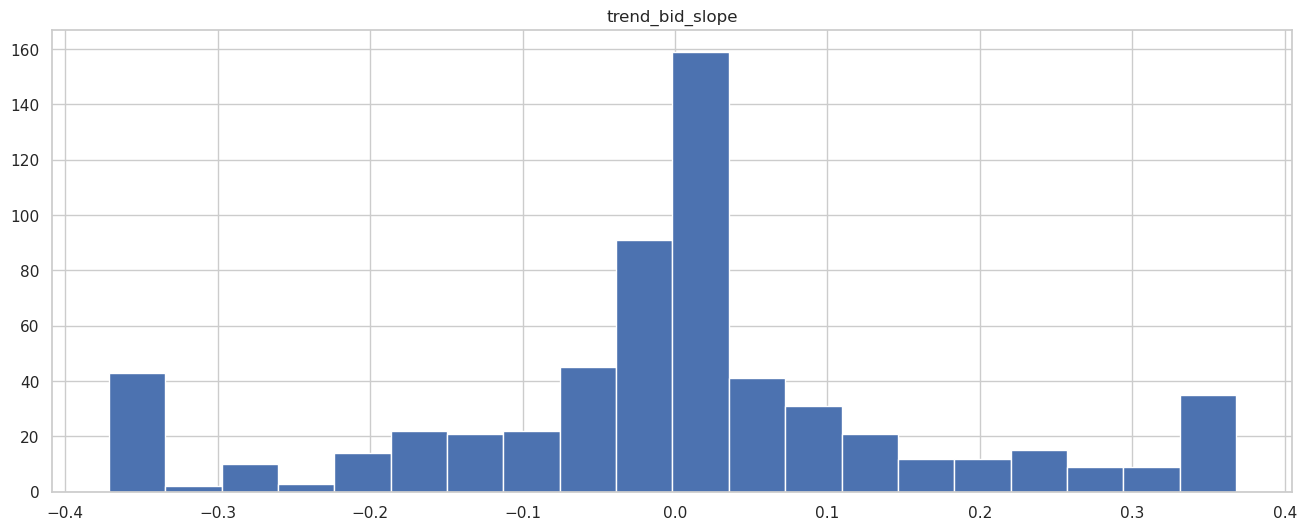

In [ ]:
# winsorize trend variables

def winsorize_trend(df, col):
    """
    Winsorize the trend variables to remove outliers
    """
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 2.5 * iqr
    upper_bound = q3 + 2.5 * iqr

    df.loc[:,col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df.loc[:,col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

for col in init_training_vola.columns:
    if "trend" in col:
        init_training_vola = winsorize_trend(init_training_vola, col)
        plt.hist(init_training_vola[col], bins=20)
        plt.title(col)
        plt.show()

In [ ]:
init_training_vola

vol  vol_lag1  vol_lag2  vol_lag3  vol_lag4  \
datetime                                                                
2018-06-05 03:00:00  0.000146  0.000502  0.000090  0.000115  0.000143   
2018-06-05 04:00:00  0.000177  0.000146  0.000502  0.000090  0.000115   
2018-06-05 05:00:00  0.000175  0.000177  0.000146  0.000502  0.000090   
2018-06-05 06:00:00  0.000147  0.000175  0.000177  0.000146  0.000502   
2018-06-05 07:00:00  0.000201  0.000147  0.000175  0.000177  0.000146   
...                       ...       ...       ...       ...       ...   
2018-06-30 17:00:00  0.000154  0.000202  0.000255  0.000383  0.000276   
2018-06-30 19:00:00  0.000089  0.000154  0.000202  0.000255  0.000383   
2018-06-30 20:00:00  0.000202  0.000089  0.000154  0.000202  0.000255   
2018-06-30 21:00:00  0.000126  0.000202  0.000089  0.000154  0.000202   
2018-06-30 22:00:00  0.000144  0.000126  0.000202  0.000089  0.000154   

                     mean_spread  mean_bid_depth  mean_ask_volume  \
datetime                                                            
2018-06-05 03:00:00     6.203417     2785.916667      2372.844947   
2018-06-05 04:00:00     4.801000     2772.733333      2395.809942   
2018-06-05 05:00:00     4.060500     2772.891667      2404.858040   
2018-06-05 06:00:00     5.597250     2771.450000      2383.447700   
2018-06-05 07:00:00     4.107000     2781.841667      2292.421042   
...                          ...             ...              ...   
2018-06-30 17:00:00     6.176167     2557.083333      2092.303235   
2018-06-30 19:00:00     5.389583     2565.350000      2108.711393   
2018-06-30 20:00:00     3.821000     2574.766667      2105.123597   
2018-06-30 21:00:00     5.137833     2586.366667      2101.037744   
2018-06-30 22:00:00     4.835333     2584.116667      2061.931272   

                     mean_bid_volume  mean_volume_diff  ...  mean_ask_slope  \
datetime                                                ...                   
2018-06-05 03:00:00     12694.560994     -10321.716046  ...     7490.462750   
2018-06-05 04:00:00     12664.993633     -10269.183692  ...     7463.342333   
2018-06-05 05:00:00     12638.495022     -10233.636982  ...     7462.075167   
2018-06-05 06:00:00     12633.956231     -10250.508530  ...     7463.747000   
2018-06-05 07:00:00     12601.889541     -10309.468499  ...     7488.274500   
...                              ...               ...  ...             ...   
2018-06-30 17:00:00     14849.814767     -12757.511532  ...     6407.300417   
2018-06-30 19:00:00     14948.667959     -12839.956566  ...     6382.392667   
2018-06-30 20:00:00     15004.766335     -12899.642738  ...     6375.012750   
2018-06-30 21:00:00     14995.197588     -12894.159844  ...     6386.450583   
2018-06-30 22:00:00     14998.221184     -12936.289912  ...     6397.811917   

                     mean_bid_slope  trend_spread  trend_bid_depth  \
datetime                                                             
2018-06-05 03:00:00     6921.164667      0.016212        -0.285404   
2018-06-05 04:00:00     6894.615667     -0.009749         0.039676   
2018-06-05 05:00:00     6876.743750      0.040072        -0.068362   
2018-06-05 06:00:00     6869.339083     -0.006928         0.116661   
2018-06-05 07:00:00     6855.488167     -0.006796         0.036075   
...                             ...           ...              ...   
2018-06-30 17:00:00     5766.342083      0.002489         0.067977   
2018-06-30 19:00:00     5797.928917     -0.003386         0.023522   
2018-06-30 20:00:00     5791.052917      0.001793         0.132294   
2018-06-30 21:00:00     5793.017667      0.039725         0.121217   
2018-06-30 22:00:00     5792.877083      0.001591        -0.125599   

                     trend_ask_volume  trend_bid_volume  trend_volume_diff  \
datetime                                                                     
2018-06-05 03:00:00          0.375979         -0.893486           1.269465   
2018-

/tmp/ipykernel_69081/781432485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_training_vola.loc[:,"log_vol"] = np.log(init_training_vola["vol"])


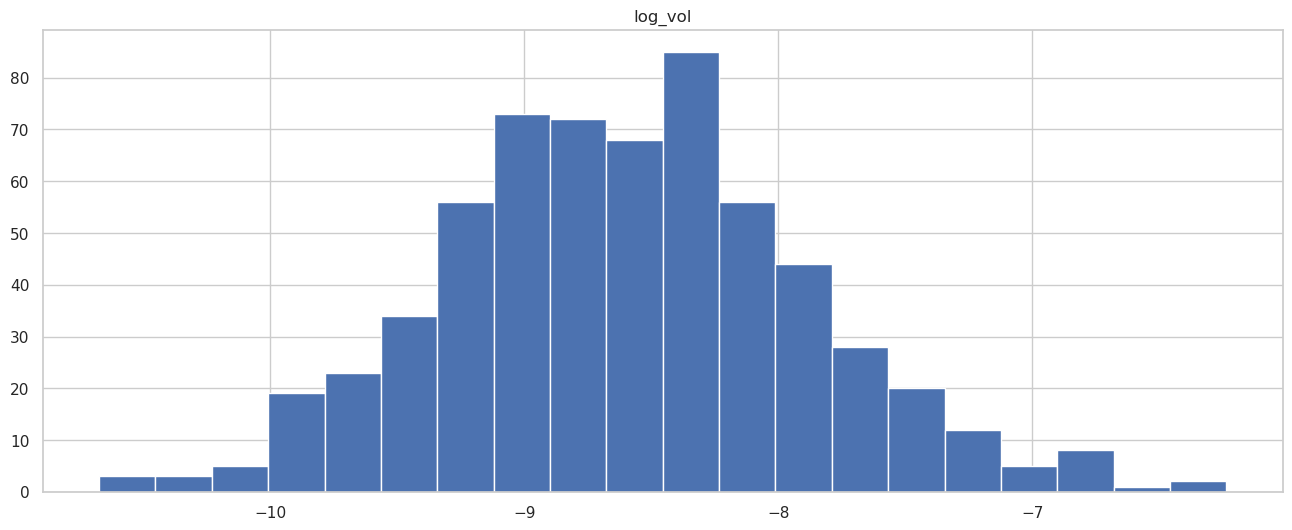

In [ ]:
# make log vol

init_training_vola.loc[:,"log_vol"] = np.log(init_training_vola["vol"])
plt.hist(init_training_vola.loc[:,f"log_vol"], bins=20)
plt.title(f"log_vol")
plt.show()

In [ ]:
for i in range(1, 5):
    init_training_vola.loc[:,f"log_vol_lag{i}"] = init_training_vola["log_vol"].shift(i)

/tmp/ipykernel_69081/3629175701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_training_vola.loc[:,f"log_vol_lag{i}"] = init_training_vola["log_vol"].shift(i)
/tmp/ipykernel_69081/3629175701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_training_vola.loc[:,f"log_vol_lag{i}"] = init_training_vola["log_vol"].shift(i)
/tmp/ipykernel_69081/3629175701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# standarzize the data, output pandas dataframe
columns = init_training_vola.columns
index = init_training_vola.index
init_training_vola = scaler.fit_transform(init_training_vola)
init_training_vola = pd.DataFrame(init_training_vola, columns=columns, index=index)

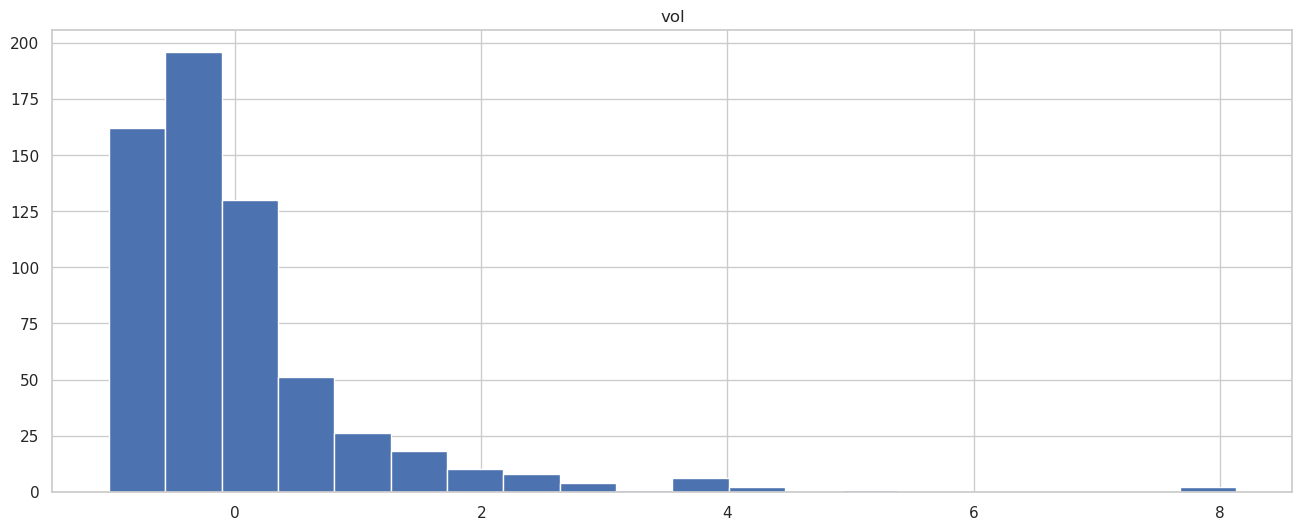

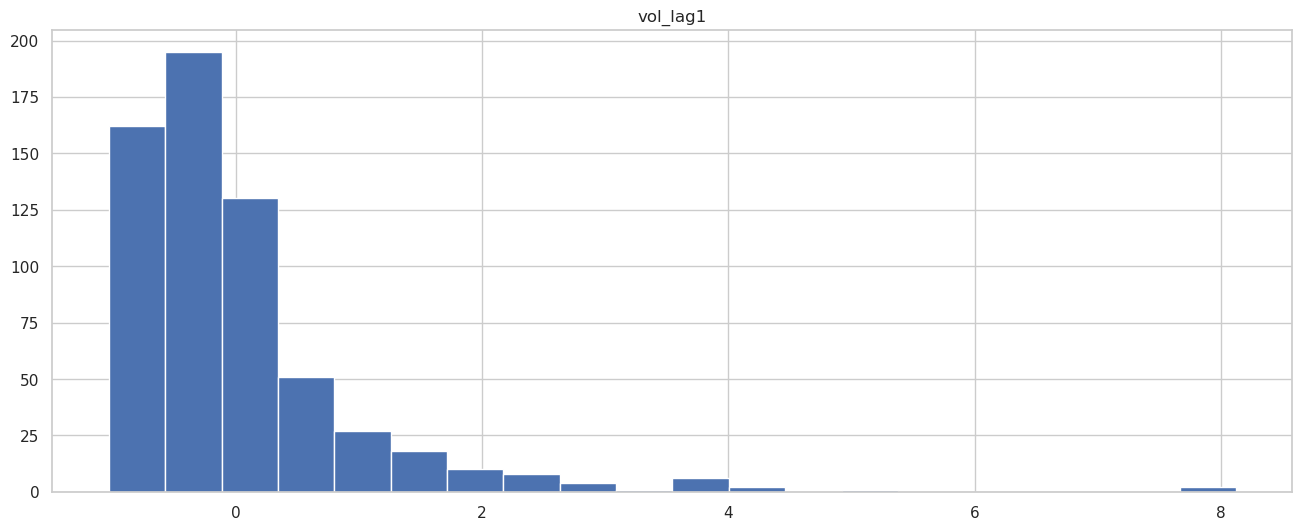

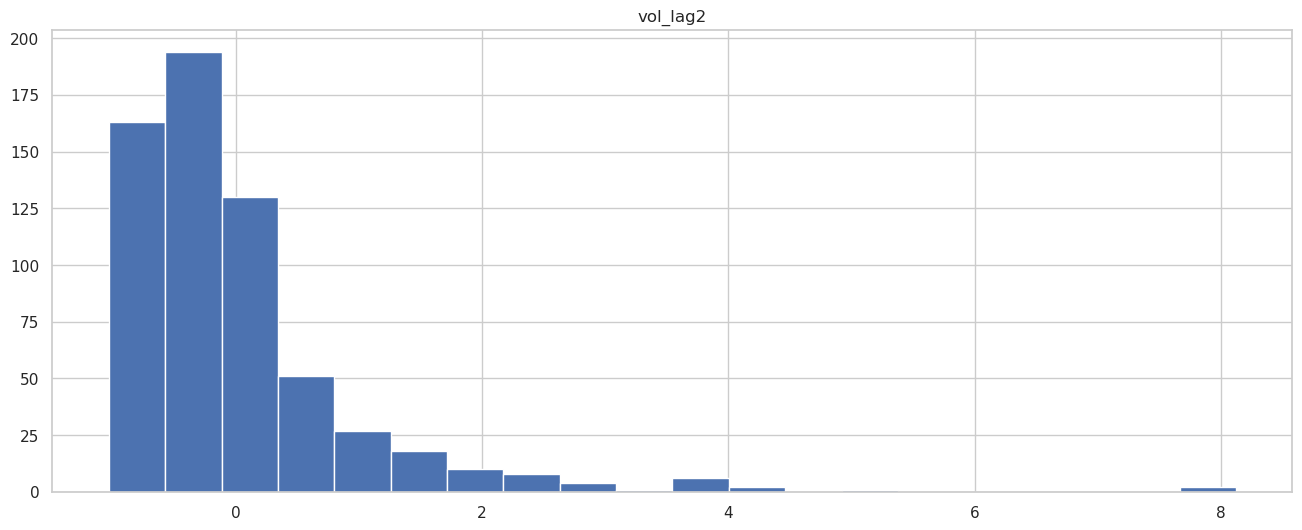

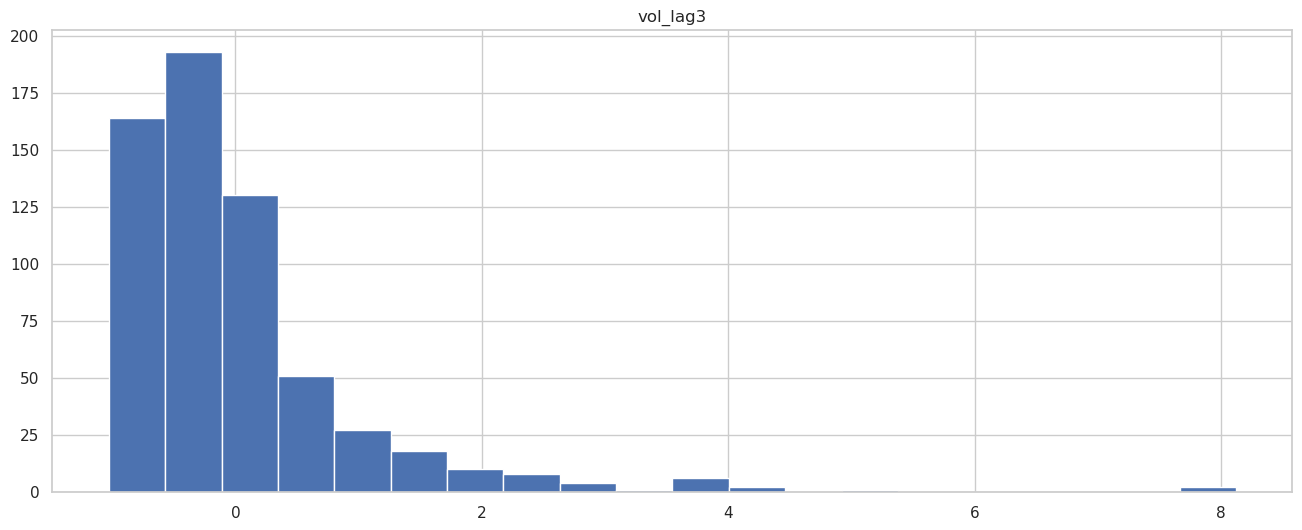

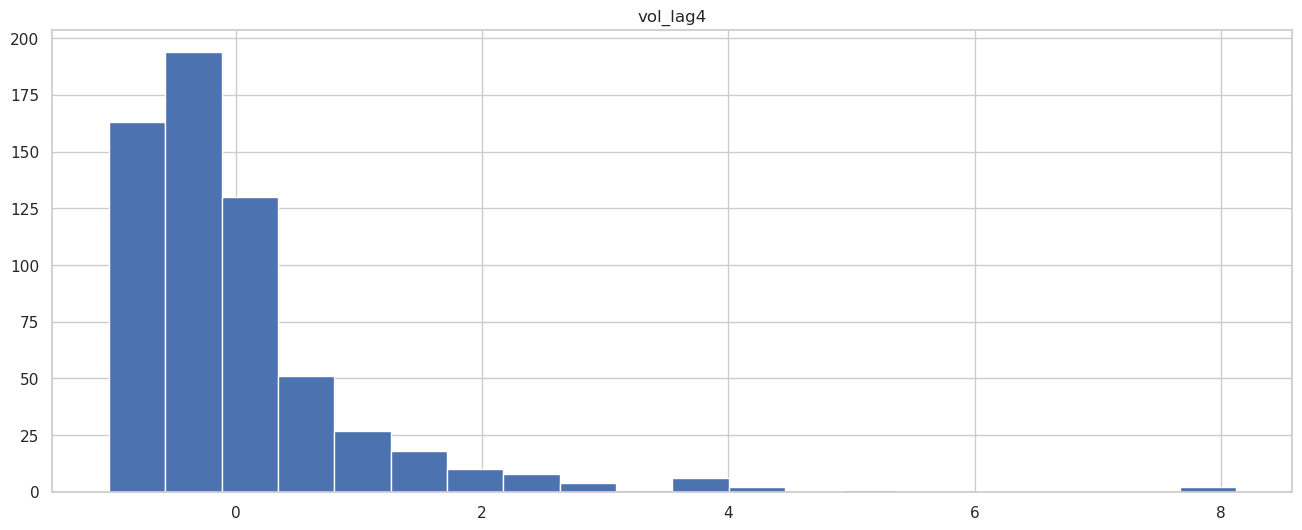

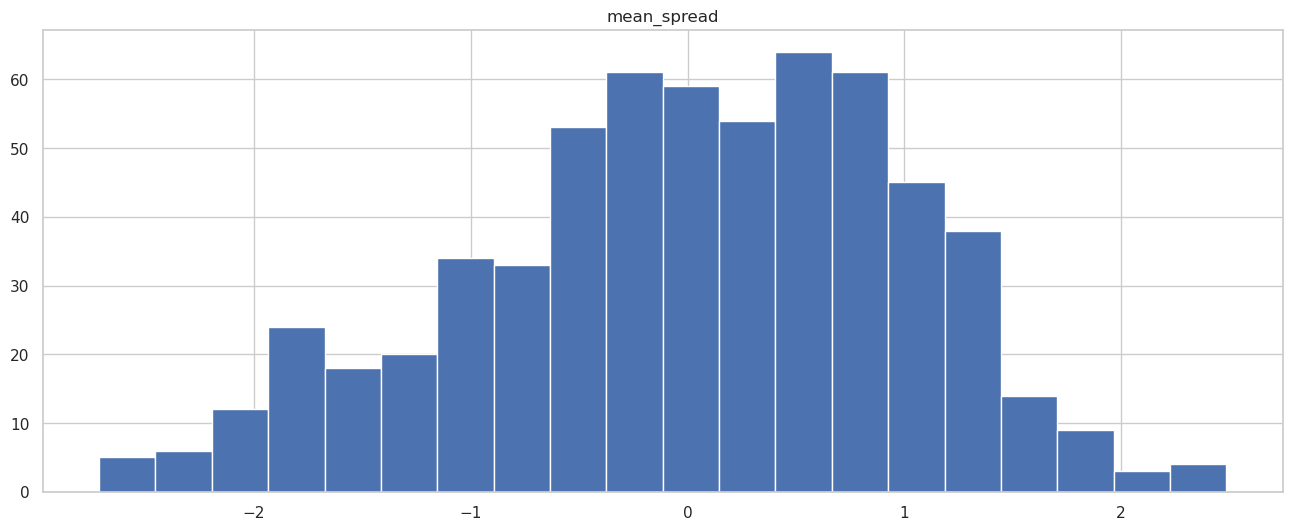

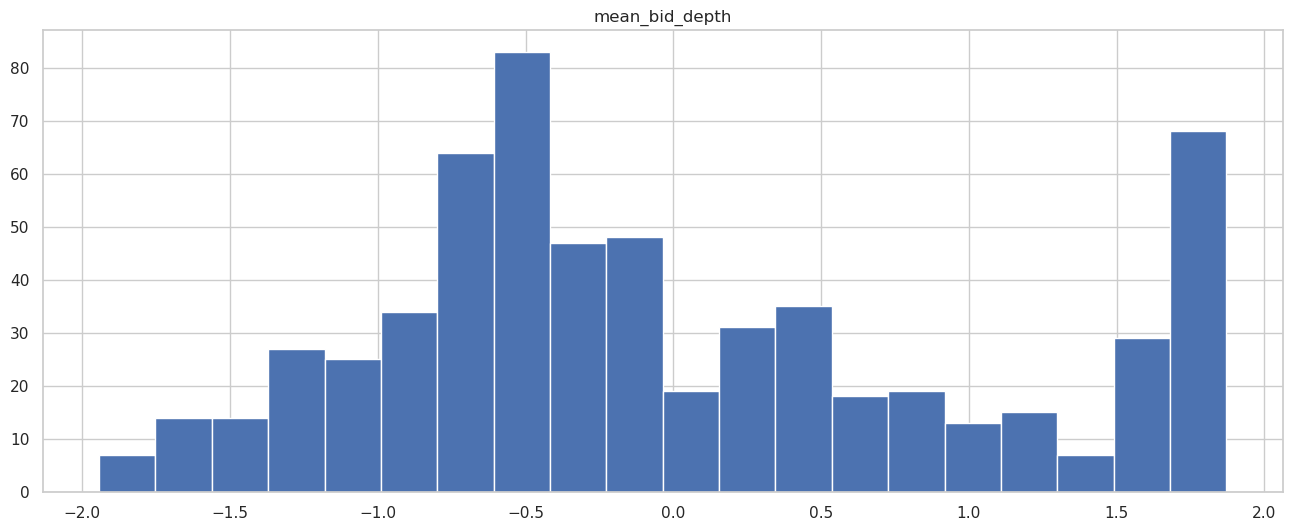

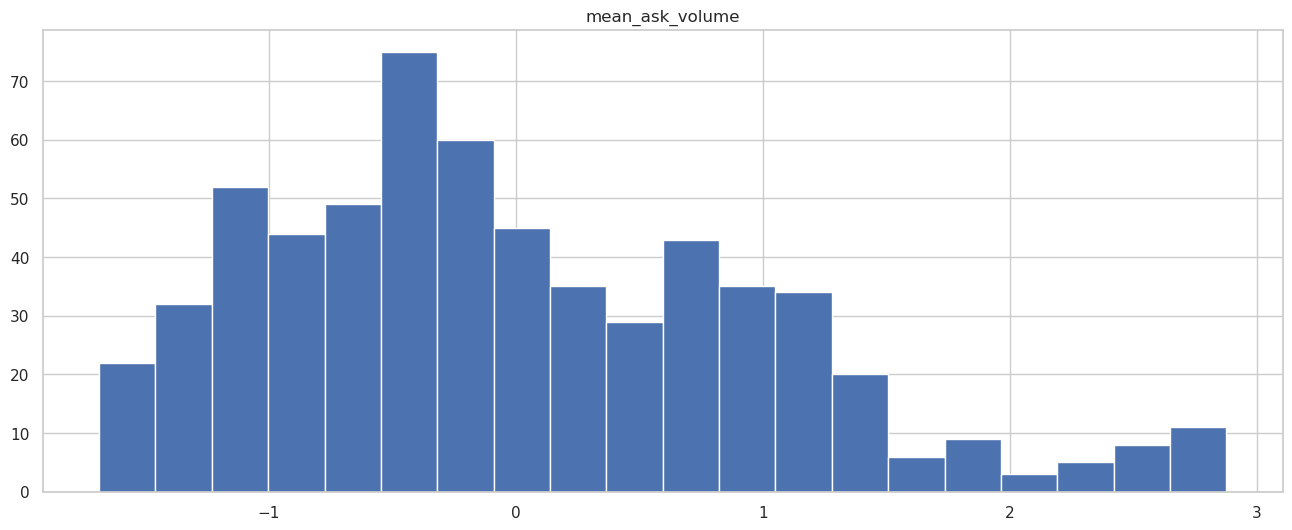

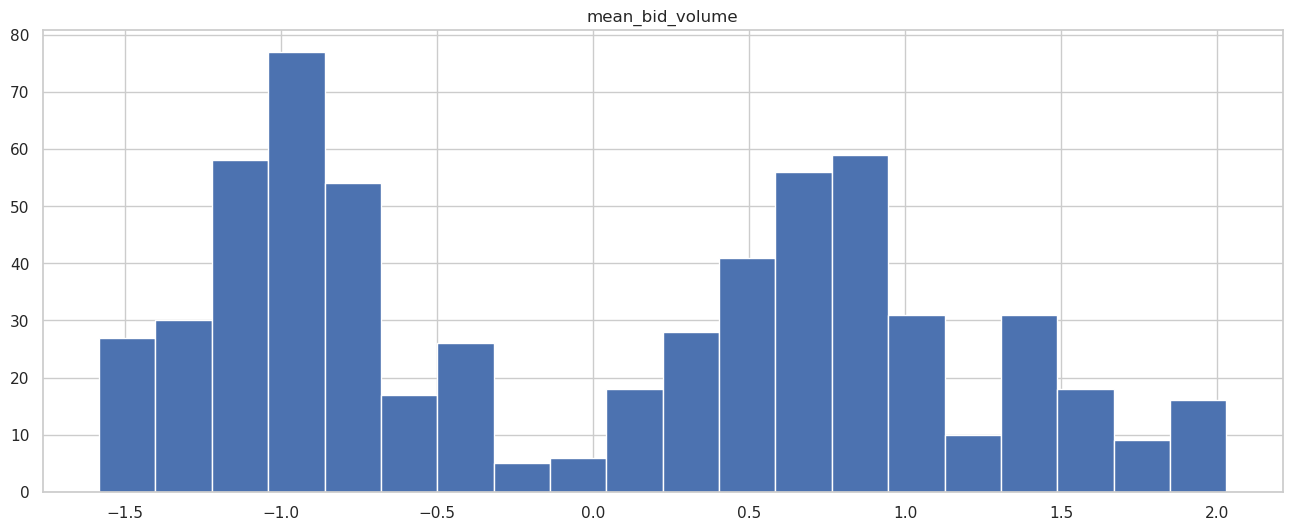

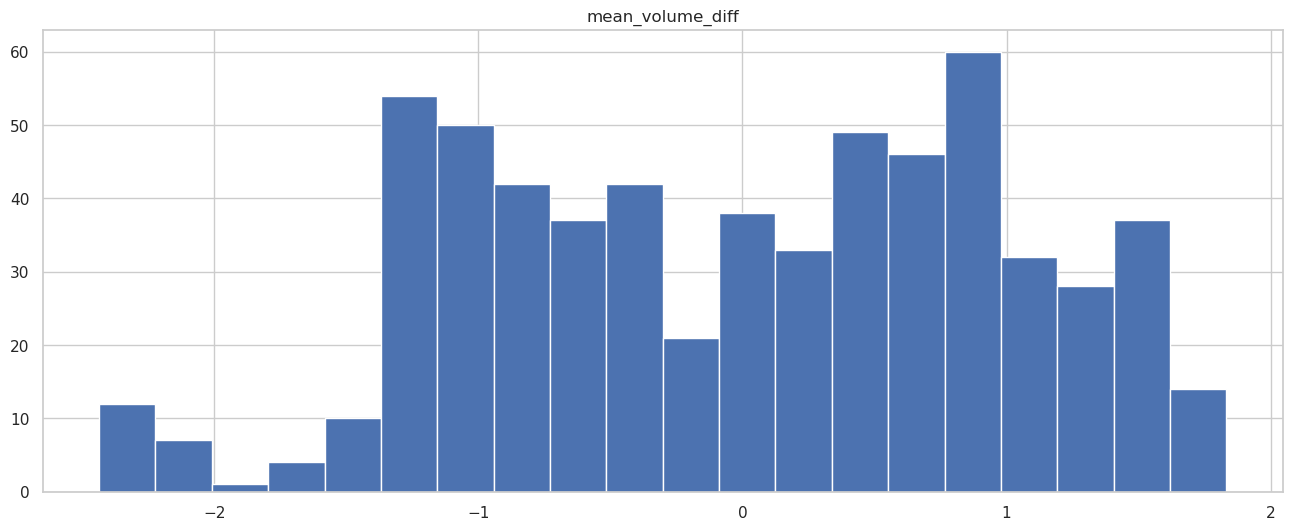

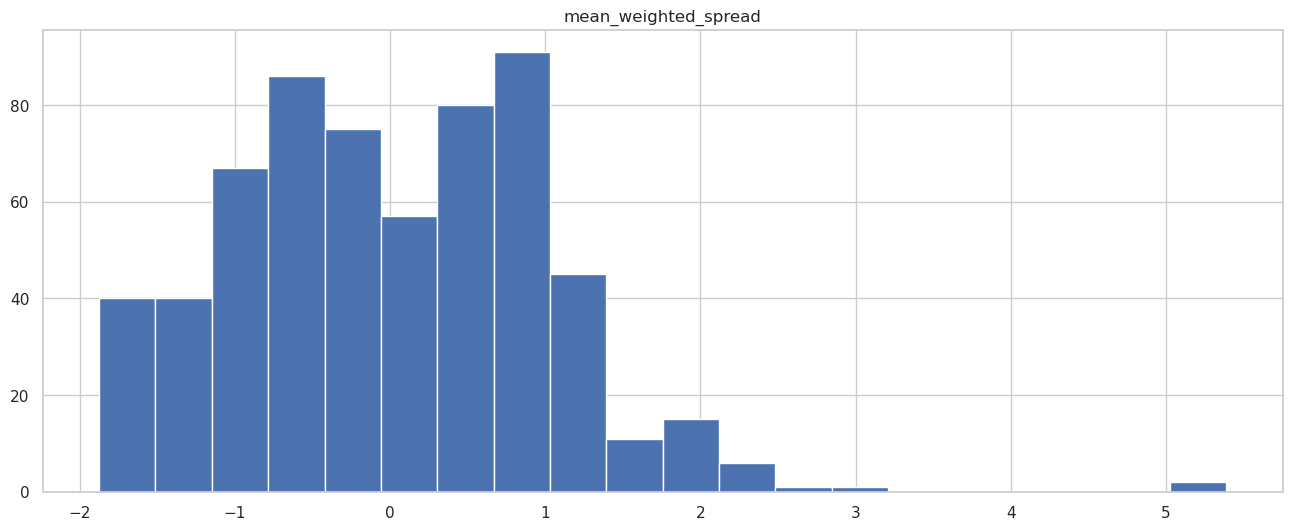

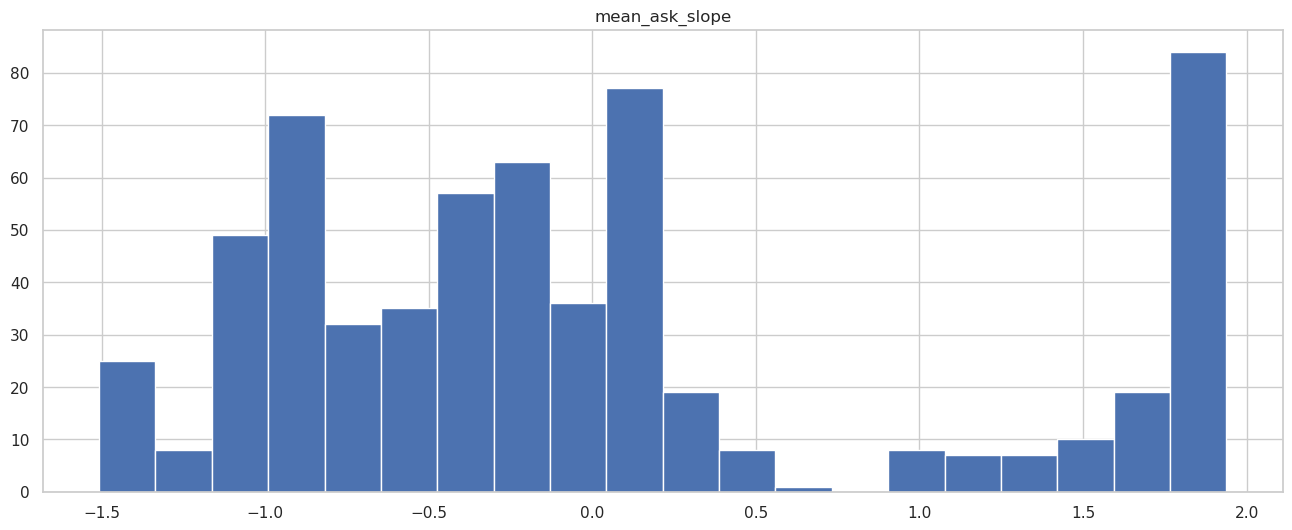

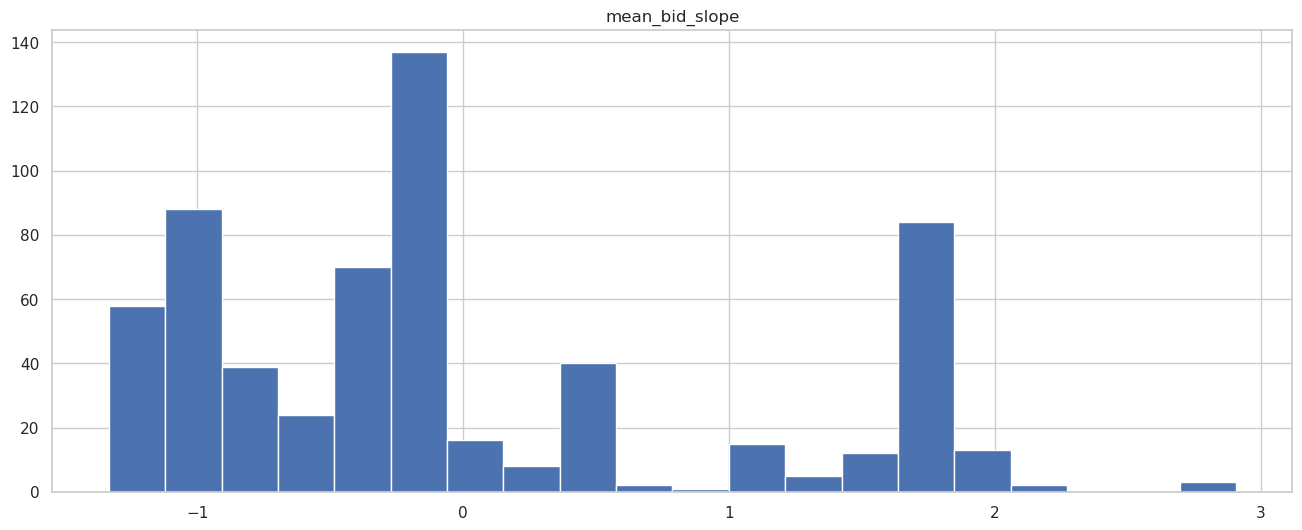

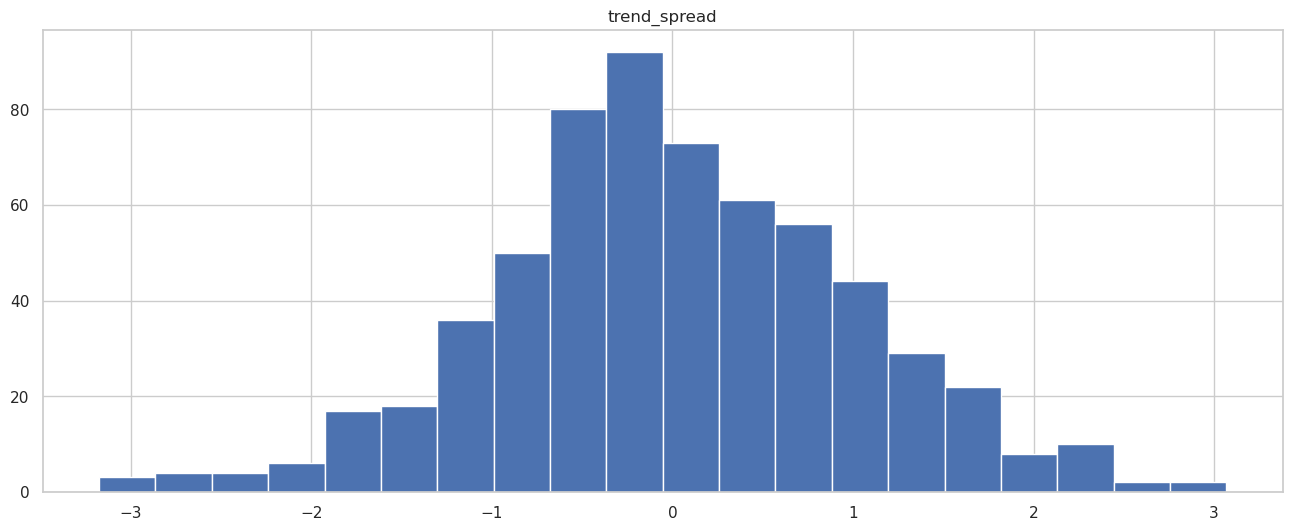

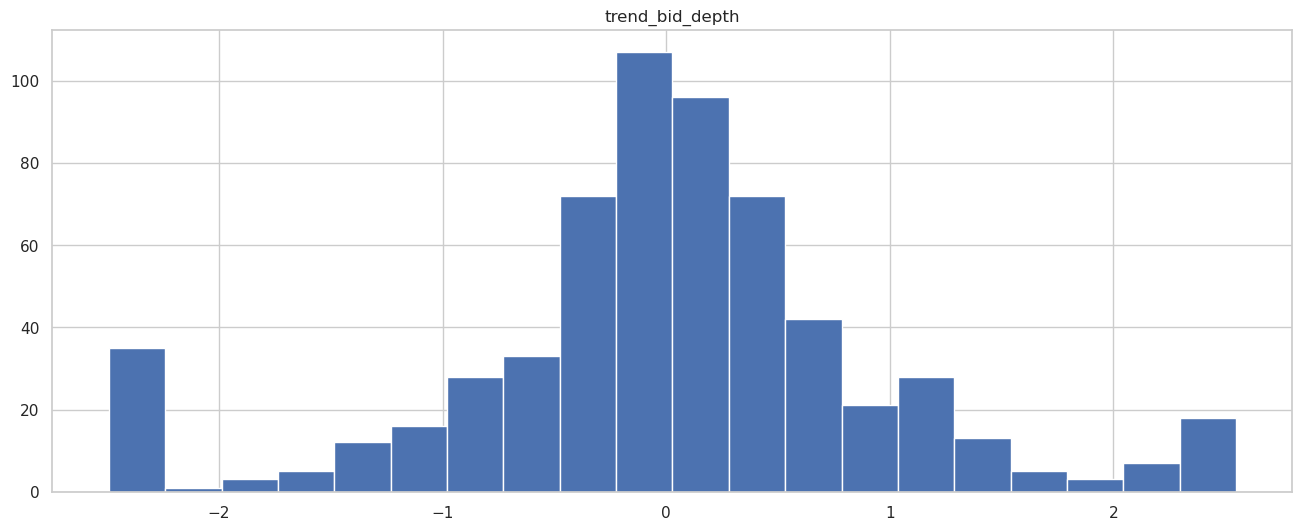

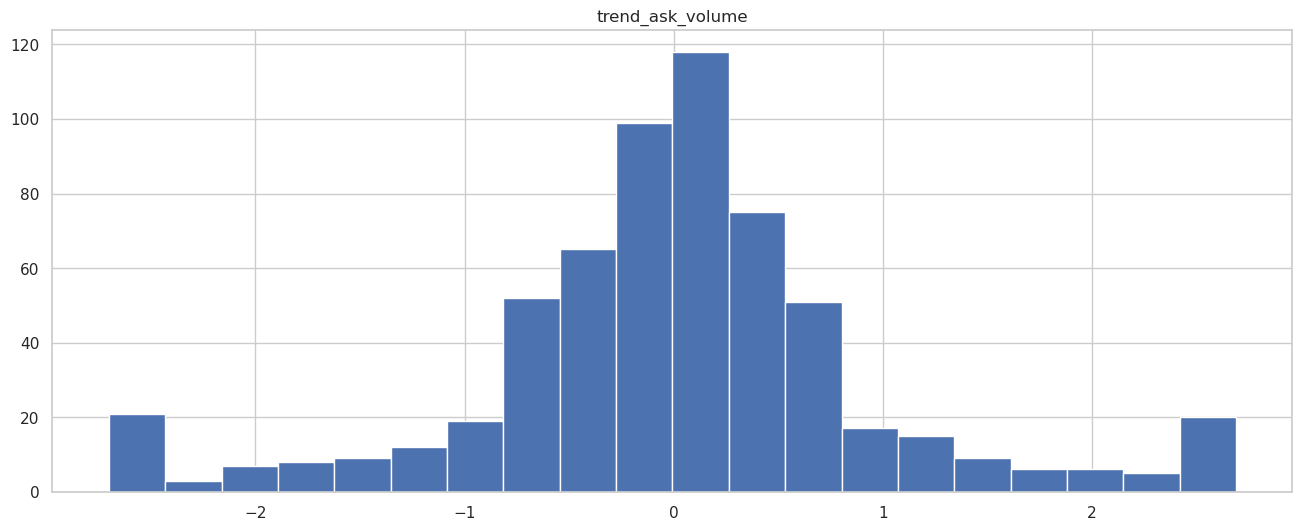

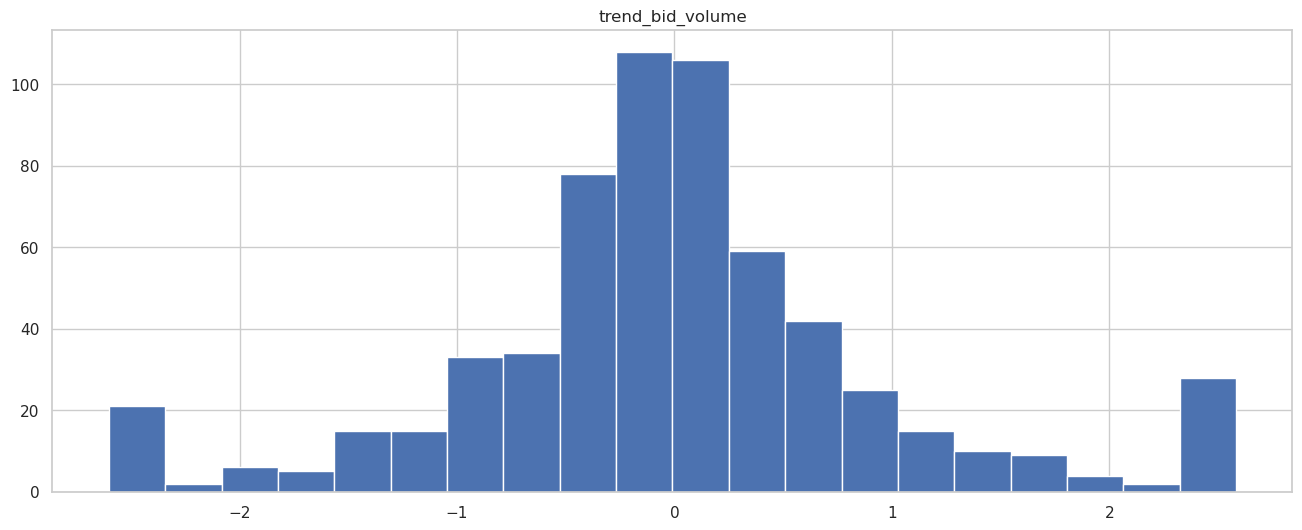

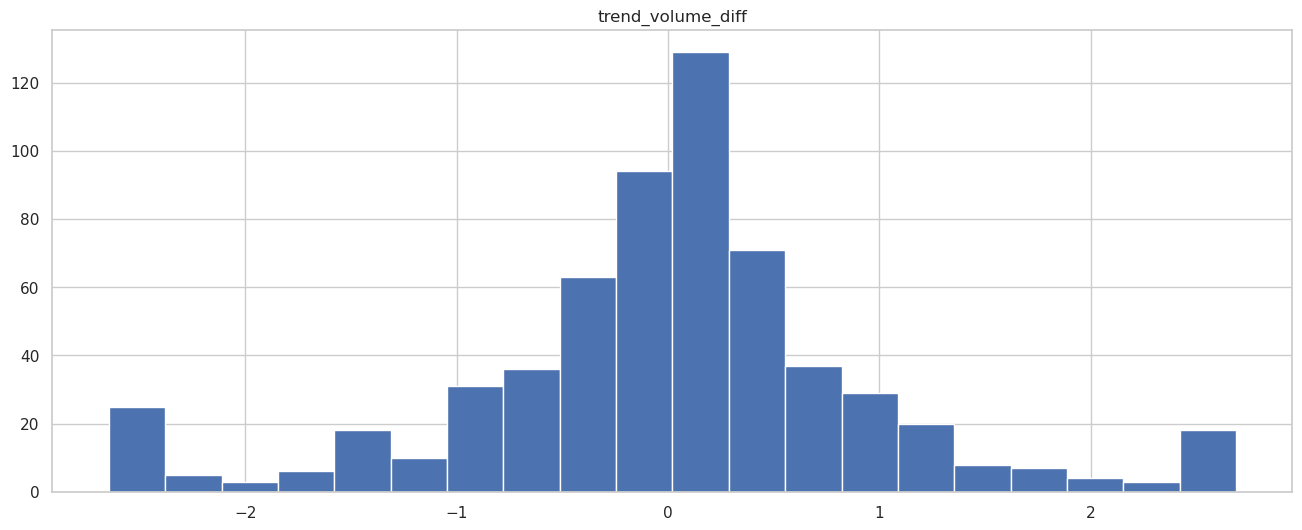

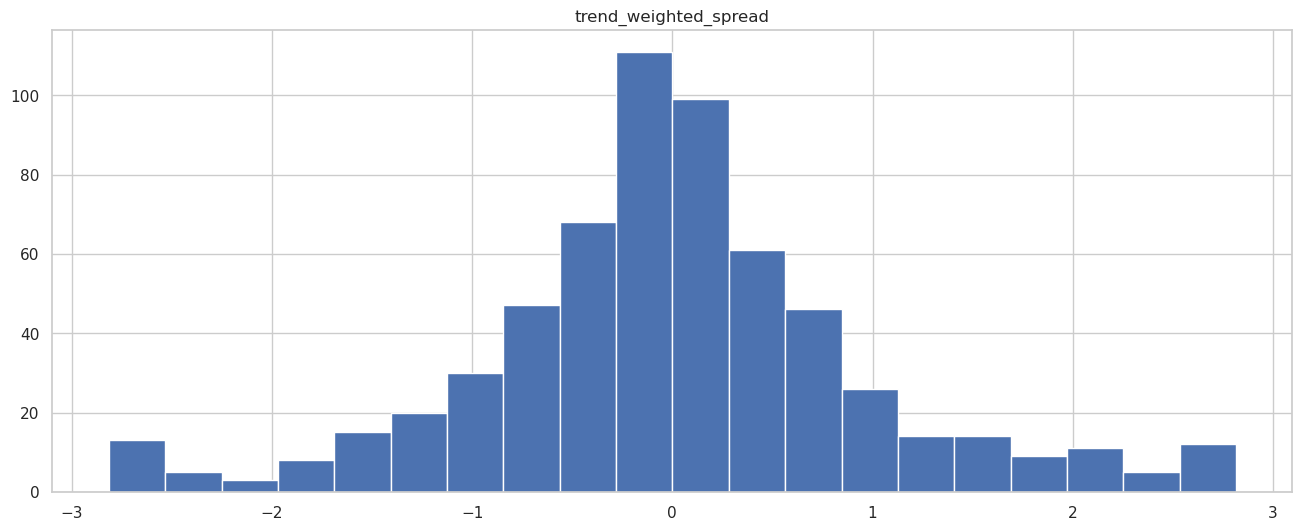

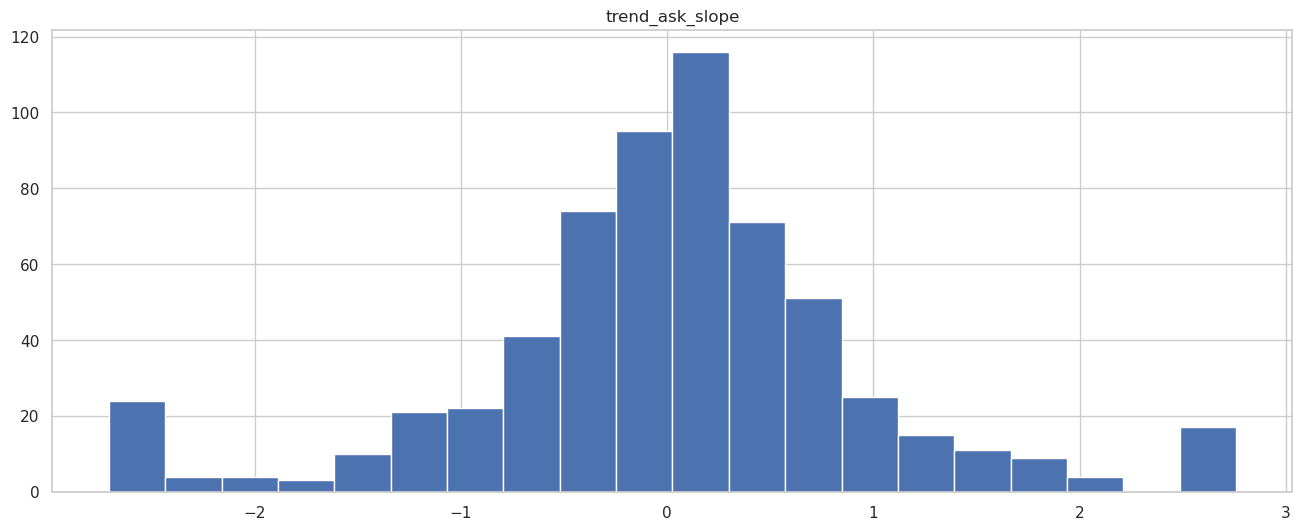

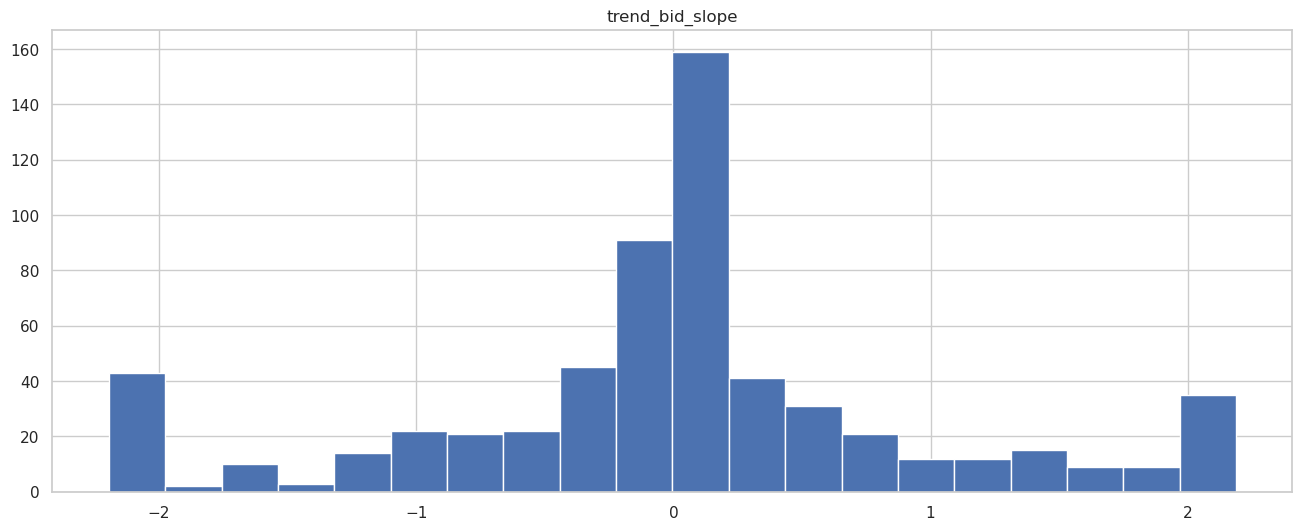

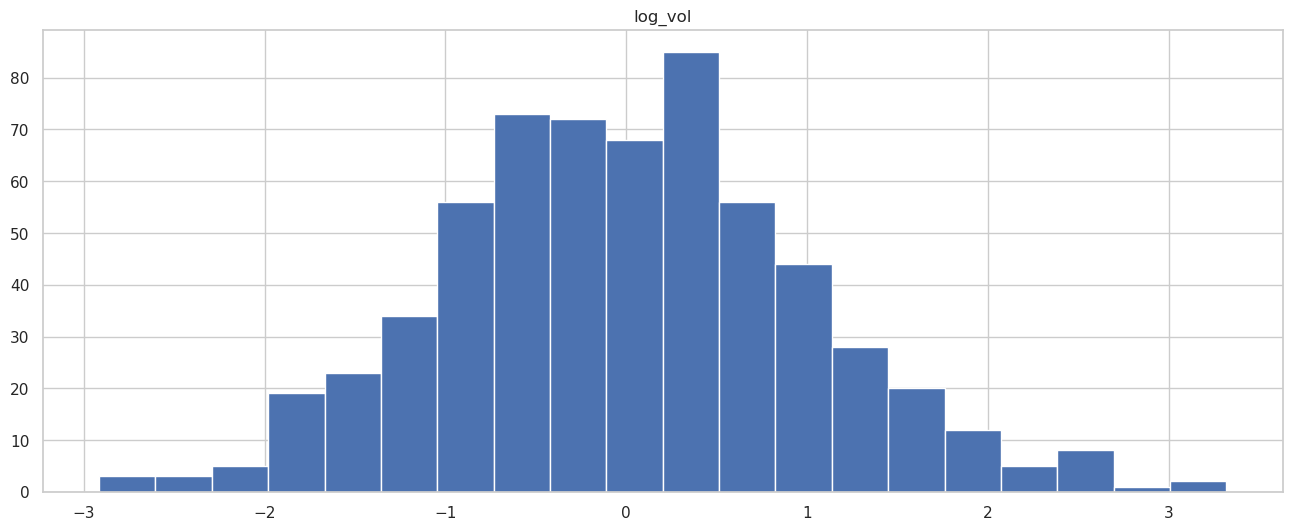

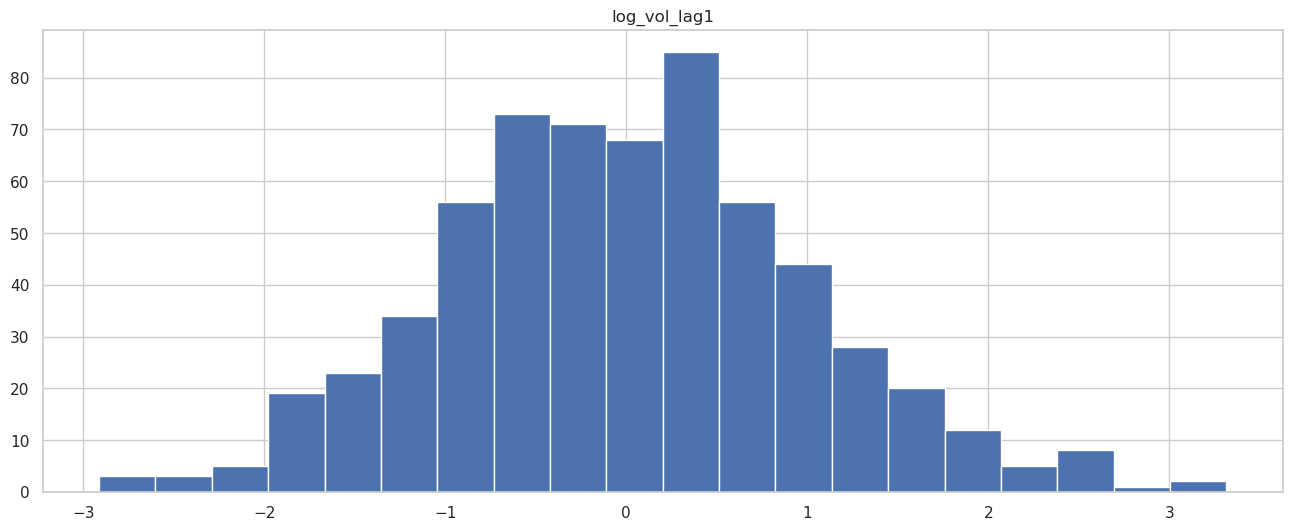

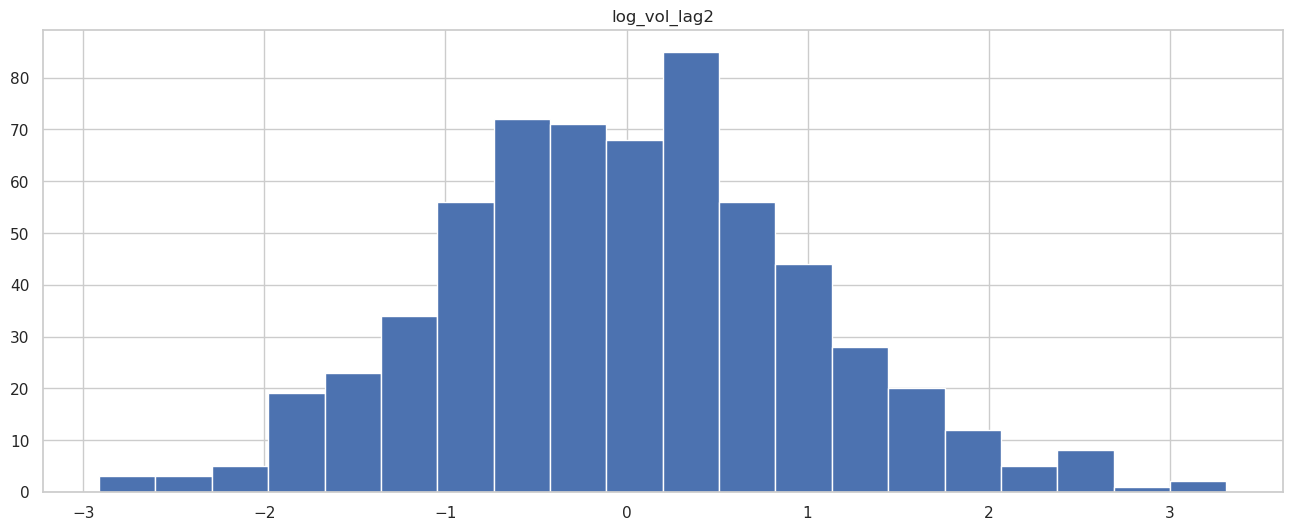

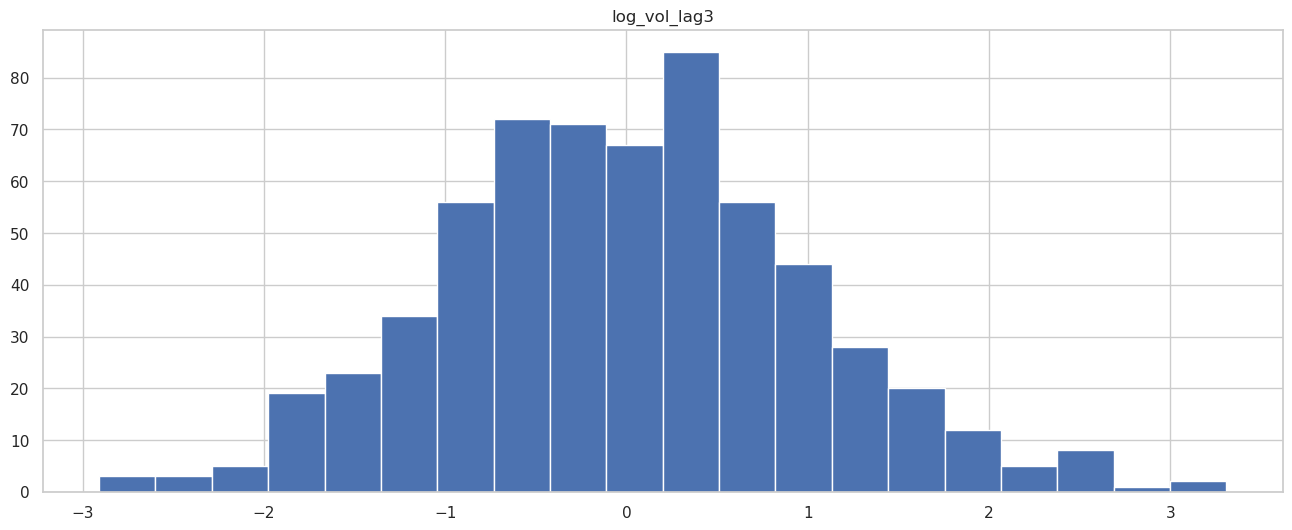

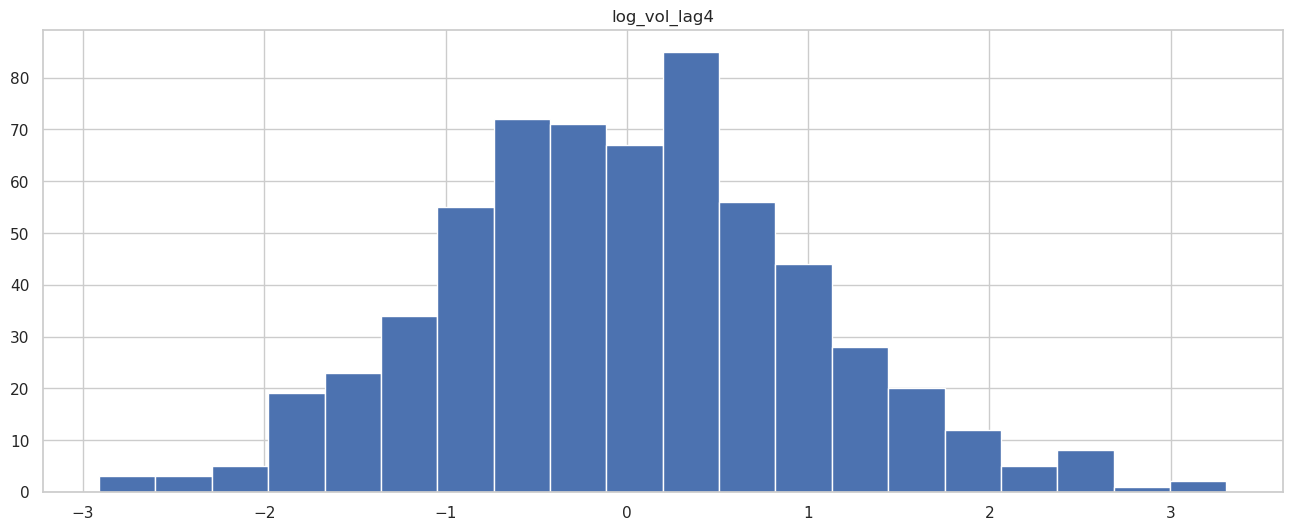

In [ ]:
# plot histogram of the data
for col in init_training_vola.columns:
    plt.hist(init_training_vola[col], bins=20)
    plt.title(col)
    plt.show()

In [ ]:
def winsorize_trend(df, col):
    """
    Winsorize the trend variables to remove outliers
    """
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 2.5 * iqr
    upper_bound = q3 + 2.5 * iqr

    df.loc[:,col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df.loc[:,col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

In [ ]:
full_data = (
    pl.read_csv(data_path / "btc" / "data_df.csv")
    .with_columns(pl.col("datetime").str.to_datetime("%Y-%m-%d %H:%M:%S"))
    .sort("datetime")
).to_pandas().set_index("datetime")

# for i in range(1, 5):
#     full_data[f"vol_lag{i}"] = full_data["vol"].shift(i)


ob_features_list = [
    "spread", 
    # "ask_depth", 
    "bid_depth", 
    # "depth_diff", 
    "ask_volume", 
    "bid_volume", 
    "volume_diff", 
    "weighted_spread", 
    "ask_slope", 
    "bid_slope"
]

for col in ob_features_list:
    full_data[f'mean_{col}'] = full_data.loc[:, full_data.columns.str.startswith(col)].mean(axis=1)

    full_data[f'trend_{col}'] = full_data.loc[:, full_data.columns.str.startswith(col)].apply(
        lambda row: np.polyfit(range(len(row)), row, 1)[0], axis=1
    )

full_data = full_data.dropna().loc[:, 
                          ['vol'] +
                          #[f'vol_lag{i}' for i in range(1,5)] +
                          [f'mean_{col}' for col in ob_features_list] + 
                          [f'trend_{col}' for col in ob_features_list]
                          ]



for col in full_data.columns:
    if "trend" in col:
        full_data = winsorize_trend(full_data, col)
        print(col)

trend_spread
trend_bid_depth
trend_ask_volume
trend_bid_volume
trend_volume_diff
trend_weighted_spread
trend_ask_slope
trend_bid_slope


In [ ]:
full_data = (
    pl.read_csv(data_path / "btc" / "data_df.csv")
    .with_columns(pl.col("datetime").str.to_datetime("%Y-%m-%d %H:%M:%S"))
    .sort("datetime")
    ).to_pandas().set_index("datetime")

In [ ]:
# make lagged volatility variables, 4 of them

for i in range(1, 5):
    full_data[f"vol_lag{i}"] = full_data["vol"].shift(i)

# add log volatilities
full_data["log_vol"] = np.log(full_data["vol"])
for i in range(1, 5):
    full_data[f"log_vol_lag{i}"] = full_data["log_vol"].shift(i)

ob_features = [
    "spread", 
    # "ask_depth", 
    "bid_depth", 
    # "depth_diff", 
    "ask_volume", 
    "bid_volume", 
    "volume_diff", 
    "weighted_spread", 
    "ask_slope", 
    "bid_slope"
]

for col in ob_features:
    full_data[f'mean_{col}'] = full_data.loc[:, full_data.columns.str.startswith(col)].mean(axis=1)

    full_data[f'trend_{col}'] = full_data.loc[:, full_data.columns.str.startswith(col)].apply(
        lambda x: np.polyfit(range(len(x)), x, 1)[0], axis=1
    )
dataset = full_data.dropna().loc[:, 
                          ['vol' ] + #
                          #[f'vol_lag{i}' for i in range(1,5)] +
                          #[f'log_vol_lag{i}' for i in range(1,5)] +
                          [f'mean_{col}' for col in ob_features] + 
                          [f'trend_{col}' for col in ob_features]
                          ]

In [ ]:
def winsorize_trend(df, col):
    """
    Winsorize the trend variables to remove outliers
    """
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 2.5 * iqr
    upper_bound = q3 + 2.5 * iqr

    df.loc[:,col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df.loc[:,col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

In [ ]:
LAST_TRAINING_DATE = datetime.strptime("2018-06-30 23:59:59", "%Y-%m-%d %H:%M:%S")
init_training_vola = dataset.loc[:LAST_TRAINING_DATE]

In [ ]:
init_training_vola.drop(columns=['ret', 'log_vol'], inplace=True)

Winsorization does not change the conclusion about what variables are correlated with volatility. Comment out the following cell to skip the winsorization step.

In [ ]:
for col in init_training_vola.columns:
    if "trend" in col:
        init_training_vola = winsorize_trend(init_training_vola, col)

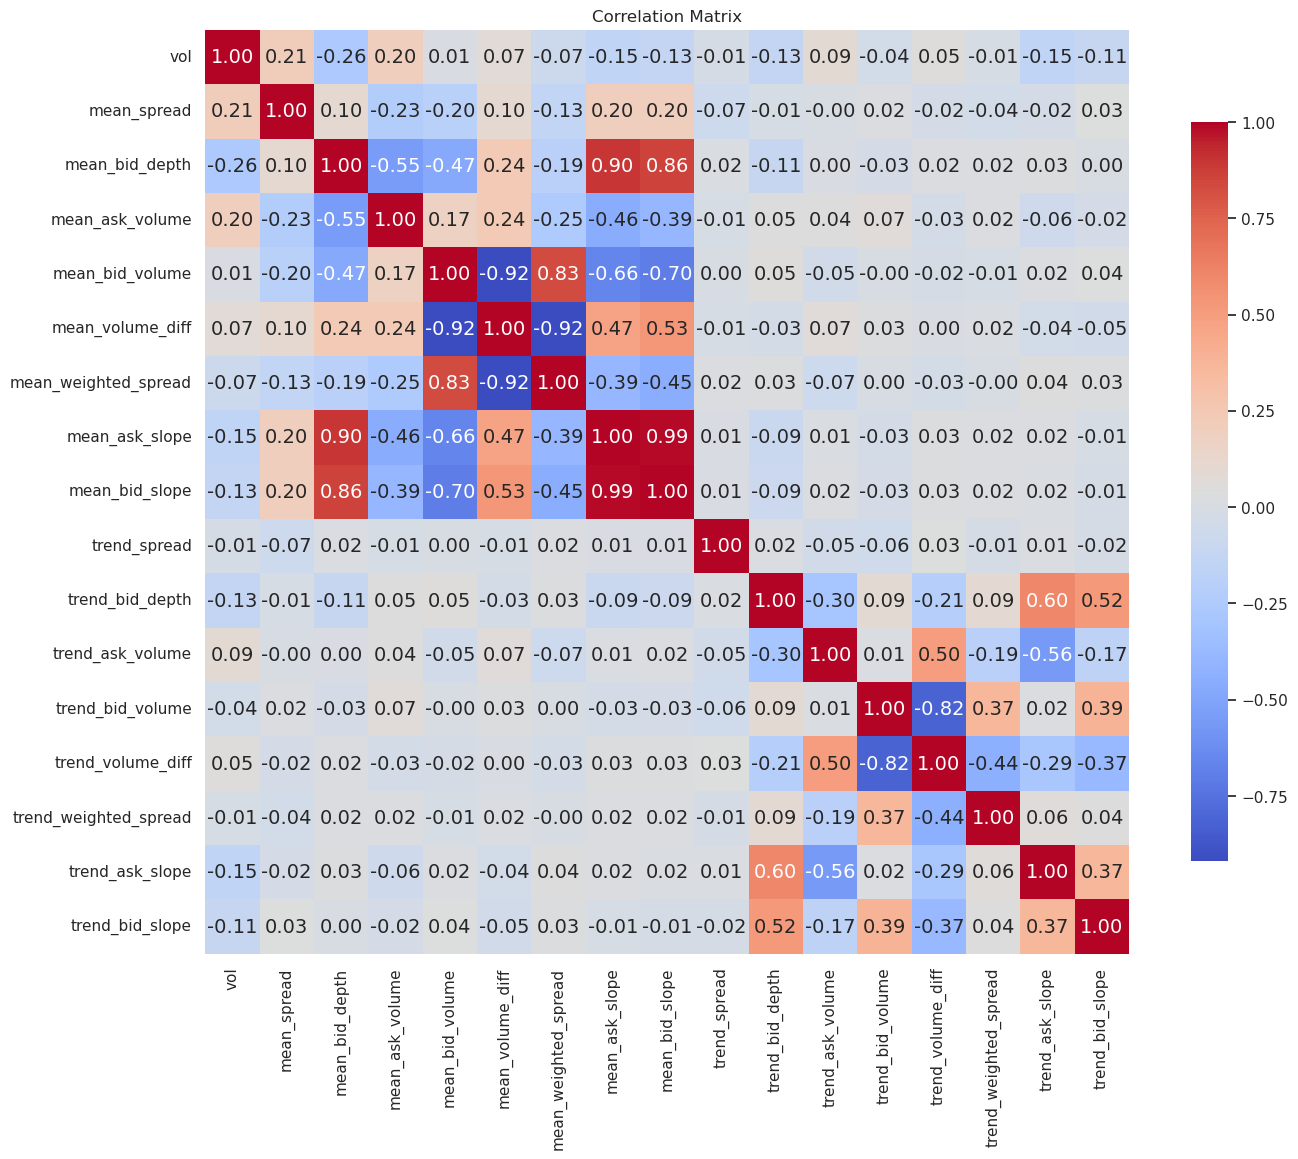

In [ ]:
# correlation matrix
corr = init_training_vola.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()



In [ ]:
# drop
['mean_bid_volume',
    'trend_spread',
    'trend_ask_volume',
    'trend_bid_volume', 
    'trend_volume_diff', 
    'trend_weighted_spread',
]

['mean_bid_volume',
 'trend_spread',
 'trend_ask_volume',
 'trend_bid_volume',
 'trend_volume_diff',
 'trend_weighted_spread']

<Axes: >

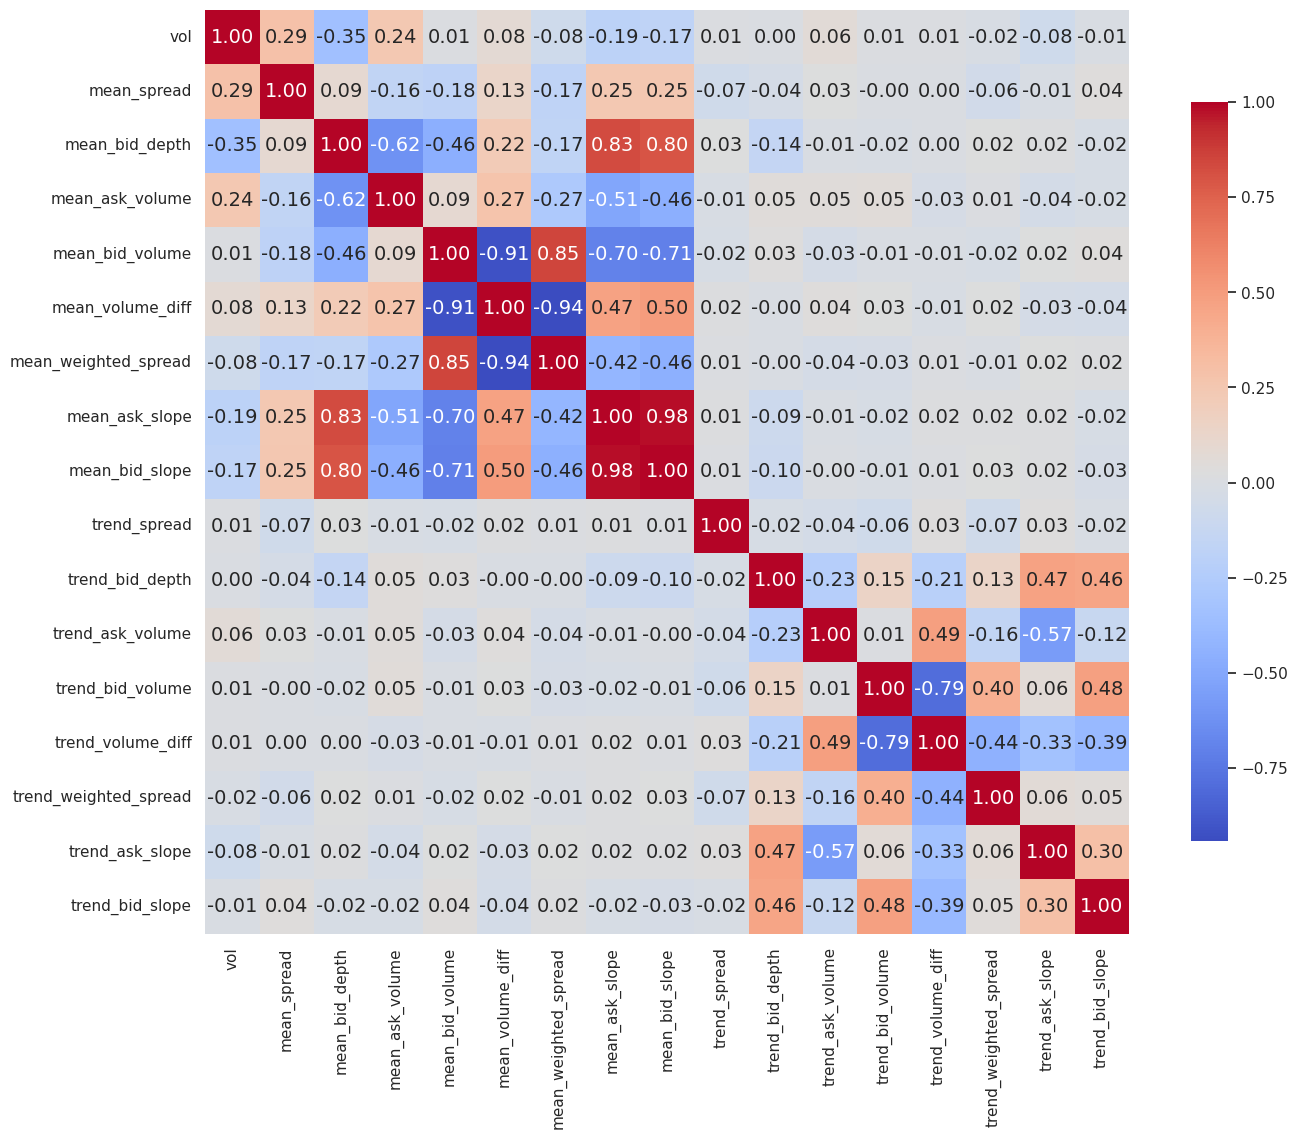

In [ ]:
# compute spearman correlation
spearman_corr = init_training_vola.corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

<Axes: >

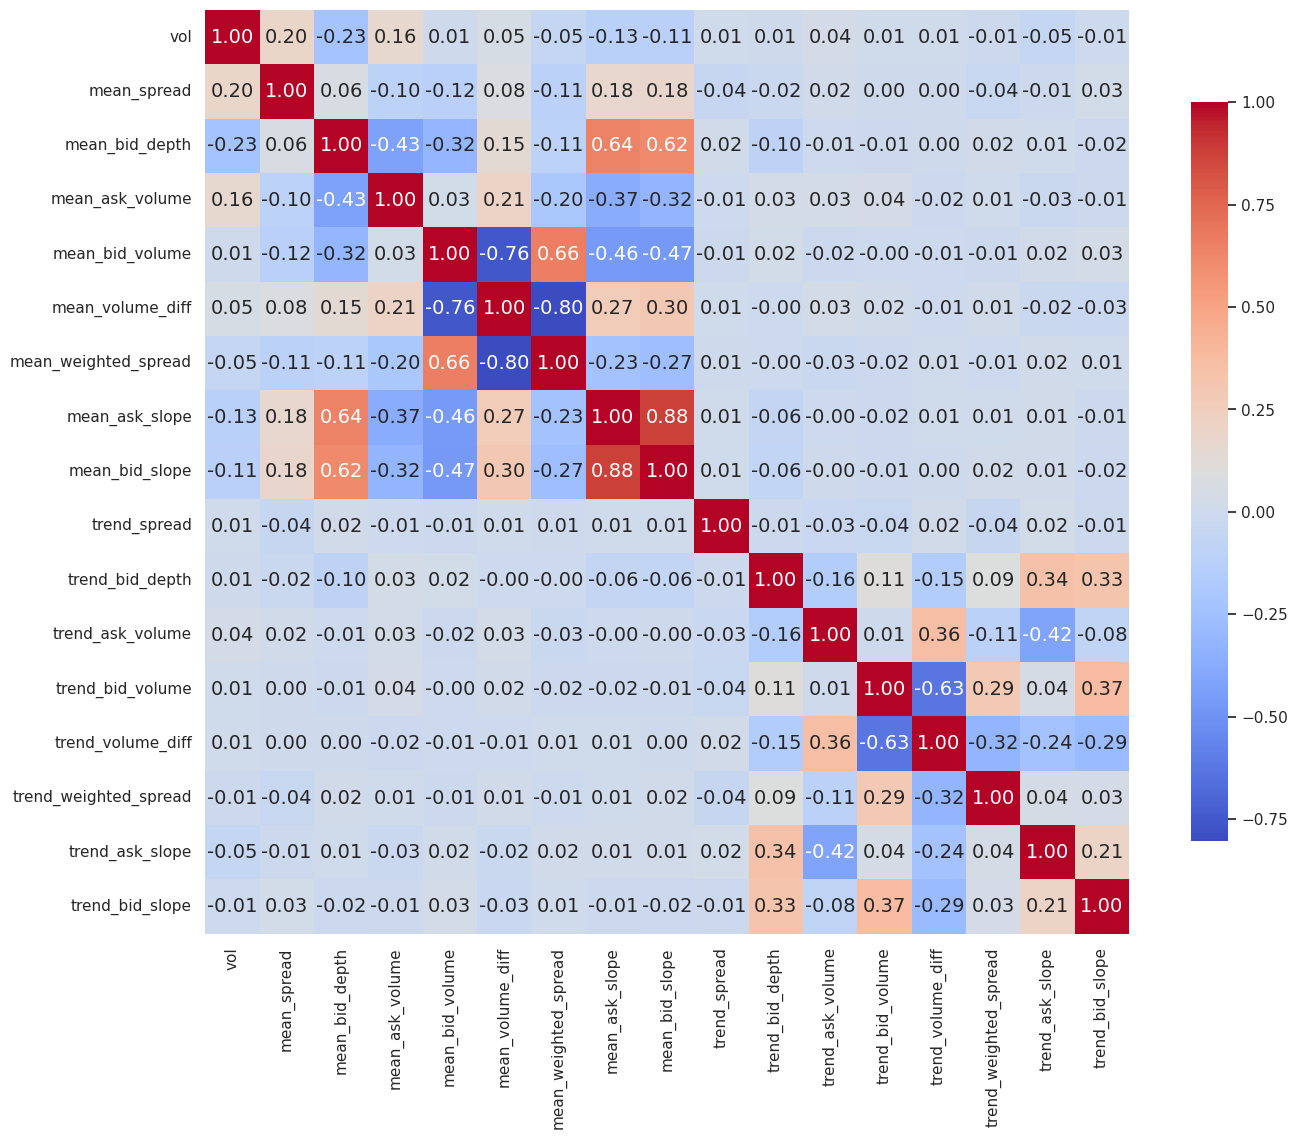

In [ ]:
# compute kendall correlation
kendall_corr = init_training_vola.corr(method='kendall')
plt.figure(figsize=(16, 12))
sns.heatmap(kendall_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

The following are features we will keep as exogenous variables in all benchmark models.

In [ ]:
ob_features = [
'mean_spread',
'mean_bid_depth',
'mean_ask_volume', 
#'mean_bid_volume',
#'mean_volume_diff', 
#'mean_weighted_spread',
'mean_ask_slope',
'mean_bid_slope']

Since no `trend` variables are used, there is no need for winsorization.

## Save data

In [ ]:
initial_training_vola = full_data.loc[:LAST_TRAINING_DATE]

In [ ]:
initial_training_vola.to_csv(data_path / "btc" / "initial_training_data.csv", index=True)

In [ ]:
# self.dataset = dataset.iloc[1:,:]
# self.shifted_dataset = dataset.copy().shift(1).dropna() 
# self.last_train_date = last_train_date
first_test_datetime = full_data.loc[LAST_TRAINING_DATE:].index[1]
# self.is_training_expanded = is_training_expanded
# self.forecast_horizon = forecast_horizon

# if not is_training_expanded:
#     self.lookback = lookback

full_data.index[0] 

# every monday after the last training date
refit_dates = [day for day in (pd.date_range(start=LAST_TRAINING_DATE, 
                                             end=full_data.index[-1],
                                             freq='D')
                                    ) if day.strftime("%A") == "Monday"]
refit_dates += [refit_dates[-1] + pd.Timedelta(days=7)] # to include the last monday in the backtest
test_timestamps = full_data.loc[first_test_datetime:].index

is_training_expanded = False

lookback = pd.Timedelta(days=30) # 1 week lookback

for i,t in enumerate(refit_dates):
    df = full_data.loc[:t-pd.Timedelta(hours=1)]
    df.to_csv(data_path / "btc" / f"training_data_expanding_{i}.csv", index=True)

    df = full_data.loc[t-lookback:t-pd.Timedelta(hours=1)]
    df.to_csv(data_path / "btc" / f"training_data_montly_{i}.csv", index=True)


In [ ]:
for i,t in enumerate(refit_dates):
        df = full_data.loc[t:t+pd.Timedelta(days=7)-pd.Timedelta(hours=1)]
        df.to_csv(data_path / "btc" / f"test_data_weeks_{i}.csv", index=True)
